In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Deuteronomio_1 = "These be the words which Moses spoke to all Israel on this side Jordan in the wilderness, in the plain over against the Red sea, between Paran, and Tophel, and Laban, and Hazeroth, and Dizahab.(There are eleven days'journey from Horeb by the way of mount Seir to Kadeshbarnea.)And it came to pass in the fortieth year, in the eleventh month, on the first day of the month, that Moses spoke to the children of Israel, according to all that the LORD had given him in commandment to them;After he had slain Sihon the king of the Amorites, which dwelled in Heshbon, and Og the king of Bashan, which dwelled at Astaroth in Edrei:On this side Jordan, in the land of Moab, began Moses to declare this law, saying,The LORD our God spoke to us in Horeb, saying, You have dwelled long enough in this mount:Turn you, and take your journey, and go to the mount of the Amorites, and to all the places near thereunto, in the plain, in the hills, and in the vale, and in the south, and by the sea side, to the land of the Canaanites, and to Lebanon, to the great river, the river Euphrates.Behold, I have set the land before you: go in and possess the land which the LORD swore to your fathers, Abraham, Isaac, and Jacob, to give to them and to their seed after them.And I spoke to you at that time, saying, I am not able to bear you myself alone:The LORD your God has multiplied you, and, behold, you are this day as the stars of heaven for multitude.(The LORD God of your fathers make you a thousand times so many more as you are, and bless you, as he has promised you!)How can I myself alone bear your cumbrance, and your burden, and your strife?Take you wise men, and understanding, and known among your tribes, and I will make them rulers over you.And you answered me, and said, The thing which you have spoken is good for us to do.So I took the chief of your tribes, wise men, and known, and made them heads over you, captains over thousands, and captains over hundreds, and captains over fifties, and captains over tens, and officers among your tribes.And I charged your judges at that time, saying, Hear the causes between your brothers, and judge righteously between every man and his brother, and the stranger that is with him.You shall not respect persons in judgment; but you shall hear the small as well as the great; you shall not be afraid of the face of man; for the judgment is God': and the cause that is too hard for you, bring it to me, and I will hear it.And I commanded you at that time all the things which you should do.And when we departed from Horeb, we went through all that great and terrible wilderness, which you saw by the way of the mountain of the Amorites, as the LORD our God commanded us; and we came to Kadeshbarnea.And I said to you, You are come to the mountain of the Amorites, which the LORD our God does give to us.Behold, the LORD your God has set the land before you: go up and possess it, as the LORD God of your fathers has said to you; fear not, neither be discouraged.And you came near to me every one of you, and said, We will send men before us, and they shall search us out the land, and bring us word again by what way we must go up, and into what cities we shall come.And the saying pleased me well: and I took twelve men of you, one of a tribe:And they turned and went up into the mountain, and came to the valley of Eshcol, and searched it out.And they took of the fruit of the land in their hands, and brought it down to us, and brought us word again, and said, It is a good land which the LORD our God does give us.Notwithstanding you would not go up, but rebelled against the commandment of the LORD your God:And you murmured in your tents, and said, Because the LORD hated us, he has brought us forth out of the land of Egypt, to deliver us into the hand of the Amorites, to destroy us.Where shall we go up? our brothers have discouraged our heart, saying, The people is greater and taller than we; the cities are great and walled up to heaven; and moreover we have seen the sons of the Anakims there.Then I said to you, Dread not, neither be afraid of them.The LORD your God which goes before you, he shall fight for you, according to all that he did for you in Egypt before your eyes;And in the wilderness, where you have seen how that the LORD your God bore you, as a man does bear his son, in all the way that you went, until you came into this place.Yet in this thing you did not believe the LORD your God,Who went in the way before you, to search you out a place to pitch your tents in, in fire by night, to show you by what way you should go, and in a cloud by day.And the LORD heard the voice of your words, and was wroth, and swore, saying,Surely there shall not one of these men of this evil generation see that good land, which I swore to give to your fathers.Save Caleb the son of Jephunneh; he shall see it, and to him will I give the land that he has trodden on, and to his children, because he has wholly followed the LORD.Also the LORD was angry with me for your sakes, saying, You also shall not go in thither.But Joshua the son of Nun, which stands before you, he shall go in thither: encourage him: for he shall cause Israel to inherit it.Moreover your little ones, which you said should be a prey, and your children, which in that day had no knowledge between good and evil, they shall go in thither, and to them will I give it, and they shall possess it.But as for you, turn you, and take your journey into the wilderness by the way of the Red sea.Then you answered and said to me, We have sinned against the LORD, we will go up and fight, according to all that the LORD our God commanded us. And when you had girded on every man his weapons of war, you were ready to go up into the hill.And the LORD said to me, Say to them. Go not up, neither fight; for I am not among you; lest you be smitten before your enemies.So I spoke to you; and you would not hear, but rebelled against the commandment of the LORD, and went presumptuously up into the hill.And the Amorites, which dwelled in that mountain, came out against you, and chased you, as bees do, and destroyed you in Seir, even to Hormah.And you returned and wept before the LORD; but the LORD would not listen to your voice, nor give ear to you.So you stayed in Kadesh many days, according to the days that you stayed there.".lower()

In [6]:
Deuteronomio_2 = "Then we turned, and took our journey into the wilderness by the way of the Red sea, as the LORD spoke to me: and we compassed mount Seir many days.And the LORD spoke to me, saying,You have compassed this mountain long enough: turn you northward.And command you the people, saying, You are to pass through the coast of your brothers the children of Esau, which dwell in Seir; and they shall be afraid of you: take you good heed to yourselves therefore:Meddle not with them; for I will not give you of their land, no, not so much as a foot breadth; because I have given mount Seir to Esau for a possession.You shall buy meat of them for money, that you may eat; and you shall also buy water of them for money, that you may drink.For the LORD your God has blessed you in all the works of your hand: he knows your walking through this great wilderness: these forty years the LORD your God has been with you; you have lacked nothing.And when we passed by from our brothers the children of Esau, which dwelled in Seir, through the way of the plain from Elath, and from Eziongaber, we turned and passed by the way of the wilderness of Moab.And the LORD said to me, Distress not the Moabites, neither contend with them in battle: for I will not give you of their land for a possession; because I have given Ar to the children of Lot for a possession.The Emims dwelled therein in times past, a people great, and many, and tall, as the Anakims;Which also were accounted giants, as the Anakims; but the Moabites called them Emims.The Horims also dwelled in Seir beforetime; but the children of Esau succeeded them, when they had destroyed them from before them, and dwelled in their stead; as Israel did to the land of his possession, which the LORD gave to them.Now rise up, said I, and get you over the brook Zered. And we went over the brook Zered.And the space in which we came from Kadeshbarnea, until we were come over the brook Zered, was thirty and eight years; until all the generation of the men of war were wasted out from among the host, as the LORD swore to them.For indeed the hand of the LORD was against them, to destroy them from among the host, until they were consumed.So it came to pass, when all the men of war were consumed and dead from among the people,That the LORD spoke to me, saying,You are to pass over through Ar, the coast of Moab, this day:And when you come near over against the children of Ammon, distress them not, nor meddle with them: for I will not give you of the land of the children of Ammon any possession; because I have given it to the children of Lot for a possession.(That also was accounted a land of giants: giants dwelled therein in old time; and the Ammonites call them Zamzummims;A people great, and many, and tall, as the Anakims; but the LORD destroyed them before them; and they succeeded them, and dwelled in their stead:As he did to the children of Esau, which dwelled in Seir, when he destroyed the Horims from before them; and they succeeded them, and dwelled in their stead even to this day:And the Avims which dwelled in Hazerim, even to Azzah, the Caphtorims, which came forth out of Caphtor, destroyed them, and dwelled in their stead.)Rise you up, take your journey, and pass over the river Arnon: behold, I have given into your hand Sihon the Amorite, king of Heshbon, and his land: begin to possess it, and contend with him in battle.This day will I begin to put the dread of you and the fear of you on the nations that are under the whole heaven, who shall hear report of you, and shall tremble, and be in anguish because of you.And I sent messengers out of the wilderness of Kedemoth to Sihon king of Heshbon with words of peace, saying,Let me pass through your land: I will go along by the high way, I will neither turn to the right hand nor to the left.You shall sell me meat for money, that I may eat; and give me water for money, that I may drink: only I will pass through on my feet;(As the children of Esau which dwell in Seir, and the Moabites which dwell in Ar, did to me;) until I shall pass over Jordan into the land which the LORD our God gives us.But Sihon king of Heshbon would not let us pass by him: for the LORD your God hardened his spirit, and made his heart obstinate, that he might deliver him into your hand, as appears this day.And the LORD said to me, Behold, I have begun to give Sihon and his land before you: begin to possess, that you may inherit his land.Then Sihon came out against us, he and all his people, to fight at Jahaz.And the LORD our God delivered him before us; and we smote him, and his sons, and all his people.And we took all his cities at that time, and utterly destroyed the men, and the women, and the little ones, of every city, we left none to remain:Only the cattle we took for a prey to ourselves, and the spoil of the cities which we took.From Aroer, which is by the brink of the river of Arnon, and from the city that is by the river, even to Gilead, there was not one city too strong for us: the LORD our God delivered all to us:Only to the land of the children of Ammon you came not, nor to any place of the river Jabbok, nor to the cities in the mountains, nor to whatever the LORD our God forbade us.".lower()

In [58]:
Deuteronomio_3 = "Then we turned, and went up the way to Bashan: and Og the king of Bashan came out against us, he and all his people, to battle at Edrei.And the LORD said to me, Fear him not: for I will deliver him, and all his people, and his land, into your hand; and you shall do to him as you did to Sihon king of the Amorites, which dwelled at Heshbon.So the LORD our God delivered into our hands Og also, the king of Bashan, and all his people: and we smote him until none was left to him remaining.And we took all his cities at that time, there was not a city which we took not from them, three score cities, all the region of Argob, the kingdom of Og in Bashan.All these cities were fenced with high walls, gates, and bars; beside unwalled towns a great many.And we utterly destroyed them, as we did to Sihon king of Heshbon, utterly destroying the men, women, and children, of every city.But all the cattle, and the spoil of the cities, we took for a prey to ourselves.And we took at that time out of the hand of the two kings of the Amorites the land that was on this side Jordan, from the river of Arnon to mount Hermon;(Which Hermon the Sidonians call Sirion; and the Amorites call it Shenir;)All the cities of the plain, and all Gilead, and all Bashan, to Salchah and Edrei, cities of the kingdom of Og in Bashan.For only Og king of Bashan remained of the remnant of giants; behold his bedstead was a bedstead of iron; is it not in Rabbath of the children of Ammon? nine cubits was the length thereof, and four cubits the breadth of it, after the cubit of a man.And this land, which we possessed at that time, from Aroer, which is by the river Arnon, and half mount Gilead, and the cities thereof, gave I to the Reubenites and to the Gadites.And the rest of Gilead, and all Bashan, being the kingdom of Og, gave I to the half tribe of Manasseh; all the region of Argob, with all Bashan, which was called the land of giants.Jair the son of Manasseh took all the country of Argob to the coasts of Geshuri and Maachathi; and called them after his own name, Bashanhavothjair, to this day.And I gave Gilead to Machir.And to the Reubenites and to the Gadites I gave from Gilead even to the river Arnon half the valley, and the border even to the river Jabbok, which is the border of the children of Ammon;The plain also, and Jordan, and the coast thereof, from Chinnereth even to the sea of the plain, even the salt sea, under Ashdothpisgah eastward.And I commanded you at that time, saying, The LORD your God has given you this land to possess it: you shall pass over armed before your brothers the children of Israel, all that are meet for the war.But your wives, and your little ones, and your cattle, (for I know that you have much cattle,) shall abide in your cities which I have given you;Until the LORD have given rest to your brothers, as well as to you, and until they also possess the land which the LORD your God has given them beyond Jordan: and then shall you return every man to his possession, which I have given you.And I commanded Joshua at that time, saying, Your eyes have seen all that the LORD your God has done to these two kings: so shall the LORD do to all the kingdoms where you pass.You shall not fear them: for the LORD your God he shall fight for you.And I sought the LORD at that time, saying,O Lord GOD, you have begun to show your servant your greatness, and your mighty hand: for what God is there in heaven or in earth, that can do according to your works, and according to your might?I pray you, let me go over, and see the good land that is beyond Jordan, that goodly mountain, and Lebanon.But the LORD was wroth with me for your sakes, and would not hear me: and the LORD said to me, Let it suffice you; speak no more to me of this matter.Get you up into the top of Pisgah, and lift up your eyes westward, and northward, and southward, and eastward, and behold it with your eyes: for you shall not go over this Jordan.But charge Joshua, and encourage him, and strengthen him: for he shall go over before this people, and he shall cause them to inherit the land which you shall see.So we stayed in the valley over against Bethpeor.".lower()

In [61]:
Deuteronomio_4 = "Now therefore listen, O Israel, to the statutes and to the judgments, which I teach you, for to do them, that you may live, and go in and possess the land which the LORD God of your fathers gives you.You shall not add to the word which I command you, neither shall you diminish ought from it, that you may keep the commandments of the LORD your God which I command you.Your eyes have seen what the LORD did because of Baalpeor: for all the men that followed Baalpeor, the LORD your God has destroyed them from among you.But you that did join to the LORD your God are alive every one of you this day.Behold, I have taught you statutes and judgments, even as the LORD my God commanded me, that you should do so in the land where you go to possess it.Keep therefore and do them; for this is your wisdom and your understanding in the sight of the nations, which shall hear all these statutes, and say, Surely this great nation is a wise and understanding people.For what nation is there so great, who has God so near to them, as the LORD our God is in all things that we call on him for?And what nation is there so great, that has statutes and judgments so righteous as all this law, which I set before you this day?Only take heed to yourself, and keep your soul diligently, lest you forget the things which your eyes have seen, and lest they depart from your heart all the days of your life: but teach them your sons, and your sons'sons;Specially the day that you stood before the LORD your God in Horeb, when the LORD said to me, Gather me the people together, and I will make them hear my words, that they may learn to fear me all the days that they shall live on the earth, and that they may teach their children.And you came near and stood under the mountain; and the mountain burned with fire to the middle of heaven, with darkness, clouds, and thick darkness.And the LORD spoke to you out of the middle of the fire: you heard the voice of the words, but saw no similitude; only you heard a voice.And he declared to you his covenant, which he commanded you to perform, even ten commandments; and he wrote them on two tables of stone.And the LORD commanded me at that time to teach you statutes and judgments, that you might do them in the land where you go over to possess it.Take you therefore good heed to yourselves; for you saw no manner of similitude on the day that the LORD spoke to you in Horeb out of the middle of the fire:Lest you corrupt yourselves, and make you a graven image, the similitude of any figure, the likeness of male or female,The likeness of any beast that is on the earth, the likeness of any winged fowl that flies in the air,The likeness of any thing that creeps on the ground, the likeness of any fish that is in the waters beneath the earth:And lest you lift up your eyes to heaven, and when you see the sun, and the moon, and the stars, even all the host of heaven, should be driven to worship them, and serve them, which the LORD your God has divided to all nations under the whole heaven.But the LORD has taken you, and brought you forth out of the iron furnace, even out of Egypt, to be to him a people of inheritance, as you are this day.Furthermore the LORD was angry with me for your sakes, and swore that I should not go over Jordan, and that I should not go in to that good land, which the LORD your God gives you for an inheritance:But I must die in this land, I must not go over Jordan: but you shall go over, and possess that good land.Take heed to yourselves, lest you forget the covenant of the LORD your God, which he made with you, and make you a graven image, or the likeness of any thing, which the LORD your God has forbidden you.For the LORD your God is a consuming fire, even a jealous God.When you shall beget children, and children' children, and you shall have remained long in the land, and shall corrupt yourselves, and make a graven image, or the likeness of any thing, and shall do evil in the sight of the LORD your God, to provoke him to anger:I call heaven and earth to witness against you this day, that you shall soon utterly perish from off the land whereunto you go over Jordan to possess it; you shall not prolong your days on it, but shall utterly be destroyed.And the LORD shall scatter you among the nations, and you shall be left few in number among the heathen, where the LORD shall lead you.And there you shall serve gods, the work of men' hands, wood and stone, which neither see, nor hear, nor eat, nor smell.But if from there you shall seek the LORD your God, you shall find him, if you seek him with all your heart and with all your soul.When you are in tribulation, and all these things are come on you, even in the latter days, if you turn to the LORD your God, and shall be obedient to his voice;(For the LORD your God is a merciful God;) he will not forsake you, neither destroy you, nor forget the covenant of your fathers which he swore to them.For ask now of the days that are past, which were before you, since the day that God created man on the earth, and ask from the one side of heaven to the other, whether there has been any such thing as this great thing is, or has been heard like it?Did ever people hear the voice of God speaking out of the middle of the fire, as you have heard, and live?Or has God assayed to go and take him a nation from the middle of another nation, by temptations, by signs, and by wonders, and by war, and by a mighty hand, and by a stretched out arm, and by great terrors, according to all that the LORD your God did for you in Egypt before your eyes?To you it was showed, that you might know that the LORD he is God; there is none else beside him.Out of heaven he made you to hear his voice, that he might instruct you: and on earth he showed you his great fire; and you heard his words out of the middle of the fire.And because he loved your fathers, therefore he chose their seed after them, and brought you out in his sight with his mighty power out of Egypt;To drive out nations from before you greater and mightier than you are, to bring you in, to give you their land for an inheritance, as it is this day.Know therefore this day, and consider it in your heart, that the LORD he is God in heaven above, and on the earth beneath: there is none else.You shall keep therefore his statutes, and his commandments, which I command you this day, that it may go well with you, and with your children after you, and that you may prolong your days on the earth, which the LORD your God gives you, for ever.Then Moses severed three cities on this side Jordan toward the sun rise;That the slayer might flee thither, which should kill his neighbor unawares, and hated him not in times past; and that fleeing to one of these cities he might live:Namely, Bezer in the wilderness, in the plain country, of the Reubenites; and Ramoth in Gilead, of the Gadites; and Golan in Bashan, of the Manassites.And this is the law which Moses set before the children of Israel:These are the testimonies, and the statutes, and the judgments, which Moses spoke to the children of Israel, after they came forth out of Egypt.On this side Jordan, in the valley over against Bethpeor, in the land of Sihon king of the Amorites, who dwelled at Heshbon, whom Moses and the children of Israel smote, after they were come forth out of Egypt:And they possessed his land, and the land of Og king of Bashan, two kings of the Amorites, which were on this side Jordan toward the sun rise;From Aroer, which is by the bank of the river Arnon, even to mount Sion, which is Hermon,And all the plain on this side Jordan eastward, even to the sea of the plain, under the springs of Pisgah.".lower()

In [9]:
Deuteronomio_5 = "And Moses called all Israel, and said to them, Hear, O Israel, the statutes and judgments which I speak in your ears this day, that you may learn them, and keep, and do them.The LORD our God made a covenant with us in Horeb.The LORD made not this covenant with our fathers, but with us, even us, who are all of us here alive this day.The LORD talked with you face to face in the mount out of the middle of the fire,(I stood between the LORD and you at that time, to show you the word of the LORD: for you were afraid by reason of the fire, and went not up into the mount;) saying,I am the LORD your God, which brought you out of the land of Egypt, from the house of bondage.You shall have none other gods before me.You shall not make you any graven image, or any likeness of any thing that is in heaven above, or that is in the earth beneath, or that is in the waters beneath the earth:You shall not bow down yourself to them, nor serve them: for I the LORD your God am a jealous God, visiting the iniquity of the fathers on the children to the third and fourth generation of them that hate me,And showing mercy to thousands of them that love me and keep my commandments.You shall not take the name of the LORD your God in vain: for the LORD will not hold him guiltless that takes his name in vain.Keep the sabbath day to sanctify it, as the LORD your God has commanded you.Six days you shall labor, and do all your work:But the seventh day is the sabbath of the LORD your God: in it you shall not do any work, you, nor your son, nor your daughter, nor your manservant, nor your maidservant, nor your ox, nor your ass, nor any of your cattle, nor your stranger that is within your gates; that your manservant and your maidservant may rest as well as you.And remember that you were a servant in the land of Egypt, and that the LORD your God brought you out there through a mighty hand and by a stretched out arm: therefore the LORD your God commanded you to keep the sabbath day.Honor your father and your mother, as the LORD your God has commanded you; that your days may be prolonged, and that it may go well with you, in the land which the LORD your God gives you.You shall not kill.Neither shall you commit adultery.Neither shall you steal.Neither shall you bear false witness against your neighbor.Neither shall you desire your neighbor' wife, neither shall you covet your neighbor' house, his field, or his manservant, or his maidservant, his ox, or his ass, or any thing that is your neighbor'.These words the LORD spoke to all your assembly in the mount out of the middle of the fire, of the cloud, and of the thick darkness, with a great voice: and he added no more. And he wrote them in two tables of stone, and delivered them to me.And it came to pass, when you heard the voice out of the middle of the darkness, (for the mountain did burn with fire,) that you came near to me, even all the heads of your tribes, and your elders;And you said, Behold, the LORD our God has showed us his glory and his greatness, and we have heard his voice out of the middle of the fire: we have seen this day that God does talk with man, and he lives.Now therefore why should we die? for this great fire will consume us: if we hear the voice of the LORD our God any more, then we shall die.For who is there of all flesh, that has heard the voice of the living God speaking out of the middle of the fire, as we have, and lived?Go you near, and hear all that the LORD our God shall say: and speak you to us all that the LORD our God shall speak to you; and we will hear it, and do it.And the LORD heard the voice of your words, when you spoke to me; and the LORD said to me, I have heard the voice of the words of this people, which they have spoken to you: they have well said all that they have spoken.O that there were such an heart in them, that they would fear me, and keep all my commandments always, that it might be well with them, and with their children for ever!Go say to them, Get you into your tents again.But as for you, stand you here by me, and I will speak to you all the commandments, and the statutes, and the judgments, which you shall teach them, that they may do them in the land which I give them to possess it.You shall observe to do therefore as the LORD your God has commanded you: you shall not turn aside to the right hand or to the left.You shall walk in all the ways which the LORD your God has commanded you, that you may live, and that it may be well with you, and that you may prolong your days in the land which you shall possess.".lower()

In [10]:
Deuteronomio_6 = "Now these are the commandments, the statutes, and the judgments, which the LORD your God commanded to teach you, that you might do them in the land where you go to possess it:That you might fear the LORD your God, to keep all his statutes and his commandments, which I command you, you, and your son, and your son' son, all the days of your life; and that your days may be prolonged.Hear therefore, O Israel, and observe to do it; that it may be well with you, and that you may increase mightily, as the LORD God of your fathers has promised you, in the land that flows with milk and honey.Hear, O Israel: The LORD our God is one LORD:And you shall love the LORD your God with all your heart, and with all your soul, and with all your might.And these words, which I command you this day, shall be in your heart:And you shall teach them diligently to your children, and shall talk of them when you sit in your house, and when you walk by the way, and when you lie down, and when you rise up.And you shall bind them for a sign on your hand, and they shall be as frontlets between your eyes.And you shall write them on the posts of your house, and on your gates.And it shall be, when the LORD your God shall have brought you into the land which he swore to your fathers, to Abraham, to Isaac, and to Jacob, to give you great and goodly cities, which you built not,And houses full of all good things, which you filled not, and wells dig, which you digged not, vineyards and olive trees, which you planted not; when you shall have eaten and be full;Then beware lest you forget the LORD, which brought you forth out of the land of Egypt, from the house of bondage.You shall fear the LORD your God, and serve him, and shall swear by his name.You shall not go after other gods, of the gods of the people which are round about you;(For the LORD your God is a jealous God among you) lest the anger of the LORD your God be kindled against you, and destroy you from off the face of the earth.You shall not tempt the LORD your God, as you tempted him in Massah.You shall diligently keep the commandments of the LORD your God, and his testimonies, and his statutes, which he has commanded you.And you shall do that which is right and good in the sight of the LORD: that it may be well with you, and that you may go in and possess the good land which the LORD swore to your fathers.To cast out all your enemies from before you, as the LORD has spoken.And when your son asks you in time to come, saying, What mean the testimonies, and the statutes, and the judgments, which the LORD our God has commanded you?Then you shall say to your son, We were Pharaoh' slaves in Egypt; and the LORD brought us out of Egypt with a mighty hand:And the LORD showed signs and wonders, great and sore, on Egypt, on Pharaoh, and on all his household, before our eyes:And he brought us out from there, that he might bring us in, to give us the land which he swore to our fathers.And the LORD commanded us to do all these statutes, to fear the LORD our God, for our good always, that he might preserve us alive, as it is at this day.And it shall be our righteousness, if we observe to do all these commandments before the LORD our God, as he has commanded us.".lower()

In [11]:
Deuteronomio_7 = "When the LORD your God shall bring you into the land where you go to possess it, and has cast out many nations before you, the Hittites, and the Girgashites, and the Amorites, and the Canaanites, and the Perizzites, and the Hivites, and the Jebusites, seven nations greater and mightier than you;And when the LORD your God shall deliver them before you; you shall smite them, and utterly destroy them; you shall make no covenant with them, nor show mercy to them:Neither shall you make marriages with them; your daughter you shall not give to his son, nor his daughter shall you take to your son.For they will turn away your son from following me, that they may serve other gods: so will the anger of the LORD be kindled against you, and destroy you suddenly.But thus shall you deal with them; you shall destroy their altars, and break down their images, and cut down their groves, and burn their graven images with fire.For you are an holy people to the LORD your God: the LORD your God has chosen you to be a special people to himself, above all people that are on the face of the earth.The LORD did not set his love on you, nor choose you, because you were more in number than any people; for you were the fewest of all people:But because the LORD loved you, and because he would keep the oath which he had sworn to your fathers, has the LORD brought you out with a mighty hand, and redeemed you out of the house of slaves, from the hand of Pharaoh king of Egypt.Know therefore that the LORD your God, he is God, the faithful God, which keeps covenant and mercy with them that love him and keep his commandments to a thousand generations;And repays them that hate him to their face, to destroy them: he will not be slack to him that hates him, he will repay him to his face.You shall therefore keep the commandments, and the statutes, and the judgments, which I command you this day, to do them.Why it shall come to pass, if you listen to these judgments, and keep, and do them, that the LORD your God shall keep to you the covenant and the mercy which he swore to your fathers:And he will love you, and bless you, and multiply you: he will also bless the fruit of your womb, and the fruit of your land, your corn, and your wine, and your oil, the increase of your cows, and the flocks of your sheep, in the land which he swore to your fathers to give you.You shall be blessed above all people: there shall not be male or female barren among you, or among your cattle.And the LORD will take away from you all sickness, and will put none of the evil diseases of Egypt, which you know, on you; but will lay them on all them that hate you.And you shall consume all the people which the LORD your God shall deliver you; your eye shall have no pity on them: neither shall you serve their gods; for that will be a snare to you.If you shall say in your heart, These nations are more than I; how can I dispossess them?You shall not be afraid of them: but shall well remember what the LORD your God did to Pharaoh, and to all Egypt;The great temptations which your eyes saw, and the signs, and the wonders, and the mighty hand, and the stretched out arm, whereby the LORD your God brought you out: so shall the LORD your God do to all the people of whom you are afraid.Moreover the LORD your God will send the hornet among them, until they that are left, and hide themselves from you, be destroyed.You shall not be affrighted at them: for the LORD your God is among you, a mighty God and terrible.And the LORD your God will put out those nations before you by little and little: you may not consume them at once, lest the beasts of the field increase on you.But the LORD your God shall deliver them to you, and shall destroy them with a mighty destruction, until they be destroyed.And he shall deliver their kings into your hand, and you shall destroy their name from under heaven: there shall no man be able to stand before you, until you have destroyed them.The graven images of their gods shall you burn with fire: you shall not desire the silver or gold that is on them, nor take it to you, lest you be snared therein: for it is an abomination to the LORD your God.Neither shall you bring an abomination into your house, lest you be a cursed thing like it: but you shall utterly detest it, and you shall utterly abhor it; for it is a cursed thing.".lower()

In [12]:
Deuteronomio_8 = "All the commandments which I command you this day shall you observe to do, that you may live, and multiply, and go in and possess the land which the LORD swore to your fathers.And you shall remember all the way which the LORD your God led you these forty years in the wilderness, to humble you, and to prove you, to know what was in your heart, whether you would keep his commandments, or no.And he humbled you, and suffered you to hunger, and fed you with manna, which you knew not, neither did your fathers know; that he might make you know that man does not live by bread only, but by every word that proceeds out of the mouth of the LORD does man live.Your raiment waxed not old on you, neither did your foot swell, these forty years.You shall also consider in your heart, that, as a man chastens his son, so the LORD your God chastens you.Therefore you shall keep the commandments of the LORD your God, to walk in his ways, and to fear him.For the LORD your God brings you into a good land, a land of brooks of water, of fountains and depths that spring out of valleys and hills;A land of wheat, and barley, and vines, and fig trees, and pomegranates; a land of oil olive, and honey;A land wherein you shall eat bread without scarceness, you shall not lack any thing in it; a land whose stones are iron, and out of whose hills you may dig brass.When you have eaten and are full, then you shall bless the LORD your God for the good land which he has given you.Beware that you forget not the LORD your God, in not keeping his commandments, and his judgments, and his statutes, which I command you this day:Lest when you have eaten and are full, and have built goodly houses, and dwelled therein;And when your herds and your flocks multiply, and your silver and your gold is multiplied, and all that you have is multiplied;Then your heart be lifted up, and you forget the LORD your God, which brought you forth out of the land of Egypt, from the house of bondage;Who led you through that great and terrible wilderness, wherein were fiery serpents, and scorpions, and drought, where there was no water; who brought you forth water out of the rock of flint;Who fed you in the wilderness with manna, which your fathers knew not, that he might humble you, and that he might prove you, to do you good at your latter end;And you say in your heart, My power and the might of my hand has gotten me this wealth.But you shall remember the LORD your God: for it is he that gives you power to get wealth, that he may establish his covenant which he swore to your fathers, as it is this day.And it shall be, if you do at all forget the LORD your God, and walk after other gods, and serve them, and worship them, I testify against you this day that you shall surely perish.As the nations which the LORD destroys before your face, so shall you perish; because you would not be obedient to the voice of the LORD your God.".lower()

In [13]:
Deuteronomio_9 = "Hear, O Israel: You are to pass over Jordan this day, to go in to possess nations greater and mightier than yourself, cities great and fenced up to heaven,A people great and tall, the children of the Anakims, whom you know, and of whom you have heard say, Who can stand before the children of Anak!Understand therefore this day, that the LORD your God is he which goes over before you; as a consuming fire he shall destroy them, and he shall bring them down before your face: so shall you drive them out, and destroy them quickly, as the LORD has said to you.Speak not you in your heart, after that the LORD your God has cast them out from before you, saying, For my righteousness the LORD has brought me in to possess this land: but for the wickedness of these nations the LORD does drive them out from before you.Not for your righteousness, or for the uprightness of your heart, do you go to possess their land: but for the wickedness of these nations the LORD your God does drive them out from before you, and that he may perform the word which the LORD swore to your fathers, Abraham, Isaac, and Jacob.Understand therefore, that the LORD your God gives you not this good land to possess it for your righteousness; for you are a stiff necked people.Remember, and forget not, how you provoked the LORD your God to wrath in the wilderness: from the day that you did depart out of the land of Egypt, until you came to this place, you have been rebellious against the LORD.Also in Horeb you provoked the LORD to wrath, so that the LORD was angry with you to have destroyed you.When I was gone up into the mount to receive the tables of stone, even the tables of the covenant which the LORD made with you, then I stayed in the mount forty days and forty nights, I neither did eat bread nor drink water:And the LORD delivered to me two tables of stone written with the finger of God; and on them was written according to all the words, which the LORD spoke with you in the mount out of the middle of the fire in the day of the assembly.And it came to pass at the end of forty days and forty nights, that the LORD gave me the two tables of stone, even the tables of the covenant.And the LORD said to me, Arise, get you down quickly from hence; for your people which you have brought forth out of Egypt have corrupted themselves; they are quickly turned aside out of the way which I commanded them; they have made them a molten image.Furthermore the LORD spoke to me, saying, I have seen this people, and, behold, it is a stiff necked people:Let me alone, that I may destroy them, and blot out their name from under heaven: and I will make of you a nation mightier and greater than they.So I turned and came down from the mount, and the mount burned with fire: and the two tables of the covenant were in my two hands.And I looked, and, behold, you had sinned against the LORD your God, and had made you a molten calf: you had turned aside quickly out of the way which the LORD had commanded you.And I took the two tables, and cast them out of my two hands, and broke them before your eyes.And I fell down before the LORD, as at the first, forty days and forty nights: I did neither eat bread, nor drink water, because of all your sins which you sinned, in doing wickedly in the sight of the LORD, to provoke him to anger.For I was afraid of the anger and hot displeasure, with which the LORD was wroth against you to destroy you. But the LORD listened to me at that time also.And the LORD was very angry with Aaron to have destroyed him: and I prayed for Aaron also the same time.And I took your sin, the calf which you had made, and burnt it with fire, and stamped it, and ground it very small, even until it was as small as dust: and I cast the dust thereof into the brook that descended out of the mount.And at Taberah, and at Massah, and at Kibrothhattaavah, you provoked the LORD to wrath.Likewise when the LORD sent you from Kadeshbarnea, saying, Go up and possess the land which I have given you; then you rebelled against the commandment of the LORD your God, and you believed him not, nor listened to his voice.You have been rebellious against the LORD from the day that I knew you.Thus I fell down before the LORD forty days and forty nights, as I fell down at the first; because the LORD had said he would destroy you.I prayed therefore to the LORD, and said, O Lord GOD, destroy not your people and your inheritance, which you have redeemed through your greatness, which you have brought forth out of Egypt with a mighty hand.Remember your servants, Abraham, Isaac, and Jacob; look not to the stubbornness of this people, nor to their wickedness, nor to their sin:Lest the land from where you brought us out say, Because the LORD was not able to bring them into the land which he promised them, and because he hated them, he has brought them out to slay them in the wilderness.Yet they are your people and your inheritance, which you brought out by your mighty power and by your stretched out arm.".lower()

In [14]:
Deuteronomio_10 = "At that time the LORD said to me, Hew you two tables of stone like to the first, and come up to me into the mount, and make you an ark of wood.And I will write on the tables the words that were in the first tables which you brake, and you shall put them in the ark.And I made an ark of shittim wood, and hewed two tables of stone like to the first, and went up into the mount, having the two tables in my hand.And he wrote on the tables, according to the first writing, the ten commandments, which the LORD spoke to you in the mount out of the middle of the fire in the day of the assembly: and the LORD gave them to me.And I turned myself and came down from the mount, and put the tables in the ark which I had made; and there they be, as the LORD commanded me.And the children of Israel took their journey from Beeroth of the children of Jaakan to Mosera: there Aaron died, and there he was buried; and Eleazar his son ministered in the priest' office in his stead.From there they journeyed to Gudgodah; and from Gudgodah to Jotbath, a land of rivers of waters.At that time the LORD separated the tribe of Levi, to bear the ark of the covenant of the LORD, to stand before the LORD to minister to him, and to bless in his name, to this day.Why Levi has no part nor inheritance with his brothers; the LORD is his inheritance, according as the LORD your God promised him.And I stayed in the mount, according to the first time, forty days and forty nights; and the LORD listened to me at that time also, and the LORD would not destroy you.And the LORD said to me, Arise, take your journey before the people, that they may go in and possess the land, which I swore to their fathers to give to them.And now, Israel, what does the LORD your God require of you, but to fear the LORD your God, to walk in all his ways, and to love him, and to serve the LORD your God with all your heart and with all your soul,To keep the commandments of the LORD, and his statutes, which I command you this day for your good?Behold, the heaven and the heaven of heavens is the LORD' your God, the earth also, with all that therein is.Only the LORD had a delight in your fathers to love them, and he chose their seed after them, even you above all people, as it is this day.Circumcise therefore the foreskin of your heart, and be no more stiff necked.For the LORD your God is God of gods, and Lord of lords, a great God, a mighty, and a terrible, which regards not persons, nor takes reward:He does execute the judgment of the fatherless and widow, and loves the stranger, in giving him food and raiment.Love you therefore the stranger: for you were strangers in the land of Egypt.You shall fear the LORD your God; him shall you serve, and to him shall you hold, and swear by his name.He is your praise, and he is your God, that has done for you these great and terrible things, which your eyes have seen.Your fathers went down into Egypt with three score and ten persons; and now the LORD your God has made you as the stars of heaven for multitude.".lower()

In [15]:
Deuteronomio_11 = "Therefore you shall love the LORD your God, and keep his charge, and his statutes, and his judgments, and his commandments, always.And know you this day: for I speak not with your children which have not known, and which have not seen the chastisement of the LORD your God, his greatness, his mighty hand, and his stretched out arm,And his miracles, and his acts, which he did in the middle of Egypt to Pharaoh the king of Egypt, and to all his land;And what he did to the army of Egypt, to their horses, and to their chariots; how he made the water of the Red sea to overflow them as they pursued after you, and how the LORD has destroyed them to this day;And what he did to you in the wilderness, until you came into this place;And what he did to Dathan and Abiram, the sons of Eliab, the son of Reuben: how the earth opened her mouth, and swallowed them up, and their households, and their tents, and all the substance that was in their possession, in the middle of all Israel:But your eyes have seen all the great acts of the LORD which he did.Therefore shall you keep all the commandments which I command you this day, that you may be strong, and go in and possess the land, where you go to possess it;And that you may prolong your days in the land, which the LORD swore to your fathers to give to them and to their seed, a land that flows with milk and honey.For the land, where you go in to possess it, is not as the land of Egypt, from from where you came out, where you sowed your seed, and watered it with your foot, as a garden of herbs:But the land, where you go to possess it, is a land of hills and valleys, and drinks water of the rain of heaven:A land which the LORD your God cares for: the eyes of the LORD your God are always on it, from the beginning of the year even to the end of the year.And it shall come to pass, if you shall listen diligently to my commandments which I command you this day, to love the LORD your God, and to serve him with all your heart and with all your soul,That I will give you the rain of your land in his due season, the first rain and the latter rain, that you may gather in your corn, and your wine, and your oil.And I will send grass in your fields for your cattle, that you may eat and be full.Take heed to yourselves, that your heart be not deceived, and you turn aside, and serve other gods, and worship them;And then the LORD' wrath be kindled against you, and he shut up the heaven, that there be no rain, and that the land yield not her fruit; and lest you perish quickly from off the good land which the LORD gives you.Therefore shall you lay up these my words in your heart and in your soul, and bind them for a sign on your hand, that they may be as frontlets between your eyes.And you shall teach them your children, speaking of them when you sit in your house, and when you walk by the way, when you lie down, and when you rise up.And you shall write them on the door posts of your house, and on your gates:That your days may be multiplied, and the days of your children, in the land which the LORD swore to your fathers to give them, as the days of heaven on the earth.For if you shall diligently keep all these commandments which I command you, to do them, to love the LORD your God, to walk in all his ways, and to join to him;Then will the LORD drive out all these nations from before you, and you shall possess greater nations and mightier than yourselves.Every place where on the soles of your feet shall tread shall be yours: from the wilderness and Lebanon, from the river, the river Euphrates, even to the uttermost sea shall your coast be.There shall no man be able to stand before you: for the LORD your God shall lay the fear of you and the dread of you on all the land that you shall tread on, as he has said to you.Behold, I set before you this day a blessing and a curse;A blessing, if you obey the commandments of the LORD your God, which I command you this day:And a curse, if you will not obey the commandments of the LORD your God, but turn aside out of the way which I command you this day, to go after other gods, which you have not known.And it shall come to pass, when the LORD your God has brought you in to the land where you go to possess it, that you shall put the blessing on mount Gerizim, and the curse on mount Ebal.Are they not on the other side Jordan, by the way where the sun goes down, in the land of the Canaanites, which dwell in the desert over against Gilgal, beside the plains of Moreh?For you shall pass over Jordan to go in to possess the land which the LORD your God gives you, and you shall possess it, and dwell therein.And you shall observe to do all the statutes and judgments which I set before you this day.".lower()

In [16]:
Deuteronomio_12 = "These are the statutes and judgments, which you shall observe to do in the land, which the LORD God of your fathers gives you to possess it, all the days that you live on the earth.You shall utterly destroy all the places, wherein the nations which you shall possess served their gods, on the high mountains, and on the hills, and under every green tree:And you shall overthrow their altars, and break their pillars, and burn their groves with fire; and you shall hew down the graven images of their gods, and destroy the names of them out of that place.You shall not do so to the LORD your God.But to the place which the LORD your God shall choose out of all your tribes to put his name there, even to his habitation shall you seek, and thither you shall come:And thither you shall bring your burnt offerings, and your sacrifices, and your tithes, and heave offerings of your hand, and your vows, and your freewill offerings, and the firstborn of your herds and of your flocks:And there you shall eat before the LORD your God, and you shall rejoice in all that you put your hand to, you and your households, wherein the LORD your God has blessed you.You shall not do after all the things that we do here this day, every man whatever is right in his own eyes.For you are not as yet come to the rest and to the inheritance, which the LORD your God gives you.But when you go over Jordan, and dwell in the land which the LORD your God gives you to inherit, and when he gives you rest from all your enemies round about, so that you dwell in safety;Then there shall be a place which the LORD your God shall choose to cause his name to dwell there; thither shall you bring all that I command you; your burnt offerings, and your sacrifices, your tithes, and the heave offering of your hand, and all your choice vows which you vow to the LORD:And you shall rejoice before the LORD your God, you, and your sons, and your daughters, and your menservants, and your maidservants, and the Levite that is within your gates; for as much as he has no part nor inheritance with you.Take heed to yourself that you offer not your burnt offerings in every place that you see:But in the place which the LORD shall choose in one of your tribes, there you shall offer your burnt offerings, and there you shall do all that I command you.Notwithstanding you may kill and eat flesh in all your gates, whatever your soul lusts after, according to the blessing of the LORD your God which he has given you: the unclean and the clean may eat thereof, as of the roebuck, and as of the hart.Only you shall not eat the blood; you shall pour it on the earth as water.You may not eat within your gates the tithe of your corn, or of your wine, or of your oil, or the firstborn of your herds or of your flock, nor any of your vows which you vow, nor your freewill offerings, or heave offering of your hand:But you must eat them before the LORD your God in the place which the LORD your God shall choose, you, and your son, and your daughter, and your manservant, and your maidservant, and the Levite that is within your gates: and you shall rejoice before the LORD your God in all that you put your hands to.Take heed to yourself that you forsake not the Levite as long as you live on the earth.When the LORD your God shall enlarge your border, as he has promised you, and you shall say, I will eat flesh, because your soul longs to eat flesh; you may eat flesh, whatever your soul lusts after.If the place which the LORD your God has chosen to put his name there be too far from you, then you shall kill of your herd and of your flock, which the LORD has given you, as I have commanded you, and you shall eat in your gates whatever your soul lusts after.Even as the roebuck and the hart is eaten, so you shall eat them: the unclean and the clean shall eat of them alike.Only be sure that you eat not the blood: for the blood is the life; and you may not eat the life with the flesh.You shall not eat it; you shall pour it on the earth as water.You shall not eat it; that it may go well with you, and with your children after you, when you shall do that which is right in the sight of the LORD.Only your holy things which you have, and your vows, you shall take, and go to the place which the LORD shall choose:And you shall offer your burnt offerings, the flesh and the blood, on the altar of the LORD your God: and the blood of your sacrifices shall be poured out on the altar of the LORD your God, and you shall eat the flesh.Observe and hear all these words which I command you, that it may go well with you, and with your children after you for ever, when you do that which is good and right in the sight of the LORD your God.When the LORD your God shall cut off the nations from before you, where you go to possess them, and you succeed them, and dwell in their land;Take heed to yourself that you be not snared by following them, after that they be destroyed from before you; and that you inquire not after their gods, saying, How did these nations serve their gods? even so will I do likewise.You shall not do so to the LORD your God: for every abomination to the LORD, which he hates, have they done to their gods; for even their sons and their daughters they have burnt in the fire to their gods.What thing soever I command you, observe to do it: you shall not add thereto, nor diminish from it.".lower()

In [17]:
Deuteronomio_13 = "If there arise among you a prophet, or a dreamer of dreams, and gives you a sign or a wonder,And the sign or the wonder come to pass, whereof he spoke to you, saying, Let us go after other gods, which you have not known, and let us serve them;You shall not listen to the words of that prophet, or that dreamer of dreams: for the LORD your God proves you, to know whether you love the LORD your God with all your heart and with all your soul.You shall walk after the LORD your God, and fear him, and keep his commandments, and obey his voice, and you shall serve him, and join to him.And that prophet, or that dreamer of dreams, shall be put to death; because he has spoken to turn you away from the LORD your God, which brought you out of the land of Egypt, and redeemed you out of the house of bondage, to thrust you out of the way which the LORD your God commanded you to walk in. So shall you put the evil away from the middle of you.If your brother, the son of your mother, or your son, or your daughter, or the wife of your bosom, or your friend, which is as your own soul, entice you secretly, saying, Let us go and serve other gods, which you have not known, you, nor your fathers;Namely, of the gods of the people which are round about you, near to you, or far off from you, from the one end of the earth even to the other end of the earth;You shall not consent to him, nor listen to him; neither shall your eye pity him, neither shall you spare, neither shall you conceal him:But you shall surely kill him; your hand shall be first on him to put him to death, and afterwards the hand of all the people.And you shall stone him with stones, that he die; because he has sought to thrust you away from the LORD your God, which brought you out of the land of Egypt, from the house of bondage.And all Israel shall hear, and fear, and shall do no more any such wickedness as this is among you.If you shall hear say in one of your cities, which the LORD your God has given you to dwell there, saying,Certain men, the children of Belial, are gone out from among you, and have withdrawn the inhabitants of their city, saying, Let us go and serve other gods, which you have not known;Then shall you inquire, and make search, and ask diligently; and, behold, if it be truth, and the thing certain, that such abomination is worked among you;You shall surely smite the inhabitants of that city with the edge of the sword, destroying it utterly, and all that is therein, and the cattle thereof, with the edge of the sword.And you shall gather all the spoil of it into the middle of the street thereof, and shall burn with fire the city, and all the spoil thereof every whit, for the LORD your God: and it shall be an heap for ever; it shall not be built again.And there shall stick nothing of the cursed thing to your hand: that the LORD may turn from the fierceness of his anger, and show you mercy, and have compassion on you, and multiply you, as he has sworn to your fathers;When you shall listen to the voice of the LORD your God, to keep all his commandments which I command you this day, to do that which is right in the eyes of the LORD your God.".lower()

In [18]:
Deuteronomio_14 = "You are the children of the LORD your God: you shall not cut yourselves, nor make any baldness between your eyes for the dead.For you are an holy people to the LORD your God, and the LORD has chosen you to be a peculiar people to himself, above all the nations that are on the earth.You shall not eat any abominable thing.These are the beasts which you shall eat: the ox, the sheep, and the goat,The hart, and the roebuck, and the fallow deer, and the wild goat, and the pygarg, and the wild ox, and the chamois.And every beast that parts the hoof, and separates the cleft into two claws, and chews the cud among the beasts, that you shall eat.Nevertheless these you shall not eat of them that chew the cud, or of them that divide the cloven hoof; as the camel, and the hare, and the coney: for they chew the cud, but divide not the hoof; therefore they are unclean to you.And the swine, because it divides the hoof, yet chews not the cud, it is unclean to you: you shall not eat of their flesh, nor touch their dead carcass.These you shall eat of all that are in the waters: all that have fins and scales shall you eat:And whatever has not fins and scales you may not eat; it is unclean to you.Of all clean birds you shall eat.But these are they of which you shall not eat: the eagle, and the ossifrage, and the ospray,And the glede, and the kite, and the vulture after his kind,And every raven after his kind,And the owl, and the night hawk, and the cuckow, and the hawk after his kind,The little owl, and the great owl, and the swan,And the pelican, and the gier eagle, and the cormorant,And the stork, and the heron after her kind, and the lapwing, and the bat.And every creeping thing that flies is unclean to you: they shall not be eaten.But of all clean fowls you may eat.You shall not eat of anything that dies of itself: you shall give it to the stranger that is in your gates, that he may eat it; or you may sell it to an alien: for you are an holy people to the LORD your God. You shall not seethe a kid in his mother' milk.You shall truly tithe all the increase of your seed, that the field brings forth year by year.And you shall eat before the LORD your God, in the place which he shall choose to place his name there, the tithe of your corn, of your wine, and of your oil, and the firstborn of your herds and of your flocks; that you may learn to fear the LORD your God always.And if the way be too long for you, so that you are not able to carry it; or if the place be too far from you, which the LORD your God shall choose to set his name there, when the LORD your God has blessed you:Then shall you turn it into money, and bind up the money in your hand, and shall go to the place which the LORD your God shall choose:And you shall bestow that money for whatever your soul lusts after, for oxen, or for sheep, or for wine, or for strong drink, or for whatever your soul desires: and you shall eat there before the LORD your God, and you shall rejoice, you, and your household,And the Levite that is within your gates; you shall not forsake him; for he has no part nor inheritance with you.At the end of three years you shall bring forth all the tithe of your increase the same year, and shall lay it up within your gates:And the Levite, (because he has no part nor inheritance with you,) and the stranger, and the fatherless, and the widow, which are within your gates, shall come, and shall eat and be satisfied; that the LORD your God may bless you in all the work of your hand which you do.".lower()

In [19]:
Deuteronomio_15 = "At the end of every seven years you shall make a release.And this is the manner of the release: Every creditor that lends ought to his neighbor shall release it; he shall not exact it of his neighbor, or of his brother; because it is called the LORD' release.Of a foreigner you may exact it again: but that which is your with your brother your hand shall release;Save when there shall be no poor among you; for the LORD shall greatly bless you in the land which the LORD your God gives you for an inheritance to possess it:Only if you carefully listen to the voice of the LORD your God, to observe to do all these commandments which I command you this day.For the LORD your God blesses you, as he promised you: and you shall lend to many nations, but you shall not borrow; and you shall reign over many nations, but they shall not reign over you.If there be among you a poor man of one of your brothers within any of your gates in your land which the LORD your God gives you, you shall not harden your heart, nor shut your hand from your poor brother:But you shall open your hand wide to him, and shall surely lend him sufficient for his need, in that which he wants.Beware that there be not a thought in your wicked heart, saying, The seventh year, the year of release, is at hand; and your eye be evil against your poor brother, and you give him nothing; and he cry to the LORD against you, and it be sin to you.You shall surely give him, and your heart shall not be grieved when you give to him: because that for this thing the LORD your God shall bless you in all your works, and in all that you put your hand to.For the poor shall never cease out of the land: therefore I command you, saying, You shall open your hand wide to your brother, to your poor, and to your needy, in your land.And if your brother, an Hebrew man, or an Hebrew woman, be sold to you, and serve you six years; then in the seventh year you shall let him go free from you.And when you send him out free from you, you shall not let him go away empty:You shall furnish him liberally out of your flock, and out of your floor, and out of your wine press: of that with which the LORD your God has blessed you you shall give to him.And you shall remember that you were a slave in the land of Egypt, and the LORD your God redeemed you: therefore I command you this thing to day.And it shall be, if he say to you, I will not go away from you; because he loves you and your house, because he is well with you;Then you shall take an awl, and thrust it through his ear to the door, and he shall be your servant for ever. And also to your maidservant you shall do likewise.It shall not seem hard to you, when you send him away free from you; for he has been worth a double hired servant to you, in serving you six years: and the LORD your God shall bless you in all that you do.All the firstling males that come of your herd and of your flock you shall sanctify to the LORD your God: you shall do no work with the firstling of your bullock, nor shear the firstling of your sheep.You shall eat it before the LORD your God year by year in the place which the LORD shall choose, you and your household.And if there be any blemish therein, as if it be lame, or blind, or have any ill blemish, you shall not sacrifice it to the LORD your God.You shall eat it within your gates: the unclean and the clean person shall eat it alike, as the roebuck, and as the hart.Only you shall not eat the blood thereof; you shall pour it on the ground as water.".lower()

In [135]:
Deuteronomio_16 = "Observe the month of Abib, and keep the passover to the LORD your God: for in the month of Abib the LORD your God brought you forth out of Egypt by night.You shall therefore sacrifice the passover to the LORD your God, of the flock and the herd, in the place which the LORD shall choose to place his name there.You shall eat no leavened bread with it; seven days shall you eat unleavened bread therewith, even the bread of affliction; for you came forth out of the land of Egypt in haste: that you may remember the day when you came forth out of the land of Egypt all the days of your life.And there shall be no leavened bread seen with you in all your coast seven days; neither shall there any thing of the flesh, which you sacrificed the first day at even, remain all night until the morning.You may not sacrifice the passover within any of your gates, which the LORD your God gives you:But at the place which the LORD your God shall choose to place his name in, there you shall sacrifice the passover at even, at the going down of the sun, at the season that you came forth out of Egypt.And you shall roast and eat it in the place which the LORD your God shall choose: and you shall turn in the morning, and go to your tents.Six days you shall eat unleavened bread: and on the seventh day shall be a solemn assembly to the LORD your God: you shall do no work therein.Seven weeks shall you number to you: begin to number the seven weeks from such time as you begin to put the sickle to the corn.And you shall keep the feast of weeks to the LORD your God with a tribute of a freewill offering of your hand, which you shall give to the LORD your God, according as the LORD your God has blessed you:And you shall rejoice before the LORD your God, you, and your son, and your daughter, and your manservant, and your maidservant, and the Levite that is within your gates, and the stranger, and the fatherless, and the widow, that are among you, in the place which the LORD your God has chosen to place his name there.And you shall remember that you were a slave in Egypt: and you shall observe and do these statutes.You shall observe the feast of tabernacles seven days, after that you have gathered in your corn and your wine:And you shall rejoice in your feast, you, and your son, and your daughter, and your manservant, and your maidservant, and the Levite, the stranger, and the fatherless, and the widow, that are within your gates.Seven days shall you keep a solemn feast to the LORD your God in the place which the LORD shall choose: because the LORD your God shall bless you in all your increase, and in all the works of your hands, therefore you shall surely rejoice.Three times in a year shall all your males appear before the LORD your God in the place which he shall choose; in the feast of unleavened bread, and in the feast of weeks, and in the feast of tabernacles: and they shall not appear before the LORD empty:Every man shall give as he is able, according to the blessing of the LORD your God which he has given you.Judges and officers shall you make you in all your gates, which the LORD your God gives you, throughout your tribes: and they shall judge the people with just judgment.You shall not wrest judgment; you shall not respect persons, neither take a gift: for a gift does blind the eyes of the wise, and pervert the words of the righteous.That which is altogether just shall you follow, that you may live, and inherit the land which the LORD your God gives you.You shall not plant you a grove of any trees near to the altar of the LORD your God, which you shall make you.Neither shall you set you up any image; which the LORD your God hates.".lower()

In [21]:
Deuteronomio_17 = "You shall not sacrifice to the LORD your God any bullock, or sheep, wherein is blemish, or any bad reputation: for that is an abomination to the LORD your God.If there be found among you, within any of your gates which the LORD your God gives you, man or woman, that has worked wickedness in the sight of the LORD your God, in transgressing his covenant,And has gone and served other gods, and worshipped them, either the sun, or moon, or any of the host of heaven, which I have not commanded;And it be told you, and you have heard of it, and inquired diligently, and, behold, it be true, and the thing certain, that such abomination is worked in Israel:Then shall you bring forth that man or that woman, which have committed that wicked thing, to your gates, even that man or that woman, and shall stone them with stones, till they die.At the mouth of two witnesses, or three witnesses, shall he that is worthy of death be put to death; but at the mouth of one witness he shall not be put to death.The hands of the witnesses shall be first on him to put him to death, and afterward the hands of all the people. So you shall put the evil away from among you.If there arise a matter too hard for you in judgment, between blood and blood, between plea and plea, and between stroke and stroke, being matters of controversy within your gates: then shall you arise, and get you up into the place which the LORD your God shall choose;And you shall come to the priests the Levites, and to the judge that shall be in those days, and inquire; and they shall show you the sentence of judgment:And you shall do according to the sentence, which they of that place which the LORD shall choose shall show you; and you shall observe to do according to all that they inform you:According to the sentence of the law which they shall teach you, and according to the judgment which they shall tell you, you shall do: you shall not decline from the sentence which they shall show you, to the right hand, nor to the left.And the man that will do presumptuously, and will not listen to the priest that stands to minister there before the LORD your God, or to the judge, even that man shall die: and you shall put away the evil from Israel.And all the people shall hear, and fear, and do no more presumptuously.When you are come to the land which the LORD your God gives you, and shall possess it, and shall dwell therein, and shall say, I will set a king over me, like as all the nations that are about me;You shall in any wise set him king over you, whom the LORD your God shall choose: one from among your brothers shall you set king over you: you may not set a stranger over you, which is not your brother.But he shall not multiply horses to himself, nor cause the people to return to Egypt, to the end that he should multiply horses: for as much as the LORD has said to you, You shall from now on return no more that way.Neither shall he multiply wives to himself, that his heart turn not away: neither shall he greatly multiply to himself silver and gold.And it shall be, when he sits on the throne of his kingdom, that he shall write him a copy of this law in a book out of that which is before the priests the Levites:And it shall be with him, and he shall read therein all the days of his life: that he may learn to fear the LORD his God, to keep all the words of this law and these statutes, to do them:That his heart be not lifted up above his brothers, and that he turn not aside from the commandment, to the right hand, or to the left: to the end that he may prolong his days in his kingdom, he, and his children, in the middle of Israel.".lower()

In [22]:
Deuteronomio_18 = "The priests the Levites, and all the tribe of Levi, shall have no part nor inheritance with Israel: they shall eat the offerings of the LORD made by fire, and his inheritance.Therefore shall they have no inheritance among their brothers: the LORD is their inheritance, as he has said to them.And this shall be the priest' due from the people, from them that offer a sacrifice, whether it be ox or sheep; and they shall give to the priest the shoulder, and the two cheeks, and the maw.The first fruit also of your corn, of your wine, and of your oil, and the first of the fleece of your sheep, shall you give him.For the LORD your God has chosen him out of all your tribes, to stand to minister in the name of the LORD, him and his sons for ever.And if a Levite come from any of your gates out of all Israel, where he sojourned, and come with all the desire of his mind to the place which the LORD shall choose;Then he shall minister in the name of the LORD his God, as all his brothers the Levites do, which stand there before the LORD.They shall have like portions to eat, beside that which comes of the sale of his patrimony.When you are come into the land which the LORD your God gives you, you shall not learn to do after the abominations of those nations.There shall not be found among you any one that makes his son or his daughter to pass through the fire, or that uses divination, or an observer of times, or an enchanter, or a witch.Or a charmer, or a consulter with familiar spirits, or a wizard, or a necromancer.For all that do these things are an abomination to the LORD: and because of these abominations the LORD your God does drive them out from before you.You shall be perfect with the LORD your God.For these nations, which you shall possess, listened to observers of times, and to diviners: but as for you, the LORD your God has not suffered you so to do.The LORD your God will raise up to you a Prophet from the middle of you, of your brothers, like to me; to him you shall listen;According to all that you desired of the LORD your God in Horeb in the day of the assembly, saying, Let me not hear again the voice of the LORD my God, neither let me see this great fire any more, that I die not.And the LORD said to me, They have well spoken that which they have spoken.I will raise them up a Prophet from among their brothers, like to you, and will put my words in his mouth; and he shall speak to them all that I shall command him.And it shall come to pass, that whoever will not listen to my words which he shall speak in my name, I will require it of him.But the prophet, which shall presume to speak a word in my name, which I have not commanded him to speak, or that shall speak in the name of other gods, even that prophet shall die.And if you say in your heart, How shall we know the word which the LORD has not spoken?When a prophet speaks in the name of the LORD, if the thing follow not, nor come to pass, that is the thing which the LORD has not spoken, but the prophet has spoken it presumptuously: you shall not be afraid of him.".lower()

In [23]:
Deuteronomio_19 = "When the LORD your God has cut off the nations, whose land the LORD your God gives you, and you succeed them, and dwell in their cities, and in their houses;You shall separate three cities for you in the middle of your land, which the LORD your God gives you to possess it.You shall prepare you a way, and divide the coasts of your land, which the LORD your God gives you to inherit, into three parts, that every slayer may flee thither.And this is the case of the slayer, which shall flee thither, that he may live: Whoever kills his neighbor ignorantly, whom he hated not in time past;As when a man goes into the wood with his neighbor to hew wood, and his hand fetches a stroke with the ax to cut down the tree, and the head slips from the helve, and lights on his neighbor, that he die; he shall flee to one of those cities, and live:Lest the avenger of the blood pursue the slayer, while his heart is hot, and overtake him, because the way is long, and slay him; whereas he was not worthy of death, inasmuch as he hated him not in time past.Why I command you, saying, You shall separate three cities for you.And if the LORD your God enlarge your coast, as he has sworn to your fathers, and give you all the land which he promised to give to your fathers;If you shall keep all these commandments to do them, which I command you this day, to love the LORD your God, and to walk ever in his ways; then shall you add three cities more for you, beside these three:That innocent blood be not shed in your land, which the LORD your God gives you for an inheritance, and so blood be on you.But if any man hate his neighbor, and lie in wait for him, and rise up against him, and smite him mortally that he die, and flees into one of these cities:Then the elders of his city shall send and fetch him there, and deliver him into the hand of the avenger of blood, that he may die.Your eye shall not pity him, but you shall put away the guilt of innocent blood from Israel, that it may go well with you.You shall not remove your neighbor' landmark, which they of old time have set in your inheritance, which you shall inherit in the land that the LORD your God gives you to possess it.One witness shall not rise up against a man for any iniquity, or for any sin, in any sin that he sins: at the mouth of two witnesses, or at the mouth of three witnesses, shall the matter be established.If a false witness rise up against any man to testify against him that which is wrong;Then both the men, between whom the controversy is, shall stand before the LORD, before the priests and the judges, which shall be in those days;And the judges shall make diligent inquisition: and, behold, if the witness be a false witness, and has testified falsely against his brother;Then shall you do to him, as he had thought to have done to his brother: so shall you put the evil away from among you.And those which remain shall hear, and fear, and shall from now on commit no more any such evil among you.And your eye shall not pity; but life shall go for life, eye for eye, tooth for tooth, hand for hand, foot for foot.".lower()

In [24]:
Deuteronomio_20 = "When you go out to battle against your enemies, and see horses, and chariots, and a people more than you, be not afraid of them: for the LORD your God is with you, which brought you up out of the land of Egypt.And it shall be, when you are come near to the battle, that the priest shall approach and speak to the people,And shall say to them, Hear, O Israel, you approach this day to battle against your enemies: let not your hearts faint, fear not, and do not tremble, neither be you terrified because of them;For the LORD your God is he that goes with you, to fight for you against your enemies, to save you.And the officers shall speak to the people, saying, What man is there that has built a new house, and has not dedicated it? let him go and return to his house, lest he die in the battle, and another man dedicate it.And what man is he that has planted a vineyard, and has not yet eaten of it? let him also go and return to his house, lest he die in the battle, and another man eat of it.And what man is there that has betrothed a wife, and has not taken her? let him go and return to his house, lest he die in the battle, and another man take her.And the officers shall speak further to the people, and they shall say, What man is there that is fearful and fainthearted? let him go and return to his house, lest his brethren' heart faint as well as his heart.And it shall be, when the officers have made an end of speaking to the people that they shall make captains of the armies to lead the people.When you come near to a city to fight against it, then proclaim peace to it.And it shall be, if it make you answer of peace, and open to you, then it shall be, that all the people that is found therein shall be tributaries to you, and they shall serve you.And if it will make no peace with you, but will make war against you, then you shall besiege it:And when the LORD your God has delivered it into your hands, you shall smite every male thereof with the edge of the sword:But the women, and the little ones, and the cattle, and all that is in the city, even all the spoil thereof, shall you take to yourself; and you shall eat the spoil of your enemies, which the LORD your God has given you.Thus shall you do to all the cities which are very far off from you, which are not of the cities of these nations.But of the cities of these people, which the LORD your God does give you for an inheritance, you shall save alive nothing that breathes:But you shall utterly destroy them; namely, the Hittites, and the Amorites, the Canaanites, and the Perizzites, the Hivites, and the Jebusites; as the LORD your God has commanded you:That they teach you not to do after all their abominations, which they have done to their gods; so should you sin against the LORD your God.When you shall besiege a city a long time, in making war against it to take it, you shall not destroy the trees thereof by forcing an ax against them: for you may eat of them, and you shall not cut them down (for the tree of the field is man' life) to employ them in the siege:Only the trees which you know that they be not trees for meat, you shall destroy and cut them down; and you shall build bulwarks against the city that makes war with you, until it be subdued.".lower()

In [25]:
Deuteronomio_21 = "If one be found slain in the land which the LORD your God gives you to possess it, lying in the field, and it be not known who has slain him:Then your elders and your judges shall come forth, and they shall measure to the cities which are round about him that is slain:And it shall be, that the city which is next to the slain man, even the elders of that city shall take an heifer, which has not been worked with, and which has not drawn in the yoke;And the elders of that city shall bring down the heifer to a rough valley, which is neither eared nor sown, and shall strike off the heifer' neck there in the valley:And the priests the sons of Levi shall come near; for them the LORD your God has chosen to minister to him, and to bless in the name of the LORD; and by their word shall every controversy and every stroke be tried:And all the elders of that city, that are next to the slain man, shall wash their hands over the heifer that is beheaded in the valley:And they shall answer and say, Our hands have not shed this blood, neither have our eyes seen it.Be merciful, O LORD, to your people Israel, whom you have redeemed, and lay not innocent blood to your people of Israel' charge. And the blood shall be forgiven them.So shall you put away the guilt of innocent blood from among you, when you shall do that which is right in the sight of the LORD.When you go forth to war against your enemies, and the LORD your God has delivered them into your hands, and you have taken them captive,And see among the captives a beautiful woman, and have a desire to her, that you would have her to your wife;Then you shall bring her home to your house, and she shall shave her head, and pare her nails;And she shall put the raiment of her captivity from off her, and shall remain in your house, and mourn her father and her mother a full month: and after that you shall go in to her, and be her husband, and she shall be your wife.And it shall be, if you have no delight in her, then you shall let her go where she will; but you shall not sell her at all for money, you shall not make merchandise of her, because you have humbled her.If a man have two wives, one beloved, and another hated, and they have born him children, both the beloved and the hated; and if the firstborn son be hers that was hated:Then it shall be, when he makes his sons to inherit that which he has, that he may not make the son of the beloved firstborn before the son of the hated, which is indeed the firstborn:But he shall acknowledge the son of the hated for the firstborn, by giving him a double portion of all that he has: for he is the beginning of his strength; the right of the firstborn is his.If a man have a stubborn and rebellious son, which will not obey the voice of his father, or the voice of his mother, and that, when they have chastened him, will not listen to them:Then shall his father and his mother lay hold on him, and bring him out to the elders of his city, and to the gate of his place;And they shall say to the elders of his city, This our son is stubborn and rebellious, he will not obey our voice; he is a glutton, and a drunkard.And all the men of his city shall stone him with stones, that he die: so shall you put evil away from among you; and all Israel shall hear, and fear.And if a man have committed a sin worthy of death, and he be to be put to death, and you hang him on a tree:His body shall not remain all night on the tree, but you shall in any wise bury him that day; (for he that is hanged is accursed of God;) that your land be not defiled, which the LORD your God gives you for an inheritance.".lower()

In [26]:
Deuteronomio_22 = "You shall not see your brother' ox or his sheep go astray, and hide yourself from them: you shall in any case bring them again to your brother.And if your brother be not near to you, or if you know him not, then you shall bring it to your own house, and it shall be with you until your brother seek after it, and you shall restore it to him again.In like manner shall you do with his ass; and so shall you do with his raiment; and with all lost thing of your brother', which he has lost, and you have found, shall you do likewise: you may not hide yourself.You shall not see your brother' ass or his ox fall down by the way, and hide yourself from them: you shall surely help him to lift them up again.The woman shall not wear that which pertains to a man, neither shall a man put on a woman' garment: for all that do so are abomination to the LORD your God.If a bird' nest chance to be before you in the way in any tree, or on the ground, whether they be young ones, or eggs, and the dam sitting on the young, or on the eggs, you shall not take the dam with the young:But you shall in any wise let the dam go, and take the young to you; that it may be well with you, and that you may prolong your days.When you build a new house, then you shall make a battlement for your roof, that you bring not blood on your house, if any man fall from there.You shall not sow your vineyard with divers seeds: lest the fruit of your seed which you have sown, and the fruit of your vineyard, be defiled.You shall not plow with an ox and an ass together.You shall not wear a garment of divers sorts, as of woolen and linen together.You shall make you fringes on the four quarters of your clothing, with which you cover yourself.If any man take a wife, and go in to her, and hate her,And give occasions of speech against her, and bring up an evil name on her, and say, I took this woman, and when I came to her, I found her not a maid:Then shall the father of the damsel, and her mother, take and bring forth the tokens of the damsel' virginity to the elders of the city in the gate:And the damsel' father shall say to the elders, I gave my daughter to this man to wife, and he hates her;And, see, he has given occasions of speech against her, saying, I found not your daughter a maid; and yet these are the tokens of my daughter' virginity. And they shall spread the cloth before the elders of the city.And the elders of that city shall take that man and chastise him;And they shall amerce him in an hundred shekels of silver, and give them to the father of the damsel, because he has brought up an evil name on a virgin of Israel: and she shall be his wife; he may not put her away all his days.But if this thing be true, and the tokens of virginity be not found for the damsel:Then they shall bring out the damsel to the door of her father' house, and the men of her city shall stone her with stones that she die: because she has worked folly in Israel, to play the whore in her father' house: so shall you put evil away from among you.If a man be found lying with a woman married to an husband, then they shall both of them die, both the man that lay with the woman, and the woman: so shall you put away evil from Israel.If a damsel that is a virgin be betrothed to an husband, and a man find her in the city, and lie with her;Then you shall bring them both out to the gate of that city, and you shall stone them with stones that they die; the damsel, because she cried not, being in the city; and the man, because he has humbled his neighbor' wife: so you shall put away evil from among you.But if a man find a betrothed damsel in the field, and the man force her, and lie with her: then the man only that lay with her shall die.But to the damsel you shall do nothing; there is in the damsel no sin worthy of death: for as when a man rises against his neighbor, and slays him, even so is this matter:For he found her in the field, and the betrothed damsel cried, and there was none to save her.If a man find a damsel that is a virgin, which is not betrothed, and lay hold on her, and lie with her, and they be found;Then the man that lay with her shall give to the damsel' father fifty shekels of silver, and she shall be his wife; because he has humbled her, he may not put her away all his days.A man shall not take his father' wife, nor discover his father' skirt.".lower()

In [27]:
Deuteronomio_23 = "He that is wounded in the stones, or has his privy member cut off, shall not enter into the congregation of the LORD.A bastard shall not enter into the congregation of the LORD; even to his tenth generation shall he not enter into the congregation of the LORD.An Ammonite or Moabite shall not enter into the congregation of the LORD; even to their tenth generation shall they not enter into the congregation of the LORD for ever:Because they met you not with bread and with water in the way, when you came forth out of Egypt; and because they hired against you Balaam the son of Beor of Pethor of Mesopotamia, to curse you.Nevertheless the LORD your God would not listen to Balaam; but the LORD your God turned the curse into a blessing to you, because the LORD your God loved you.You shall not seek their peace nor their prosperity all your days for ever.You shall not abhor an Edomite; for he is your brother: you shall not abhor an Egyptian; because you were a stranger in his land.The children that are begotten of them shall enter into the congregation of the LORD in their third generation.When the host goes forth against your enemies, then keep you from every wicked thing.If there be among you any man, that is not clean by reason of uncleanness that chances him by night, then shall he go abroad out of the camp, he shall not come within the camp:But it shall be, when evening comes on, he shall wash himself with water: and when the sun is down, he shall come into the camp again.You shall have a place also without the camp, where you shall go forth abroad:And you shall have a paddle on your weapon; and it shall be, when you will ease yourself abroad, you shall dig therewith, and shall turn back and cover that which comes from you:For the LORD your God walks in the middle of your camp, to deliver you, and to give up your enemies before you; therefore shall your camp be holy: that he see no unclean thing in you, and turn away from you.You shall not deliver to his master the servant which is escaped from his master to you:He shall dwell with you, even among you, in that place which he shall choose in one of your gates, where it likes him best: you shall not oppress him.There shall be no whore of the daughters of Israel, nor a sodomite of the sons of Israel.You shall not bring the hire of a whore, or the price of a dog, into the house of the LORD your God for any vow: for even both these are abomination to the LORD your God.You shall not lend on usury to your brother; usury of money, usury of victuals, usury of any thing that is lent on usury:To a stranger you may lend on usury; but to your brother you shall not lend on usury: that the LORD your God may bless you in all that you set your hand to in the land where you go to possess it.When you shall vow a vow to the LORD your God, you shall not slack to pay it: for the LORD your God will surely require it of you; and it would be sin in you.But if you shall forbear to vow, it shall be no sin in you.That which is gone out of your lips you shall keep and perform; even a freewill offering, according as you have vowed to the LORD your God, which you have promised with your mouth.When you come into your neighbor' vineyard, then you may eat grapes your fill at your own pleasure; but you shall not put any in your vessel.When you come into the standing corn of your neighbor, then you may pluck the ears with your hand; but you shall not move a sickle to your neighbor' standing corn.".lower()

In [28]:
Deuteronomio_24 = "When a man has taken a wife, and married her, and it come to pass that she find no favor in his eyes, because he has found some uncleanness in her: then let him write her a bill of divorce, and give it in her hand, and send her out of his house.And when she is departed out of his house, she may go and be another man' wife.And if the latter husband hate her, and write her a bill of divorce, and gives it in her hand, and sends her out of his house; or if the latter husband die, which took her to be his wife;Her former husband, which sent her away, may not take her again to be his wife, after that she is defiled; for that is abomination before the LORD: and you shall not cause the land to sin, which the LORD your God gives you for an inheritance.When a man has taken a new wife, he shall not go out to war, neither shall he be charged with any business: but he shall be free at home one year, and shall cheer up his wife which he has taken.No man shall take the nether or the upper millstone to pledge: for he takes a man' life to pledge.If a man be found stealing any of his brothers of the children of Israel, and makes merchandise of him, or sells him; then that thief shall die; and you shall put evil away from among you.Take heed in the plague of leprosy, that you observe diligently, and do according to all that the priests the Levites shall teach you: as I commanded them, so you shall observe to do.Remember what the LORD your God did to Miriam by the way, after that you were come forth out of Egypt.When you do lend your brother any thing, you shall not go into his house to fetch his pledge.You shall stand abroad, and the man to whom you do lend shall bring out the pledge abroad to you.And if the man be poor, you shall not sleep with his pledge:In any case you shall deliver him the pledge again when the sun goes down, that he may sleep in his own raiment, and bless you: and it shall be righteousness to you before the LORD your God.You shall not oppress an hired servant that is poor and needy, whether he be of your brothers, or of your strangers that are in your land within your gates:At his day you shall give him his hire, neither shall the sun go down on it; for he is poor, and sets his heart on it: lest he cry against you to the LORD, and it be sin to you.The fathers shall not be put to death for the children, neither shall the children be put to death for the fathers: every man shall be put to death for his own sin.You shall not pervert the judgment of the stranger, nor of the fatherless; nor take a widow' raiment to pledge:But you shall remember that you were a slave in Egypt, and the LORD your God redeemed you there: therefore I command you to do this thing.When you cut down your harvest in your field, and have forgot a sheaf in the field, you shall not go again to fetch it: it shall be for the stranger, for the fatherless, and for the widow: that the LORD your God may bless you in all the work of your hands.When you beat your olive tree, you shall not go over the boughs again: it shall be for the stranger, for the fatherless, and for the widow.When you gather the grapes of your vineyard, you shall not glean it afterward: it shall be for the stranger, for the fatherless, and for the widow.And you shall remember that you were a slave in the land of Egypt: therefore I command you to do this thing.".lower()

In [29]:
Deuteronomio_25 = "If there be a controversy between men, and they come to judgment, that the judges may judge them; then they shall justify the righteous, and condemn the wicked.And it shall be, if the wicked man be worthy to be beaten, that the judge shall cause him to lie down, and to be beaten before his face, according to his fault, by a certain number.Forty stripes he may give him, and not exceed: lest, if he should exceed, and beat him above these with many stripes, then your brother should seem vile to you.You shall not muzzle the ox when he treads out the corn.If brothers dwell together, and one of them die, and have no child, the wife of the dead shall not marry without to a stranger: her husband' brother shall go in to her, and take her to him to wife, and perform the duty of an husband' brother to her.And it shall be, that the firstborn which she bears shall succeed in the name of his brother which is dead, that his name be not put out of Israel.And if the man like not to take his brother' wife, then let his brother' wife go up to the gate to the elders, and say, My husband' brother refuses to raise up to his brother a name in Israel, he will not perform the duty of my husband' brother.Then the elders of his city shall call him, and speak to him: and if he stand to it, and say, I like not to take her;Then shall his brother' wife come to him in the presence of the elders, and loose his shoe from off his foot, and spit in his face, and shall answer and say, So shall it be done to that man that will not build up his brother' house.And his name shall be called in Israel, The house of him that has his shoe loosed.When men strive together one with another, and the wife of the one draws near for to deliver her husband out of the hand of him that smites him, and puts forth her hand, and takes him by the secrets:Then you shall cut off her hand, your eye shall not pity her.You shall not have in your bag divers weights, a great and a small.You shall not have in your house divers measures, a great and a small.But you shall have a perfect and just weight, a perfect and just measure shall you have: that your days may be lengthened in the land which the LORD your God gives you.For all that do such things, and all that do unrighteously, are an abomination to the LORD your God.Remember what Amalek did to you by the way, when you were come forth out of Egypt;How he met you by the way, and smote the hindmost of you, even all that were feeble behind you, when you were faint and weary; and he feared not God.Therefore it shall be, when the LORD your God has given you rest from all your enemies round about, in the land which the LORD your God gives you for an inheritance to possess it, that you shall blot out the remembrance of Amalek from under heaven; you shall not forget it.".lower()

In [30]:
Deuteronomio_26 = "And it shall be, when you are come in to the land which the LORD your God gives you for an inheritance, and possess it, and dwell therein;That you shall take of the first of all the fruit of the earth, which you shall bring of your land that the LORD your God gives you, and shall put it in a basket, and shall go to the place which the LORD your God shall choose to place his name there.And you shall go to the priest that shall be in those days, and say to him, I profess this day to the LORD your God, that I am come to the country which the LORD swore to our fathers for to give us.And the priest shall take the basket out of your hand, and set it down before the altar of the LORD your God.And you shall speak and say before the LORD your God, A Syrian ready to perish was my father, and he went down into Egypt, and sojourned there with a few, and became there a nation, great, mighty, and populous:And the Egyptians evil entreated us, and afflicted us, and laid on us hard bondage:And when we cried to the LORD God of our fathers, the LORD heard our voice, and looked on our affliction, and our labor, and our oppression:And the LORD brought us forth out of Egypt with a mighty hand, and with an outstretched arm, and with great terribleness, and with signs, and with wonders:And he has brought us into this place, and has given us this land, even a land that flows with milk and honey.And now, behold, I have brought the first fruits of the land, which you, O LORD, have given me. And you shall set it before the LORD your God, and worship before the LORD your God:And you shall rejoice in every good thing which the LORD your God has given to you, and to your house, you, and the Levite, and the stranger that is among you.When you have made an end of tithing all the tithes of your increase the third year, which is the year of tithing, and have given it to the Levite, the stranger, the fatherless, and the widow, that they may eat within your gates, and be filled;Then you shall say before the LORD your God, I have brought away the hallowed things out of my house, and also have given them to the Levite, and to the stranger, to the fatherless, and to the widow, according to all your commandments which you have commanded me: I have not transgressed your commandments, neither have I forgotten them.I have not eaten thereof in my mourning, neither have I taken away ought thereof for any unclean use, nor given ought thereof for the dead: but I have listened to the voice of the LORD my God, and have done according to all that you have commanded me.Look down from your holy habitation, from heaven, and bless your people Israel, and the land which you have given us, as you swore to our fathers, a land that flows with milk and honey.This day the LORD your God has commanded you to do these statutes and judgments: you shall therefore keep and do them with all your heart, and with all your soul.You have avouched the LORD this day to be your God, and to walk in his ways, and to keep his statutes, and his commandments, and his judgments, and to listen to his voice:And the LORD has avouched you this day to be his peculiar people, as he has promised you, and that you should keep all his commandments;And to make you high above all nations which he has made, in praise, and in name, and in honor; and that you may be an holy people to the LORD your God, as he has spoken.".lower()

In [31]:
Deuteronomio_27 = "And Moses with the elders of Israel commanded the people, saying, Keep all the commandments which I command you this day.And it shall be on the day when you shall pass over Jordan to the land which the LORD your God gives you, that you shall set you up great stones, and plaster them with plaster:And you shall write on them all the words of this law, when you are passed over, that you may go in to the land which the LORD your God gives you, a land that flows with milk and honey; as the LORD God of your fathers has promised you.Therefore it shall be when you be gone over Jordan, that you shall set up these stones, which I command you this day, in mount Ebal, and you shall plaster them with plaster.And there shall you build an altar to the LORD your God, an altar of stones: you shall not lift up any iron tool on them.You shall build the altar of the LORD your God of whole stones: and you shall offer burnt offerings thereon to the LORD your God:And you shall offer peace offerings, and shall eat there, and rejoice before the LORD your God.And you shall write on the stones all the words of this law very plainly.And Moses and the priests the Levites spoke to all Israel, saying, Take heed, and listen, O Israel; this day you are become the people of the LORD your God.You shall therefore obey the voice of the LORD your God, and do his commandments and his statutes, which I command you this day.And Moses charged the people the same day, saying,These shall stand on mount Gerizim to bless the people, when you are come over Jordan; Simeon, and Levi, and Judah, and Issachar, and Joseph, and Benjamin:And these shall stand on mount Ebal to curse; Reuben, Gad, and Asher, and Zebulun, Dan, and Naphtali.And the Levites shall speak, and say to all the men of Israel with a loud voice,Cursed be the man that makes any graven or molten image, an abomination to the LORD, the work of the hands of the craftsman, and puts it in a secret place. And all the people shall answer and say, Amen.Cursed be he that sets light by his father or his mother. And all the people shall say, Amen.Cursed be he that removes his neighbor' landmark. And all the people shall say, Amen.Cursed be he that makes the blind to wander out of the way. And all the people shall say, Amen.Cursed be he that perverts the judgment of the stranger, fatherless, and widow. And all the people shall say, Amen.Cursed be he that lies with his father' wife; because he uncovers his father' skirt. And all the people shall say, Amen.Cursed be he that lies with any manner of beast. And all the people shall say, Amen.Cursed be he that lies with his sister, the daughter of his father, or the daughter of his mother. And all the people shall say, Amen.Cursed be he that lies with his mother in law. And all the people shall say, Amen.Cursed be he that smites his neighbor secretly. And all the people shall say, Amen.Cursed be he that takes reward to slay an innocent person. And all the people shall say, Amen.Cursed be he that confirms not all the words of this law to do them. And all the people shall say, Amen.".lower()

In [32]:
Deuteronomio_28 = "And it shall come to pass, if you shall listen diligently to the voice of the LORD your God, to observe and to do all his commandments which I command you this day, that the LORD your God will set you on high above all nations of the earth:And all these blessings shall come on you, and overtake you, if you shall listen to the voice of the LORD your God.Blessed shall you be in the city, and blessed shall you be in the field.Blessed shall be the fruit of your body, and the fruit of your ground, and the fruit of your cattle, the increase of your cows, and the flocks of your sheep.Blessed shall be your basket and your store.Blessed shall you be when you come in, and blessed shall you be when you go out.The LORD shall cause your enemies that rise up against you to be smitten before your face: they shall come out against you one way, and flee before you seven ways.The LORD shall command the blessing on you in your storehouses, and in all that you set your hand to; and he shall bless you in the land which the LORD your God gives you.The LORD shall establish you an holy people to himself, as he has sworn to you, if you shall keep the commandments of the LORD your God, and walk in his ways.And all people of the earth shall see that you are called by the name of the LORD; and they shall be afraid of you.And the LORD shall make you plenteous in goods, in the fruit of your body, and in the fruit of your cattle, and in the fruit of your ground, in the land which the LORD swore to your fathers to give you.The LORD shall open to you his good treasure, the heaven to give the rain to your land in his season, and to bless all the work of your hand: and you shall lend to many nations, and you shall not borrow.And the LORD shall make you the head, and not the tail; and you shall be above only, and you shall not be beneath; if that you listen to the commandments of the LORD your God, which I command you this day, to observe and to do them:And you shall not go aside from any of the words which I command you this day, to the right hand, or to the left, to go after other gods to serve them.But it shall come to pass, if you will not listen to the voice of the LORD your God, to observe to do all his commandments and his statutes which I command you this day; that all these curses shall come on you, and overtake you:Cursed shall you be in the city, and cursed shall you be in the field.Cursed shall be your basket and your store.Cursed shall be the fruit of your body, and the fruit of your land, the increase of your cows, and the flocks of your sheep.Cursed shall you be when you come in, and cursed shall you be when you go out.The LORD shall send on you cursing, vexation, and rebuke, in all that you set your hand to for to do, until you be destroyed, and until you perish quickly; because of the wickedness of your doings, whereby you have forsaken me.The LORD shall make the pestilence stick to you, until he have consumed you from off the land, where you go to possess it.The LORD shall smite you with a consumption, and with a fever, and with an inflammation, and with an extreme burning, and with the sword, and with blasting, and with mildew; and they shall pursue you until you perish.And your heaven that is over your head shall be brass, and the earth that is under you shall be iron.The LORD shall make the rain of your land powder and dust: from heaven shall it come down on you, until you be destroyed.The LORD shall cause you to be smitten before your enemies: you shall go out one way against them, and flee seven ways before them: and shall be removed into all the kingdoms of the earth.And your carcass shall be meat to all fowls of the air, and to the beasts of the earth, and no man shall fray them away.The LORD will smite you with the botch of Egypt, and with the tumors, and with the scab, and with the itch, whereof you can not be healed.The LORD shall smite you with madness, and blindness, and astonishment of heart:And you shall grope at noonday, as the blind gropes in darkness, and you shall not prosper in your ways: and you shall be only oppressed and spoiled ever more, and no man shall save you.You shall betroth a wife, and another man shall lie with her: you shall build an house, and you shall not dwell therein: you shall plant a vineyard, and shall not gather the grapes thereof.Your ox shall be slain before your eyes, and you shall not eat thereof: your ass shall be violently taken away from before your face, and shall not be restored to you: your sheep shall be given to your enemies, and you shall have none to rescue them.Your sons and your daughters shall be given to another people, and your eyes shall look, and fail with longing for them all the day long; and there shall be no might in your hand.The fruit of your land, and all your labors, shall a nation which you know not eat up; and you shall be only oppressed and crushed always:So that you shall be mad for the sight of your eyes which you shall see.The LORD shall smite you in the knees, and in the legs, with a sore botch that cannot be healed, from the sole of your foot to the top of your head.The LORD shall bring you, and your king which you shall set over you, to a nation which neither you nor your fathers have known; and there shall you serve other gods, wood and stone.And you shall become an astonishment, a proverb, and a byword, among all nations where the LORD shall lead you.You shall carry much seed out into the field, and shall gather but little in; for the locust shall consume it.You shall plant vineyards, and dress them, but shall neither drink of the wine, nor gather the grapes; for the worms shall eat them.You shall have olive trees throughout all your coasts, but you shall not anoint yourself with the oil; for your olive shall cast his fruit.You shall beget sons and daughters, but you shall not enjoy them; for they shall go into captivity.All your trees and fruit of your land shall the locust consume.The stranger that is within you shall get up above you very high; and you shall come down very low.He shall lend to you, and you shall not lend to him: he shall be the head, and you shall be the tail.Moreover all these curses shall come on you, and shall pursue you, and overtake you, till you be destroyed; because you listened not to the voice of the LORD your God, to keep his commandments and his statutes which he commanded you:And they shall be on you for a sign and for a wonder, and on your seed for ever.Because you served not the LORD your God with joyfulness, and with gladness of heart, for the abundance of all things;Therefore shall you serve your enemies which the LORD shall send against you, in hunger, and in thirst, and in nakedness, and in want of all things: and he shall put a yoke of iron on your neck, until he have destroyed you.The LORD shall bring a nation against you from far, from the end of the earth, as swift as the eagle flies; a nation whose tongue you shall not understand;A nation of fierce countenance, which shall not regard the person of the old, nor show favor to the young:And he shall eat the fruit of your cattle, and the fruit of your land, until you be destroyed: which also shall not leave you either corn, wine, or oil, or the increase of your cows, or flocks of your sheep, until he have destroyed you.And he shall besiege you in all your gates, until your high and fenced walls come down, wherein you trusted, throughout all your land: and he shall besiege you in all your gates throughout all your land, which the LORD your God has given you.And you shall eat the fruit of your own body, the flesh of your sons and of your daughters, which the LORD your God has given you, in the siege, and in the narrow place, with which your enemies shall distress you:So that the man that is tender among you, and very delicate, his eye shall be evil toward his brother, and toward the wife of his bosom, and toward the remnant of his children which he shall leave:So that he will not give to any of them of the flesh of his children whom he shall eat: because he has nothing left him in the siege, and in the narrow place, with which your enemies shall distress you in all your gates.The tender and delicate woman among you, which would not adventure to set the sole of her foot on the ground for delicateness and tenderness, her eye shall be evil toward the husband of her bosom, and toward her son, and toward her daughter,And toward her young one that comes out from between her feet, and toward her children which she shall bear: for she shall eat them for want of all things secretly in the siege and narrow place, with which your enemy shall distress you in your gates.If you will not observe to do all the words of this law that are written in this book, that you may fear this glorious and fearful name, THE LORD THY GOD;Then the LORD will make your plagues wonderful, and the plagues of your seed, even great plagues, and of long continuance, and sore sicknesses, and of long continuance.Moreover he will bring on you all the diseases of Egypt, which you were afraid of; and they shall stick to you.Also every sickness, and every plague, which is not written in the book of this law, them will the LORD bring on you, until you be destroyed.And you shall be left few in number, whereas you were as the stars of heaven for multitude; because you would not obey the voice of the LORD your God.And it shall come to pass, that as the LORD rejoiced over you to do you good, and to multiply you; so the LORD will rejoice over you to destroy you, and to bring you to nothing; and you shall be plucked from off the land where you go to possess it.And the LORD shall scatter you among all people, from the one end of the earth even to the other; and there you shall serve other gods, which neither you nor your fathers have known, even wood and stone.And among these nations shall you find no ease, neither shall the sole of your foot have rest: but the LORD shall give you there a trembling heart, and failing of eyes, and sorrow of mind:And your life shall hang in doubt before you; and you shall fear day and night, and shall have none assurance of your life:In the morning you shall say, Would God it were even! and at even you shall say, Would God it were morning! for the fear of your heart with which you shall fear, and for the sight of your eyes which you shall see.And the LORD shall bring you into Egypt again with ships, by the way whereof I spoke to you, You shall see it no more again: and there you shall be sold to your enemies for slaves and bondwomen, and no man shall buy you.".lower()

In [33]:
Deuteronomio_29 = "These are the words of the covenant, which the LORD commanded Moses to make with the children of Israel in the land of Moab, beside the covenant which he made with them in Horeb.And Moses called to all Israel, and said to them, You have seen all that the LORD did before your eyes in the land of Egypt to Pharaoh, and to all his servants, and to all his land;The great temptations which your eyes have seen, the signs, and those great miracles:Yet the LORD has not given you an heart to perceive, and eyes to see, and ears to hear, to this day.And I have led you forty years in the wilderness: your clothes are not waxen old on you, and your shoe is not waxen old on your foot.You have not eaten bread, neither have you drunk wine or strong drink: that you might know that I am the LORD your God.And when you came to this place, Sihon the king of Heshbon, and Og the king of Bashan, came out against us to battle, and we smote them:And we took their land, and gave it for an inheritance to the Reubenites, and to the Gadites, and to the half tribe of Manasseh.Keep therefore the words of this covenant, and do them, that you may prosper in all that you do.You stand this day all of you before the LORD your God; your captains of your tribes, your elders, and your officers, with all the men of Israel,Your little ones, your wives, and your stranger that is in your camp, from the hewer of your wood to the drawer of your water:That you should enter into covenant with the LORD your God, and into his oath, which the LORD your God makes with you this day:That he may establish you to day for a people to himself, and that he may be to you a God, as he has said to you, and as he has sworn to your fathers, to Abraham, to Isaac, and to Jacob.Neither with you only do I make this covenant and this oath;But with him that stands here with us this day before the LORD our God, and also with him that is not here with us this day:(For you know how we have dwelled in the land of Egypt; and how we came through the nations which you passed by;And you have seen their abominations, and their idols, wood and stone, silver and gold, which were among them:)Lest there should be among you man, or woman, or family, or tribe, whose heart turns away this day from the LORD our God, to go and serve the gods of these nations; lest there should be among you a root that bears gall and wormwood;And it come to pass, when he hears the words of this curse, that he bless himself in his heart, saying, I shall have peace, though I walk in the imagination of my heart, to add drunkenness to thirst:The LORD will not spare him, but then the anger of the LORD and his jealousy shall smoke against that man, and all the curses that are written in this book shall lie on him, and the LORD shall blot out his name from under heaven.And the LORD shall separate him to evil out of all the tribes of Israel, according to all the curses of the covenant that are written in this book of the law:So that the generation to come of your children that shall rise up after you, and the stranger that shall come from a far land, shall say, when they see the plagues of that land, and the sicknesses which the LORD has laid on it;And that the whole land thereof is brimstone, and salt, and burning, that it is not sown, nor bears, nor any grass grows therein, like the overthrow of Sodom, and Gomorrah, Admah, and Zeboim, which the LORD overthrew in his anger, and in his wrath:Even all nations shall say, Why has the LORD done thus to this land? what means the heat of this great anger?Then men shall say, Because they have forsaken the covenant of the LORD God of their fathers, which he made with them when he brought them forth out of the land of Egypt:For they went and served other gods, and worshipped them, gods whom they knew not, and whom he had not given to them:And the anger of the LORD was kindled against this land, to bring on it all the curses that are written in this book:And the LORD rooted them out of their land in anger, and in wrath, and in great indignation, and cast them into another land, as it is this day.The secret things belong to the LORD our God: but those things which are revealed belong to us and to our children for ever, that we may do all the words of this law.".lower()

In [34]:
Deuteronomio_30 = "And it shall come to pass, when all these things are come on you, the blessing and the curse, which I have set before you, and you shall call them to mind among all the nations, where the LORD your God has driven you,And shall return to the LORD your God, and shall obey his voice according to all that I command you this day, you and your children, with all your heart, and with all your soul;That then the LORD your God will turn your captivity, and have compassion on you, and will return and gather you from all the nations, where the LORD your God has scattered you.If any of your be driven out to the outmost parts of heaven, from there will the LORD your God gather you, and from there will he fetch you:And the LORD your God will bring you into the land which your fathers possessed, and you shall possess it; and he will do you good, and multiply you above your fathers.And the LORD your God will circumcise your heart, and the heart of your seed, to love the LORD your God with all your heart, and with all your soul, that you may live.And the LORD your God will put all these curses on your enemies, and on them that hate you, which persecuted you.And you shall return and obey the voice of the LORD, and do all his commandments which I command you this day.And the LORD your God will make you plenteous in every work of your hand, in the fruit of your body, and in the fruit of your cattle, and in the fruit of your land, for good: for the LORD will again rejoice over you for good, as he rejoiced over your fathers:If you shall listen to the voice of the LORD your God, to keep his commandments and his statutes which are written in this book of the law, and if you turn to the LORD your God with all your heart, and with all your soul.For this commandment which I command you this day, it is not hidden from you, neither is it far off.It is not in heaven, that you should say, Who shall go up for us to heaven, and bring it to us, that we may hear it, and do it?Neither is it beyond the sea, that you should say, Who shall go over the sea for us, and bring it to us, that we may hear it, and do it?But the word is very near to you, in your mouth, and in your heart, that you may do it.See, I have set before you this day life and good, and death and evil;In that I command you this day to love the LORD your God, to walk in his ways, and to keep his commandments and his statutes and his judgments, that you may live and multiply: and the LORD your God shall bless you in the land where you go to possess it.But if your heart turn away, so that you will not hear, but shall be drawn away, and worship other gods, and serve them;I denounce to you this day, that you shall surely perish, and that you shall not prolong your days on the land, where you pass over Jordan to go to possess it.I call heaven and earth to record this day against you, that I have set before you life and death, blessing and cursing: therefore choose life, that both you and your seed may live:That you may love the LORD your God, and that you may obey his voice, and that you may hold to him: for he is your life, and the length of your days: that you may dwell in the land which the LORD swore to your fathers, to Abraham, to Isaac, and to Jacob, to give them.".lower()

In [35]:
Deuteronomio_31 = "And Moses went and spoke these words to all Israel.And he said to them, I am an hundred and twenty years old this day; I can no more go out and come in: also the LORD has said to me, You shall not go over this Jordan.The LORD your God, he will go over before you, and he will destroy these nations from before you, and you shall possess them: and Joshua, he shall go over before you, as the LORD has said.And the LORD shall do to them as he did to Sihon and to Og, kings of the Amorites, and to the land of them, whom he destroyed.And the LORD shall give them up before your face, that you may do to them according to all the commandments which I have commanded you.Be strong and of a good courage, fear not, nor be afraid of them: for the LORD your God, he it is that does go with you; he will not fail you, nor forsake you.And Moses called to Joshua, and said to him in the sight of all Israel, Be strong and of a good courage: for you must go with this people to the land which the LORD has sworn to their fathers to give them; and you shall cause them to inherit it.And the LORD, he it is that does go before you; he will be with you, he will not fail you, neither forsake you: fear not, neither be dismayed.And Moses wrote this law, and delivered it to the priests the sons of Levi, which bore the ark of the covenant of the LORD, and to all the elders of Israel.And Moses commanded them, saying, At the end of every seven years, in the solemnity of the year of release, in the feast of tabernacles,When all Israel is come to appear before the LORD your God in the place which he shall choose, you shall read this law before all Israel in their hearing.Gather the people together, men and women, and children, and your stranger that is within your gates, that they may hear, and that they may learn, and fear the LORD your God, and observe to do all the words of this law:And that their children, which have not known any thing, may hear, and learn to fear the LORD your God, as long as you live in the land where you go over Jordan to possess it.And the LORD said to Moses, Behold, your days approach that you must die: call Joshua, and present yourselves in the tabernacle of the congregation, that I may give him a charge. And Moses and Joshua went, and presented themselves in the tabernacle of the congregation.And the LORD appeared in the tabernacle in a pillar of a cloud: and the pillar of the cloud stood over the door of the tabernacle.And the LORD said to Moses, Behold, you shall sleep with your fathers; and this people will rise up, and go a whoring after the gods of the strangers of the land, where they go to be among them, and will forsake me, and break my covenant which I have made with them.Then my anger shall be kindled against them in that day, and I will forsake them, and I will hide my face from them, and they shall be devoured, and many evils and troubles shall befall them; so that they will say in that day, Are not these evils come on us, because our God is not among us?And I will surely hide my face in that day for all the evils which they shall have worked, in that they are turned to other gods.Now therefore write you this song for you, and teach it the children of Israel: put it in their mouths, that this song may be a witness for me against the children of Israel.For when I shall have brought them into the land which I swore to their fathers, that flows with milk and honey; and they shall have eaten and filled themselves, and waxen fat; then will they turn to other gods, and serve them, and provoke me, and break my covenant.And it shall come to pass, when many evils and troubles are befallen them, that this song shall testify against them as a witness; for it shall not be forgotten out of the mouths of their seed: for I know their imagination which they go about, even now, before I have brought them into the land which I swore.Moses therefore wrote this song the same day, and taught it the children of Israel.And he gave Joshua the son of Nun a charge, and said, Be strong and of a good courage: for you shall bring the children of Israel into the land which I swore to them: and I will be with you.And it came to pass, when Moses had made an end of writing the words of this law in a book, until they were finished,That Moses commanded the Levites, which bore the ark of the covenant of the LORD, saying,Take this book of the law, and put it in the side of the ark of the covenant of the LORD your God, that it may be there for a witness against you.For I know your rebellion, and your stiff neck: behold, while I am yet alive with you this day, you have been rebellious against the LORD; and how much more after my death?Gather to me all the elders of your tribes, and your officers, that I may speak these words in their ears, and call heaven and earth to record against them.For I know that after my death you will utterly corrupt yourselves, and turn aside from the way which I have commanded you; and evil will befall you in the latter days; because you will do evil in the sight of the LORD, to provoke him to anger through the work of your hands.And Moses spoke in the ears of all the congregation of Israel the words of this song, until they were ended.".lower()

In [36]:
Deuteronomio_32 = "Give ear, O you heavens, and I will speak; and hear, O earth, the words of my mouth.My doctrine shall drop as the rain, my speech shall distil as the dew, as the small rain on the tender herb, and as the showers on the grass:Because I will publish the name of the LORD: ascribe you greatness to our God.He is the Rock, his work is perfect: for all his ways are judgment: a God of truth and without iniquity, just and right is he.They have corrupted themselves, their spot is not the spot of his children: they are a perverse and crooked generation.Do you thus requite the LORD, O foolish people and unwise? is not he your father that has bought you? has he not made you, and established you?Remember the days of old, consider the years of many generations: ask your father, and he will show you; your elders, and they will tell you.When the Most High divided to the nations their inheritance, when he separated the sons of Adam, he set the bounds of the people according to the number of the children of Israel.For the LORD' portion is his people; Jacob is the lot of his inheritance.He found him in a desert land, and in the waste howling wilderness; he led him about, he instructed him, he kept him as the apple of his eye.As an eagle stirs up her nest, flutters over her young, spreads abroad her wings, takes them, bears them on her wings:So the LORD alone did lead him, and there was no strange god with him.He made him ride on the high places of the earth, that he might eat the increase of the fields; and he made him to suck honey out of the rock, and oil out of the flinty rock;Butter of cows, and milk of sheep, with fat of lambs, and rams of the breed of Bashan, and goats, with the fat of kidneys of wheat; and you did drink the pure blood of the grape.But Jeshurun waxed fat, and kicked: you are waxen fat, you are grown thick, you are covered with fatness; then he forsook God which made him, and lightly esteemed the Rock of his salvation.They provoked him to jealousy with strange gods, with abominations provoked they him to anger.They sacrificed to devils, not to God; to gods whom they knew not, to new gods that came newly up, whom your fathers feared not.Of the Rock that begat you you are unmindful, and have forgotten God that formed you.And when the LORD saw it, he abhorred them, because of the provoking of his sons, and of his daughters.And he said, I will hide my face from them, I will see what their end shall be: for they are a very fraudulent generation, children in whom is no faith.They have moved me to jealousy with that which is not God; they have provoked me to anger with their vanities: and I will move them to jealousy with those which are not a people; I will provoke them to anger with a foolish nation.For a fire is kindled in my anger, and shall burn to the lowest hell, and shall consume the earth with her increase, and set on fire the foundations of the mountains.I will heap mischiefs on them; I will spend my arrows on them.They shall be burnt with hunger, and devoured with burning heat, and with bitter destruction: I will also send the teeth of beasts on them, with the poison of serpents of the dust.The sword without, and terror within, shall destroy both the young man and the virgin, the suckling also with the man of gray hairs.I said, I would scatter them into corners, I would make the remembrance of them to cease from among men:Were it not that I feared the wrath of the enemy, lest their adversaries should behave themselves strangely, and lest they should say, Our hand is high, and the LORD has not done all this.For they are a nation void of counsel, neither is there any understanding in them.O that they were wise, that they understood this, that they would consider their latter end!How should one chase a thousand, and two put ten thousand to flight, except their Rock had sold them, and the LORD had shut them up?For their rock is not as our Rock, even our enemies themselves being judges.For their vine is of the vine of Sodom, and of the fields of Gomorrah: their grapes are grapes of gall, their clusters are bitter:Their wine is the poison of dragons, and the cruel venom of asps.Is not this laid up in store with me, and sealed up among my treasures?To me belongs vengeance and recompense; their foot shall slide in due time: for the day of their calamity is at hand, and the things that shall come on them make haste.For the LORD shall judge his people, and repent himself for his servants, when he sees that their power is gone, and there is none shut up, or left.And he shall say, Where are their gods, their rock in whom they trusted,Which did eat the fat of their sacrifices, and drank the wine of their drink offerings? let them rise up and help you, and be your protection.See now that I, even I, am he, and there is no god with me: I kill, and I make alive; I wound, and I heal: neither is there any that can deliver out of my hand.For I lift up my hand to heaven, and say, I live for ever.If I whet my glittering sword, and my hand take hold on judgment; I will render vengeance to my enemies, and will reward them that hate me.I will make my arrows drunk with blood, and my sword shall devour flesh; and that with the blood of the slain and of the captives, from the beginning of revenges on the enemy.Rejoice, O you nations, with his people: for he will avenge the blood of his servants, and will render vengeance to his adversaries, and will be merciful to his land, and to his people.And Moses came and spoke all the words of this song in the ears of the people, he, and Hoshea the son of Nun.And Moses made an end of speaking all these words to all Israel:And he said to them, Set your hearts to all the words which I testify among you this day, which you shall command your children to observe to do, all the words of this law.For it is not a vain thing for you; because it is your life: and through this thing you shall prolong your days in the land, where you go over Jordan to possess it.And the LORD spoke to Moses that selfsame day, saying,Get you up into this mountain Abarim, to mount Nebo, which is in the land of Moab, that is over against Jericho; and behold the land of Canaan, which I give to the children of Israel for a possession:And die in the mount where you go up, and be gathered to your people; as Aaron your brother died in mount Hor, and was gathered to his people:Because you trespassed against me among the children of Israel at the waters of MeribahKadesh, in the wilderness of Zin; because you sanctified me not in the middle of the children of Israel.Yet you shall see the land before you; but you shall not go thither to the land which I give the children of Israel.".lower()

In [37]:
Deuteronomio_33 = "And this is the blessing, with which Moses the man of God blessed the children of Israel before his death.And he said, The LORD came from Sinai, and rose up from Seir to them; he shined forth from mount Paran, and he came with ten thousands of saints: from his right hand went a fiery law for them.Yes, he loved the people; all his saints are in your hand: and they sat down at your feet; every one shall receive of your words.Moses commanded us a law, even the inheritance of the congregation of Jacob.And he was king in Jeshurun, when the heads of the people and the tribes of Israel were gathered together.Let Reuben live, and not die; and let not his men be few.And this is the blessing of Judah: and he said, Hear, LORD, the voice of Judah, and bring him to his people: let his hands be sufficient for him; and be you an help to him from his enemies.And of Levi he said, Let your Thummim and your Urim be with your holy one, whom you did prove at Massah, and with whom you did strive at the waters of Meribah;Who said to his father and to his mother, I have not seen him; neither did he acknowledge his brothers, nor knew his own children: for they have observed your word, and kept your covenant.They shall teach Jacob your judgments, and Israel your law: they shall put incense before you, and whole burnt sacrifice on your altar.Bless, LORD, his substance, and accept the work of his hands; smite through the loins of them that rise against him, and of them that hate him, that they rise not again.And of Benjamin he said, The beloved of the LORD shall dwell in safety by him; and the Lord shall cover him all the day long, and he shall dwell between his shoulders.And of Joseph he said, Blessed of the LORD be his land, for the precious things of heaven, for the dew, and for the deep that coucheth beneath,And for the precious fruits brought forth by the sun, and for the precious things put forth by the moon,And for the chief things of the ancient mountains, and for the precious things of the lasting hills,And for the precious things of the earth and fullness thereof, and for the good will of him that dwelled in the bush: let the blessing come on the head of Joseph, and on the top of the head of him that was separated from his brothers.His glory is like the firstling of his bullock, and his horns are like the horns of unicorns: with them he shall push the people together to the ends of the earth: and they are the ten thousands of Ephraim, and they are the thousands of Manasseh.And of Zebulun he said, Rejoice, Zebulun, in your going out; and, Issachar, in your tents.They shall call the people to the mountain; there they shall offer sacrifices of righteousness: for they shall suck of the abundance of the seas, and of treasures hid in the sand.And of Gad he said, Blessed be he that enlarges Gad: he dwells as a lion, and tears the arm with the crown of the head.And he provided the first part for himself, because there, in a portion of the lawgiver, was he seated; and he came with the heads of the people, he executed the justice of the LORD, and his judgments with Israel.And of Dan he said, Dan is a lion' whelp: he shall leap from Bashan.And of Naphtali he said, O Naphtali, satisfied with favor, and full with the blessing of the LORD: possess you the west and the south.And of Asher he said, Let Asher be blessed with children; let him be acceptable to his brothers, and let him dip his foot in oil.Your shoes shall be iron and brass; and as your days, so shall your strength be.There is none like to the God of Jeshurun, who rides on the heaven in your help, and in his excellency on the sky.The eternal God is your refuge, and underneath are the everlasting arms: and he shall thrust out the enemy from before you; and shall say, Destroy them.Israel then shall dwell in safety alone: the fountain of Jacob shall be on a land of corn and wine; also his heavens shall drop down dew.Happy are you, O Israel: who is like to you, O people saved by the LORD, the shield of your help, and who is the sword of your excellency! and your enemies shall be found liars to you; and you shall tread on their high places.".lower()

In [38]:
Deuteronomio_34 = "And Moses went up from the plains of Moab to the mountain of Nebo, to the top of Pisgah, that is over against Jericho. And the LORD showed him all the land of Gilead, to Dan,And all Naphtali, and the land of Ephraim, and Manasseh, and all the land of Judah, to the utmost sea,And the south, and the plain of the valley of Jericho, the city of palm trees, to Zoar.And the LORD said to him, This is the land which I swore to Abraham, to Isaac, and to Jacob, saying, I will give it to your seed: I have caused you to see it with your eyes, but you shall not go over thither.So Moses the servant of the LORD died there in the land of Moab, according to the word of the LORD.And he buried him in a valley in the land of Moab, over against Bethpeor: but no man knows of his sepulcher to this day.And Moses was an hundred and twenty years old when he died: his eye was not dim, nor his natural force abated.And the children of Israel wept for Moses in the plains of Moab thirty days: so the days of weeping and mourning for Moses were ended.And Joshua the son of Nun was full of the spirit of wisdom; for Moses had laid his hands on him: and the children of Israel listened to him, and did as the LORD commanded Moses.And there arose not a prophet since in Israel like to Moses, whom the LORD knew face to face,In all the signs and the wonders, which the LORD sent him to do in the land of Egypt to Pharaoh, and to all his servants, and to all his land,And in all that mighty hand, and in all the great terror which Moses showed in the sight of all Israel.".lower()

In [246]:
tokens = nltk.word_tokenize(Deuteronomio_34)

In [241]:
stop_words = set(stopwords.words('english'))

In [242]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [243]:
print(filtered_sentence1)

['moses', 'went', 'plains', 'moab', 'mountain', 'nebo', ',', 'top', 'pisgah', ',', 'jericho', '.', 'lord', 'showed', 'land', 'gilead', ',', 'dan', ',', 'naphtali', ',', 'land', 'ephraim', ',', 'manasseh', ',', 'land', 'judah', ',', 'utmost', 'sea', ',', 'south', ',', 'plain', 'valley', 'jericho', ',', 'city', 'palm', 'trees', ',', 'zoar.and', 'lord', 'said', ',', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'saying', ',', 'give', 'seed', ':', 'caused', 'see', 'eyes', ',', 'shall', 'go', 'thither.so', 'moses', 'servant', 'lord', 'died', 'land', 'moab', ',', 'according', 'word', 'lord.and', 'buried', 'valley', 'land', 'moab', ',', 'bethpeor', ':', 'man', 'knows', 'sepulcher', 'day.and', 'moses', 'hundred', 'twenty', 'years', 'old', 'died', ':', 'eye', 'dim', ',', 'natural', 'force', 'abated.and', 'children', 'israel', 'wept', 'moses', 'plains', 'moab', 'thirty', 'days', ':', 'days', 'weeping', 'mourning', 'moses', 'ended.and', 'joshua', 'son', 'nun', 'full', 'spirit', 'wi

In [5]:
data =np.array([["Deuteronomio_1", "'words', 'moses', 'spoke', 'israel', 'side', 'jordan', 'wilderness', ',', 'plain', 'red', 'sea', ',', 'paran', ',', 'tophel', ',', 'laban', ',', 'hazeroth', ',', 'dizahab', '.', '(', 'eleven', days'journey, 'horeb', 'way', 'mount', 'seir', 'kadeshbarnea', '.', ')', 'came', 'pass', 'fortieth', 'year', ',', 'eleventh', 'month', ',', 'first', 'day', 'month', ',', 'moses', 'spoke', 'children', 'israel', ',', 'according', 'lord', 'given', 'commandment', ';', 'slain', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon', ',', 'og', 'king', 'bashan', ',', 'dwelled', 'astaroth', 'edrei', ':', 'side', 'jordan', ',', 'land', 'moab', ',', 'began', 'moses', 'declare', 'law', ',', 'saying', ',', 'lord', 'god', 'spoke', 'us', 'horeb', ',', 'saying', ',', 'dwelled', 'long', 'enough', 'mount', ':', 'turn', ',', 'take', 'journey', ',', 'go', 'mount', 'amorites', ',', 'places', 'near', 'thereunto', ',', 'plain', ',', 'hills', ',', 'vale', ',', 'south', ',', 'sea', 'side', ',', 'land', 'canaanites', ',', 'lebanon', ',', 'great', 'river', ',', 'river', 'euphrates.behold', ',', 'set', 'land', ':', 'go', 'possess', 'land', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', 'seed', 'them.and', 'spoke', 'time', ',', 'saying', ',', 'able', 'bear', 'alone', ':', 'lord', 'god', 'multiplied', ',', ',', 'behold', ',', 'day', 'stars', 'heaven', 'multitude', '.', '(', 'lord', 'god', 'fathers', 'make', 'thousand', 'times', 'many', ',', 'bless', ',', 'promised', '!', ')', 'alone', 'bear', 'cumbrance', ',', 'burden', ',', 'strife', '?', 'take', 'wise', 'men', ',', 'understanding', ',', 'known', 'among', 'tribes', ',', 'make', 'rulers', 'you.and', 'answered', ',', 'said', ',', 'thing', 'spoken', 'good', 'us', 'do.so', 'took', 'chief', 'tribes', ',', 'wise', 'men', ',', 'known', ',', 'made', 'heads', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'captains', 'fifties', ',', 'captains', 'tens', ',', 'officers', 'among', 'tribes.and', 'charged', 'judges', 'time', ',', 'saying', ',', 'hear', 'causes', 'brothers', ',', 'judge', 'righteously', 'every', 'man', 'brother', ',', 'stranger', 'him.you', 'shall', 'respect', 'persons', 'judgment', ';', 'shall', 'hear', 'small', 'well', 'great', ';', 'shall', 'afraid', 'face', 'man', ';', 'judgment', 'god', ', ':', 'cause', 'hard', ',', 'bring', ',', 'hear', 'it.and', 'commanded', 'time', 'things', 'do.and', 'departed', 'horeb', ',', 'went', 'great', 'terrible', 'wilderness', ',', 'saw', 'way', 'mountain', 'amorites', ',', 'lord', 'god', 'commanded', 'us', ';', 'came', 'kadeshbarnea.and', 'said', ',', 'come', 'mountain', 'amorites', ',', 'lord', 'god', 'give', 'us.behold', ',', 'lord', 'god', 'set', 'land', ':', 'go', 'possess', ',', 'lord', 'god', 'fathers', 'said', ';', 'fear', ',', 'neither', 'discouraged.and', 'came', 'near', 'every', 'one', ',', 'said', ',', 'send', 'men', 'us', ',', 'shall', 'search', 'us', 'land', ',', 'bring', 'us', 'word', 'way', 'must', 'go', ',', 'cities', 'shall', 'come.and', 'saying', 'pleased', 'well', ':', 'took', 'twelve', 'men', ',', 'one', 'tribe', ':', 'turned', 'went', 'mountain', ',', 'came', 'valley', 'eshcol', ',', 'searched', 'out.and', 'took', 'fruit', 'land', 'hands', ',', 'brought', 'us', ',', 'brought', 'us', 'word', ',', 'said', ',', 'good', 'land', 'lord', 'god', 'give', 'us.notwithstanding', 'would', 'go', ',', 'rebelled', 'commandment', 'lord', 'god', ':', 'murmured', 'tents', ',', 'said', ',', 'lord', 'hated', 'us', ',', 'brought', 'us', 'forth', 'land', 'egypt', ',', 'deliver', 'us', 'hand', 'amorites', ',', 'destroy', 'us.where', 'shall', 'go', '?', 'brothers', 'discouraged', 'heart', ',', 'saying', ',', 'people', 'greater', 'taller', ';', 'cities', 'great', 'walled', 'heaven', ';', 'moreover', 'seen', 'sons', 'anakims', 'there.then', 'said', ',', 'dread', ',', 'neither', 'afraid', 'them.the', 'lord', 'god', 'goes', ',', 'shall', 'fight', ',', 'according', 'egypt', 'eyes', ';', 'wilderness', ',', 'seen', 'lord', 'god', 'bore', ',', 'man', 'bear', 'son', ',', 'way', 'went', ',', 'came', 'place.yet', 'thing', 'believe', 'lord', 'god', ',', 'went', 'way', ',', 'search', 'place', 'pitch', 'tents', ',', 'fire', 'night', ',', 'show', 'way', 'go', ',', 'cloud', 'day.and', 'lord', 'heard', 'voice', 'words', ',', 'wroth', ',', 'swore', ',', 'saying', ',', 'surely', 'shall', 'one', 'men', 'evil', 'generation', 'see', 'good', 'land', ',', 'swore', 'give', 'fathers.save', 'caleb', 'son', 'jephunneh', ';', 'shall', 'see', ',', 'give', 'land', 'trodden', ',', 'children', ',', 'wholly', 'followed', 'lord.also', 'lord', 'angry', 'sakes', ',', 'saying', ',', 'also', 'shall', 'go', 'thither.but', 'joshua', 'son', 'nun', ',', 'stands', ',', 'shall', 'go', 'thither', ':', 'encourage', ':', 'shall', 'cause', 'israel', 'inherit', 'it.moreover', 'little', 'ones', ',', 'said', 'prey', ',', 'children', ',', 'day', 'knowledge', 'good', 'evil', ',', 'shall', 'go', 'thither', ',', 'give', ',', 'shall', 'possess', 'it.but', ',', 'turn', ',', 'take', 'journey', 'wilderness', 'way', 'red', 'sea.then', 'answered', 'said', ',', 'sinned', 'lord', ',', 'go', 'fight', ',', 'according', 'lord', 'god', 'commanded', 'us', '.', 'girded', 'every', 'man', 'weapons', 'war', ',', 'ready', 'go', 'hill.and', 'lord', 'said', ',', 'say', '.', 'go', ',', 'neither', 'fight', ';', 'among', ';', 'lest', 'smitten', 'enemies.so', 'spoke', ';', 'would', 'hear', ',', 'rebelled', 'commandment', 'lord', ',', 'went', 'presumptuously', 'hill.and', 'amorites', ',', 'dwelled', 'mountain', ',', 'came', ',', 'chased', ',', 'bees', ',', 'destroyed', 'seir', ',', 'even', 'hormah.and', 'returned', 'wept', 'lord', ';', 'lord', 'would', 'listen', 'voice', ',', 'give', 'ear', 'you.so', 'stayed', 'kadesh', 'many', 'days', ',', 'according', 'days', 'stayed', '.'"],
               ["Deuteronomio_2", "'turned', ',', 'took', 'journey', 'wilderness', 'way', 'red', 'sea', ',', 'lord', 'spoke', ':', 'compassed', 'mount', 'seir', 'many', 'days.and', 'lord', 'spoke', ',', 'saying', ',', 'compassed', 'mountain', 'long', 'enough', ':', 'turn', 'northward.and', 'command', 'people', ',', 'saying', ',', 'pass', 'coast', 'brothers', 'children', 'esau', ',', 'dwell', 'seir', ';', 'shall', 'afraid', ':', 'take', 'good', 'heed', 'therefore', ':', 'meddle', ';', 'give', 'land', ',', ',', 'much', 'foot', 'breadth', ';', 'given', 'mount', 'seir', 'esau', 'possession.you', 'shall', 'buy', 'meat', 'money', ',', 'may', 'eat', ';', 'shall', 'also', 'buy', 'water', 'money', ',', 'may', 'drink.for', 'lord', 'god', 'blessed', 'works', 'hand', ':', 'knows', 'walking', 'great', 'wilderness', ':', 'forty', 'years', 'lord', 'god', ';', 'lacked', 'nothing.and', 'passed', 'brothers', 'children', 'esau', ',', 'dwelled', 'seir', ',', 'way', 'plain', 'elath', ',', 'eziongaber', ',', 'turned', 'passed', 'way', 'wilderness', 'moab.and', 'lord', 'said', ',', 'distress', 'moabites', ',', 'neither', 'contend', 'battle', ':', 'give', 'land', 'possession', ';', 'given', 'ar', 'children', 'lot', 'possession.the', 'emims', 'dwelled', 'therein', 'times', 'past', ',', 'people', 'great', ',', 'many', ',', 'tall', ',', 'anakims', ';', 'also', 'accounted', 'giants', ',', 'anakims', ';', 'moabites', 'called', 'emims.the', 'horims', 'also', 'dwelled', 'seir', 'beforetime', ';', 'children', 'esau', 'succeeded', ',', 'destroyed', ',', 'dwelled', 'stead', ';', 'israel', 'land', 'possession', ',', 'lord', 'gave', 'them.now', 'rise', ',', 'said', ',', 'get', 'brook', 'zered', '.', 'went', 'brook', 'zered.and', 'space', 'came', 'kadeshbarnea', ',', 'come', 'brook', 'zered', ',', 'thirty', 'eight', 'years', ';', 'generation', 'men', 'war', 'wasted', 'among', 'host', ',', 'lord', 'swore', 'them.for', 'indeed', 'hand', 'lord', ',', 'destroy', 'among', 'host', ',', 'consumed.so', 'came', 'pass', ',', 'men', 'war', 'consumed', 'dead', 'among', 'people', ',', 'lord', 'spoke', ',', 'saying', ',', 'pass', 'ar', ',', 'coast', 'moab', ',', 'day', ':', 'come', 'near', 'children', 'ammon', ',', 'distress', ',', 'meddle', ':', 'give', 'land', 'children', 'ammon', 'possession', ';', 'given', 'children', 'lot', 'possession', '.', '(', 'also', 'accounted', 'land', 'giants', ':', 'giants', 'dwelled', 'therein', 'old', 'time', ';', 'ammonites', 'call', 'zamzummims', ';', 'people', 'great', ',', 'many', ',', 'tall', ',', 'anakims', ';', 'lord', 'destroyed', ';', 'succeeded', ',', 'dwelled', 'stead', ':', 'children', 'esau', ',', 'dwelled', 'seir', ',', 'destroyed', 'horims', ';', 'succeeded', ',', 'dwelled', 'stead', 'even', 'day', ':', 'avims', 'dwelled', 'hazerim', ',', 'even', 'azzah', ',', 'caphtorims', ',', 'came', 'forth', 'caphtor', ',', 'destroyed', ',', 'dwelled', 'stead', '.', ')', 'rise', ',', 'take', 'journey', ',', 'pass', 'river', 'arnon', ':', 'behold', ',', 'given', 'hand', 'sihon', 'amorite', ',', 'king', 'heshbon', ',', 'land', ':', 'begin', 'possess', ',', 'contend', 'battle.this', 'day', 'begin', 'put', 'dread', 'fear', 'nations', 'whole', 'heaven', ',', 'shall', 'hear', 'report', ',', 'shall', 'tremble', ',', 'anguish', 'you.and', 'sent', 'messengers', 'wilderness', 'kedemoth', 'sihon', 'king', 'heshbon', 'words', 'peace', ',', 'saying', ',', 'let', 'pass', 'land', ':', 'go', 'along', 'high', 'way', ',', 'neither', 'turn', 'right', 'hand', 'left.you', 'shall', 'sell', 'meat', 'money', ',', 'may', 'eat', ';', 'give', 'water', 'money', ',', 'may', 'drink', ':', 'pass', 'feet', ';', '(', 'children', 'esau', 'dwell', 'seir', ',', 'moabites', 'dwell', 'ar', ',', ';', ')', 'shall', 'pass', 'jordan', 'land', 'lord', 'god', 'gives', 'us.but', 'sihon', 'king', 'heshbon', 'would', 'let', 'us', 'pass', ':', 'lord', 'god', 'hardened', 'spirit', ',', 'made', 'heart', 'obstinate', ',', 'might', 'deliver', 'hand', ',', 'appears', 'day.and', 'lord', 'said', ',', 'behold', ',', 'begun', 'give', 'sihon', 'land', ':', 'begin', 'possess', ',', 'may', 'inherit', 'land.then', 'sihon', 'came', 'us', ',', 'people', ',', 'fight', 'jahaz.and', 'lord', 'god', 'delivered', 'us', ';', 'smote', ',', 'sons', ',', 'people.and', 'took', 'cities', 'time', ',', 'utterly', 'destroyed', 'men', ',', 'women', ',', 'little', 'ones', ',', 'every', 'city', ',', 'left', 'none', 'remain', ':', 'cattle', 'took', 'prey', ',', 'spoil', 'cities', 'took.from', 'aroer', ',', 'brink', 'river', 'arnon', ',', 'city', 'river', ',', 'even', 'gilead', ',', 'one', 'city', 'strong', 'us', ':', 'lord', 'god', 'delivered', 'us', ':', 'land', 'children', 'ammon', 'came', ',', 'place', 'river', 'jabbok', ',', 'cities', 'mountains', ',', 'whatever', 'lord', 'god', 'forbade', 'us', '.'"],
               ["Deuteronomio_3", "'turned', ',', 'went', 'way', 'bashan', ':', 'og', 'king', 'bashan', 'came', 'us', ',', 'people', ',', 'battle', 'edrei.and', 'lord', 'said', ',', 'fear', ':', 'deliver', ',', 'people', ',', 'land', ',', 'hand', ';', 'shall', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon.so', 'lord', 'god', 'delivered', 'hands', 'og', 'also', ',', 'king', 'bashan', ',', 'people', ':', 'smote', 'none', 'left', 'remaining.and', 'took', 'cities', 'time', ',', 'city', 'took', ',', 'three', 'score', 'cities', ',', 'region', 'argob', ',', 'kingdom', 'og', 'bashan.all', 'cities', 'fenced', 'high', 'walls', ',', 'gates', ',', 'bars', ';', 'beside', 'unwalled', 'towns', 'great', 'many.and', 'utterly', 'destroyed', ',', 'sihon', 'king', 'heshbon', ',', 'utterly', 'destroying', 'men', ',', 'women', ',', 'children', ',', 'every', 'city.but', 'cattle', ',', 'spoil', 'cities', ',', 'took', 'prey', 'ourselves.and', 'took', 'time', 'hand', 'two', 'kings', 'amorites', 'land', 'side', 'jordan', ',', 'river', 'arnon', 'mount', 'hermon', ';', '(', 'hermon', 'sidonians', 'call', 'sirion', ';', 'amorites', 'call', 'shenir', ';', ')', 'cities', 'plain', ',', 'gilead', ',', 'bashan', ',', 'salchah', 'edrei', ',', 'cities', 'kingdom', 'og', 'bashan.for', 'og', 'king', 'bashan', 'remained', 'remnant', 'giants', ';', 'behold', 'bedstead', 'bedstead', 'iron', ';', 'rabbath', 'children', 'ammon', '?', 'nine', 'cubits', 'length', 'thereof', ',', 'four', 'cubits', 'breadth', ',', 'cubit', 'man.and', 'land', ',', 'possessed', 'time', ',', 'aroer', ',', 'river', 'arnon', ',', 'half', 'mount', 'gilead', ',', 'cities', 'thereof', ',', 'gave', 'reubenites', 'gadites.and', 'rest', 'gilead', ',', 'bashan', ',', 'kingdom', 'og', ',', 'gave', 'half', 'tribe', 'manasseh', ';', 'region', 'argob', ',', 'bashan', ',', 'called', 'land', 'giants.jair', 'son', 'manasseh', 'took', 'country', 'argob', 'coasts', 'geshuri', 'maachathi', ';', 'called', 'name', ',', 'bashanhavothjair', ',', 'day.and', 'gave', 'gilead', 'machir.and', 'reubenites', 'gadites', 'gave', 'gilead', 'even', 'river', 'arnon', 'half', 'valley', ',', 'border', 'even', 'river', 'jabbok', ',', 'border', 'children', 'ammon', ';', 'plain', 'also', ',', 'jordan', ',', 'coast', 'thereof', ',', 'chinnereth', 'even', 'sea', 'plain', ',', 'even', 'salt', 'sea', ',', 'ashdothpisgah', 'eastward.and', 'commanded', 'time', ',', 'saying', ',', 'lord', 'god', 'given', 'land', 'possess', ':', 'shall', 'pass', 'armed', 'brothers', 'children', 'israel', ',', 'meet', 'war.but', 'wives', ',', 'little', 'ones', ',', 'cattle', ',', '(', 'know', 'much', 'cattle', ',', ')', 'shall', 'abide', 'cities', 'given', ';', 'lord', 'given', 'rest', 'brothers', ',', 'well', ',', 'also', 'possess', 'land', 'lord', 'god', 'given', 'beyond', 'jordan', ':', 'shall', 'return', 'every', 'man', 'possession', ',', 'given', 'you.and', 'commanded', 'joshua', 'time', ',', 'saying', ',', 'eyes', 'seen', 'lord', 'god', 'done', 'two', 'kings', ':', 'shall', 'lord', 'kingdoms', 'pass.you', 'shall', 'fear', ':', 'lord', 'god', 'shall', 'fight', 'you.and', 'sought', 'lord', 'time', ',', 'saying', ',', 'lord', 'god', ',', 'begun', 'show', 'servant', 'greatness', ',', 'mighty', 'hand', ':', 'god', 'heaven', 'earth', ',', 'according', 'works', ',', 'according', 'might', '?', 'pray', ',', 'let', 'go', ',', 'see', 'good', 'land', 'beyond', 'jordan', ',', 'goodly', 'mountain', ',', 'lebanon.but', 'lord', 'wroth', 'sakes', ',', 'would', 'hear', ':', 'lord', 'said', ',', 'let', 'suffice', ';', 'speak', 'matter.get', 'top', 'pisgah', ',', 'lift', 'eyes', 'westward', ',', 'northward', ',', 'southward', ',', 'eastward', ',', 'behold', 'eyes', ':', 'shall', 'go', 'jordan.but', 'charge', 'joshua', ',', 'encourage', ',', 'strengthen', ':', 'shall', 'go', 'people', ',', 'shall', 'cause', 'inherit', 'land', 'shall', 'see.so', 'stayed', 'valley', 'bethpeor', '.'"],
               ["Deuteronomio_4", "'therefore', 'listen', ',', 'israel', ',', 'statutes', 'judgments', ',', 'teach', ',', ',', 'may', 'live', ',', 'go', 'possess', 'land', 'lord', 'god', 'fathers', 'gives', 'you.you', 'shall', 'add', 'word', 'command', ',', 'neither', 'shall', 'diminish', 'ought', ',', 'may', 'keep', 'commandments', 'lord', 'god', 'command', 'you.your', 'eyes', 'seen', 'lord', 'baalpeor', ':', 'men', 'followed', 'baalpeor', ',', 'lord', 'god', 'destroyed', 'among', 'you.but', 'join', 'lord', 'god', 'alive', 'every', 'one', 'day.behold', ',', 'taught', 'statutes', 'judgments', ',', 'even', 'lord', 'god', 'commanded', ',', 'land', 'go', 'possess', 'it.keep', 'therefore', ';', 'wisdom', 'understanding', 'sight', 'nations', ',', 'shall', 'hear', 'statutes', ',', 'say', ',', 'surely', 'great', 'nation', 'wise', 'understanding', 'people.for', 'nation', 'great', ',', 'god', 'near', ',', 'lord', 'god', 'things', 'call', '?', 'nation', 'great', ',', 'statutes', 'judgments', 'righteous', 'law', ',', 'set', 'day', '?', 'take', 'heed', ',', 'keep', 'soul', 'diligently', ',', 'lest', 'forget', 'things', 'eyes', 'seen', ',', 'lest', 'depart', 'heart', 'days', 'life', ':', 'teach', 'sons', ',', sons'sons, ';', 'specially', 'day', 'stood', 'lord', 'god', 'horeb', ',', 'lord', 'said', ',', 'gather', 'people', 'together', ',', 'make', 'hear', 'words', ',', 'may', 'learn', 'fear', 'days', 'shall', 'live', 'earth', ',', 'may', 'teach', 'children.and', 'came', 'near', 'stood', 'mountain', ';', 'mountain', 'burned', 'fire', 'middle', 'heaven', ',', 'darkness', ',', 'clouds', ',', 'thick', 'darkness.and', 'lord', 'spoke', 'middle', 'fire', ':', 'heard', 'voice', 'words', ',', 'saw', 'similitude', ';', 'heard', 'voice.and', 'declared', 'covenant', ',', 'commanded', 'perform', ',', 'even', 'ten', 'commandments', ';', 'wrote', 'two', 'tables', 'stone.and', 'lord', 'commanded', 'time', 'teach', 'statutes', 'judgments', ',', 'might', 'land', 'go', 'possess', 'it.take', 'therefore', 'good', 'heed', ';', 'saw', 'manner', 'similitude', 'day', 'lord', 'spoke', 'horeb', 'middle', 'fire', ':', 'lest', 'corrupt', ',', 'make', 'graven', 'image', ',', 'similitude', 'figure', ',', 'likeness', 'male', 'female', ',', 'likeness', 'beast', 'earth', ',', 'likeness', 'winged', 'fowl', 'flies', 'air', ',', 'likeness', 'thing', 'creeps', 'ground', ',', 'likeness', 'fish', 'waters', 'beneath', 'earth', ':', 'lest', 'lift', 'eyes', 'heaven', ',', 'see', 'sun', ',', 'moon', ',', 'stars', ',', 'even', 'host', 'heaven', ',', 'driven', 'worship', ',', 'serve', ',', 'lord', 'god', 'divided', 'nations', 'whole', 'heaven.but', 'lord', 'taken', ',', 'brought', 'forth', 'iron', 'furnace', ',', 'even', 'egypt', ',', 'people', 'inheritance', ',', 'day.furthermore', 'lord', 'angry', 'sakes', ',', 'swore', 'go', 'jordan', ',', 'go', 'good', 'land', ',', 'lord', 'god', 'gives', 'inheritance', ':', 'must', 'die', 'land', ',', 'must', 'go', 'jordan', ':', 'shall', 'go', ',', 'possess', 'good', 'land.take', 'heed', ',', 'lest', 'forget', 'covenant', 'lord', 'god', ',', 'made', ',', 'make', 'graven', 'image', ',', 'likeness', 'thing', ',', 'lord', 'god', 'forbidden', 'you.for', 'lord', 'god', 'consuming', 'fire', ',', 'even', 'jealous', 'god.when', 'shall', 'beget', 'children', ',', 'children', ', 'children', ',', 'shall', 'remained', 'long', 'land', ',', 'shall', 'corrupt', ',', 'make', 'graven', 'image', ',', 'likeness', 'thing', ',', 'shall', 'evil', 'sight', 'lord', 'god', ',', 'provoke', 'anger', ':', 'call', 'heaven', 'earth', 'witness', 'day', ',', 'shall', 'soon', 'utterly', 'perish', 'land', 'whereunto', 'go', 'jordan', 'possess', ';', 'shall', 'prolong', 'days', ',', 'shall', 'utterly', 'destroyed.and', 'lord', 'shall', 'scatter', 'among', 'nations', ',', 'shall', 'left', 'number', 'among', 'heathen', ',', 'lord', 'shall', 'lead', 'you.and', 'shall', 'serve', 'gods', ',', 'work', 'men', ', 'hands', ',', 'wood', 'stone', ',', 'neither', 'see', ',', 'hear', ',', 'eat', ',', 'smell.but', 'shall', 'seek', 'lord', 'god', ',', 'shall', 'find', ',', 'seek', 'heart', 'soul.when', 'tribulation', ',', 'things', 'come', ',', 'even', 'latter', 'days', ',', 'turn', 'lord', 'god', ',', 'shall', 'obedient', 'voice', ';', '(', 'lord', 'god', 'merciful', 'god', ';', ')', 'forsake', ',', 'neither', 'destroy', ',', 'forget', 'covenant', 'fathers', 'swore', 'them.for', 'ask', 'days', 'past', ',', ',', 'since', 'day', 'god', 'created', 'man', 'earth', ',', 'ask', 'one', 'side', 'heaven', ',', 'whether', 'thing', 'great', 'thing', ',', 'heard', 'like', '?', 'ever', 'people', 'hear', 'voice', 'god', 'speaking', 'middle', 'fire', ',', 'heard', ',', 'live', '?', 'god', 'assayed', 'go', 'take', 'nation', 'middle', 'another', 'nation', ',', 'temptations', ',', 'signs', ',', 'wonders', ',', 'war', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'great', 'terrors', ',', 'according', 'lord', 'god', 'egypt', 'eyes', '?', 'showed', ',', 'might', 'know', 'lord', 'god', ';', 'none', 'else', 'beside', 'him.out', 'heaven', 'made', 'hear', 'voice', ',', 'might', 'instruct', ':', 'earth', 'showed', 'great', 'fire', ';', 'heard', 'words', 'middle', 'fire.and', 'loved', 'fathers', ',', 'therefore', 'chose', 'seed', ',', 'brought', 'sight', 'mighty', 'power', 'egypt', ';', 'drive', 'nations', 'greater', 'mightier', ',', 'bring', ',', 'give', 'land', 'inheritance', ',', 'day.know', 'therefore', 'day', ',', 'consider', 'heart', ',', 'lord', 'god', 'heaven', ',', 'earth', 'beneath', ':', 'none', 'else.you', 'shall', 'keep', 'therefore', 'statutes', ',', 'commandments', ',', 'command', 'day', ',', 'may', 'go', 'well', ',', 'children', ',', 'may', 'prolong', 'days', 'earth', ',', 'lord', 'god', 'gives', ',', 'ever.then', 'moses', 'severed', 'three', 'cities', 'side', 'jordan', 'toward', 'sun', 'rise', ';', 'slayer', 'might', 'flee', 'thither', ',', 'kill', 'neighbor', 'unawares', ',', 'hated', 'times', 'past', ';', 'fleeing', 'one', 'cities', 'might', 'live', ':', 'namely', ',', 'bezer', 'wilderness', ',', 'plain', 'country', ',', 'reubenites', ';', 'ramoth', 'gilead', ',', 'gadites', ';', 'golan', 'bashan', ',', 'manassites.and', 'law', 'moses', 'set', 'children', 'israel', ':', 'testimonies', ',', 'statutes', ',', 'judgments', ',', 'moses', 'spoke', 'children', 'israel', ',', 'came', 'forth', 'egypt.on', 'side', 'jordan', ',', 'valley', 'bethpeor', ',', 'land', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon', ',', 'moses', 'children', 'israel', 'smote', ',', 'come', 'forth', 'egypt', ':', 'possessed', 'land', ',', 'land', 'og', 'king', 'bashan', ',', 'two', 'kings', 'amorites', ',', 'side', 'jordan', 'toward', 'sun', 'rise', ';', 'aroer', ',', 'bank', 'river', 'arnon', ',', 'even', 'mount', 'sion', ',', 'hermon', ',', 'plain', 'side', 'jordan', 'eastward', ',', 'even', 'sea', 'plain', ',', 'springs', 'pisgah', '.'"],
               ["Deuteronomio_5", "'moses', 'called', 'israel', ',', 'said', ',', 'hear', ',', 'israel', ',', 'statutes', 'judgments', 'speak', 'ears', 'day', ',', 'may', 'learn', ',', 'keep', ',', 'them.the', 'lord', 'god', 'made', 'covenant', 'us', 'horeb.the', 'lord', 'made', 'covenant', 'fathers', ',', 'us', ',', 'even', 'us', ',', 'us', 'alive', 'day.the', 'lord', 'talked', 'face', 'face', 'mount', 'middle', 'fire', ',', '(', 'stood', 'lord', 'time', ',', 'show', 'word', 'lord', ':', 'afraid', 'reason', 'fire', ',', 'went', 'mount', ';', ')', 'saying', ',', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'none', 'gods', 'me.you', 'shall', 'make', 'graven', 'image', ',', 'likeness', 'thing', 'heaven', ',', 'earth', 'beneath', ',', 'waters', 'beneath', 'earth', ':', 'shall', 'bow', ',', 'serve', ':', 'lord', 'god', 'jealous', 'god', ',', 'visiting', 'iniquity', 'fathers', 'children', 'third', 'fourth', 'generation', 'hate', ',', 'showing', 'mercy', 'thousands', 'love', 'keep', 'commandments.you', 'shall', 'take', 'name', 'lord', 'god', 'vain', ':', 'lord', 'hold', 'guiltless', 'takes', 'name', 'vain.keep', 'sabbath', 'day', 'sanctify', ',', 'lord', 'god', 'commanded', 'you.six', 'days', 'shall', 'labor', ',', 'work', ':', 'seventh', 'day', 'sabbath', 'lord', 'god', ':', 'shall', 'work', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'cattle', ',', 'stranger', 'within', 'gates', ';', 'manservant', 'maidservant', 'may', 'rest', 'well', 'you.and', 'remember', 'servant', 'land', 'egypt', ',', 'lord', 'god', 'brought', 'mighty', 'hand', 'stretched', 'arm', ':', 'therefore', 'lord', 'god', 'commanded', 'keep', 'sabbath', 'day.honor', 'father', 'mother', ',', 'lord', 'god', 'commanded', ';', 'days', 'may', 'prolonged', ',', 'may', 'go', 'well', ',', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'kill.neither', 'shall', 'commit', 'adultery.neither', 'shall', 'steal.neither', 'shall', 'bear', 'false', 'witness', 'neighbor.neither', 'shall', 'desire', 'neighbor', ', 'wife', ',', 'neither', 'shall', 'covet', 'neighbor', ', 'house', ',', 'field', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'thing', neighbor'.these, 'words', 'lord', 'spoke', 'assembly', 'mount', 'middle', 'fire', ',', 'cloud', ',', 'thick', 'darkness', ',', 'great', 'voice', ':', 'added', '.', 'wrote', 'two', 'tables', 'stone', ',', 'delivered', 'me.and', 'came', 'pass', ',', 'heard', 'voice', 'middle', 'darkness', ',', '(', 'mountain', 'burn', 'fire', ',', ')', 'came', 'near', ',', 'even', 'heads', 'tribes', ',', 'elders', ';', 'said', ',', 'behold', ',', 'lord', 'god', 'showed', 'us', 'glory', 'greatness', ',', 'heard', 'voice', 'middle', 'fire', ':', 'seen', 'day', 'god', 'talk', 'man', ',', 'lives.now', 'therefore', 'die', '?', 'great', 'fire', 'consume', 'us', ':', 'hear', 'voice', 'lord', 'god', ',', 'shall', 'die.for', 'flesh', ',', 'heard', 'voice', 'living', 'god', 'speaking', 'middle', 'fire', ',', ',', 'lived', '?', 'go', 'near', ',', 'hear', 'lord', 'god', 'shall', 'say', ':', 'speak', 'us', 'lord', 'god', 'shall', 'speak', ';', 'hear', ',', 'it.and', 'lord', 'heard', 'voice', 'words', ',', 'spoke', ';', 'lord', 'said', ',', 'heard', 'voice', 'words', 'people', ',', 'spoken', ':', 'well', 'said', 'spoken.o', 'heart', ',', 'would', 'fear', ',', 'keep', 'commandments', 'always', ',', 'might', 'well', ',', 'children', 'ever', '!', 'go', 'say', ',', 'get', 'tents', 'again.but', ',', 'stand', ',', 'speak', 'commandments', ',', 'statutes', ',', 'judgments', ',', 'shall', 'teach', ',', 'may', 'land', 'give', 'possess', 'it.you', 'shall', 'observe', 'therefore', 'lord', 'god', 'commanded', ':', 'shall', 'turn', 'aside', 'right', 'hand', 'left.you', 'shall', 'walk', 'ways', 'lord', 'god', 'commanded', ',', 'may', 'live', ',', 'may', 'well', ',', 'may', 'prolong', 'days', 'land', 'shall', 'possess', '.'"],
               ["Deuteronomio_6", "'commandments', ',', 'statutes', ',', 'judgments', ',', 'lord', 'god', 'commanded', 'teach', ',', 'might', 'land', 'go', 'possess', ':', 'might', 'fear', 'lord', 'god', ',', 'keep', 'statutes', 'commandments', ',', 'command', ',', ',', 'son', ',', 'son', ', 'son', ',', 'days', 'life', ';', 'days', 'may', 'prolonged.hear', 'therefore', ',', 'israel', ',', 'observe', ';', 'may', 'well', ',', 'may', 'increase', 'mightily', ',', 'lord', 'god', 'fathers', 'promised', ',', 'land', 'flows', 'milk', 'honey.hear', ',', 'israel', ':', 'lord', 'god', 'one', 'lord', ':', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'might.and', 'words', ',', 'command', 'day', ',', 'shall', 'heart', ':', 'shall', 'teach', 'diligently', 'children', ',', 'shall', 'talk', 'sit', 'house', ',', 'walk', 'way', ',', 'lie', ',', 'rise', 'up.and', 'shall', 'bind', 'sign', 'hand', ',', 'shall', 'frontlets', 'eyes.and', 'shall', 'write', 'posts', 'house', ',', 'gates.and', 'shall', ',', 'lord', 'god', 'shall', 'brought', 'land', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', 'great', 'goodly', 'cities', ',', 'built', ',', 'houses', 'full', 'good', 'things', ',', 'filled', ',', 'wells', 'dig', ',', 'digged', ',', 'vineyards', 'olive', 'trees', ',', 'planted', ';', 'shall', 'eaten', 'full', ';', 'beware', 'lest', 'forget', 'lord', ',', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'fear', 'lord', 'god', ',', 'serve', ',', 'shall', 'swear', 'name.you', 'shall', 'go', 'gods', ',', 'gods', 'people', 'round', ';', '(', 'lord', 'god', 'jealous', 'god', 'among', ')', 'lest', 'anger', 'lord', 'god', 'kindled', ',', 'destroy', 'face', 'earth.you', 'shall', 'tempt', 'lord', 'god', ',', 'tempted', 'massah.you', 'shall', 'diligently', 'keep', 'commandments', 'lord', 'god', ',', 'testimonies', ',', 'statutes', ',', 'commanded', 'you.and', 'shall', 'right', 'good', 'sight', 'lord', ':', 'may', 'well', ',', 'may', 'go', 'possess', 'good', 'land', 'lord', 'swore', 'fathers.to', 'cast', 'enemies', ',', 'lord', 'spoken.and', 'son', 'asks', 'time', 'come', ',', 'saying', ',', 'mean', 'testimonies', ',', 'statutes', ',', 'judgments', ',', 'lord', 'god', 'commanded', '?', 'shall', 'say', 'son', ',', 'pharaoh', ', 'slaves', 'egypt', ';', 'lord', 'brought', 'us', 'egypt', 'mighty', 'hand', ':', 'lord', 'showed', 'signs', 'wonders', ',', 'great', 'sore', ',', 'egypt', ',', 'pharaoh', ',', 'household', ',', 'eyes', ':', 'brought', 'us', ',', 'might', 'bring', 'us', ',', 'give', 'us', 'land', 'swore', 'fathers.and', 'lord', 'commanded', 'us', 'statutes', ',', 'fear', 'lord', 'god', ',', 'good', 'always', ',', 'might', 'preserve', 'us', 'alive', ',', 'day.and', 'shall', 'righteousness', ',', 'observe', 'commandments', 'lord', 'god', ',', 'commanded', 'us', '.'"],
               ["Deuteronomio_7", "'lord', 'god', 'shall', 'bring', 'land', 'go', 'possess', ',', 'cast', 'many', 'nations', ',', 'hittites', ',', 'girgashites', ',', 'amorites', ',', 'canaanites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ',', 'seven', 'nations', 'greater', 'mightier', ';', 'lord', 'god', 'shall', 'deliver', ';', 'shall', 'smite', ',', 'utterly', 'destroy', ';', 'shall', 'make', 'covenant', ',', 'show', 'mercy', ':', 'neither', 'shall', 'make', 'marriages', ';', 'daughter', 'shall', 'give', 'son', ',', 'daughter', 'shall', 'take', 'son.for', 'turn', 'away', 'son', 'following', ',', 'may', 'serve', 'gods', ':', 'anger', 'lord', 'kindled', ',', 'destroy', 'suddenly.but', 'thus', 'shall', 'deal', ';', 'shall', 'destroy', 'altars', ',', 'break', 'images', ',', 'cut', 'groves', ',', 'burn', 'graven', 'images', 'fire.for', 'holy', 'people', 'lord', 'god', ':', 'lord', 'god', 'chosen', 'special', 'people', ',', 'people', 'face', 'earth.the', 'lord', 'set', 'love', ',', 'choose', ',', 'number', 'people', ';', 'fewest', 'people', ':', 'lord', 'loved', ',', 'would', 'keep', 'oath', 'sworn', 'fathers', ',', 'lord', 'brought', 'mighty', 'hand', ',', 'redeemed', 'house', 'slaves', ',', 'hand', 'pharaoh', 'king', 'egypt.know', 'therefore', 'lord', 'god', ',', 'god', ',', 'faithful', 'god', ',', 'keeps', 'covenant', 'mercy', 'love', 'keep', 'commandments', 'thousand', 'generations', ';', 'repays', 'hate', 'face', ',', 'destroy', ':', 'slack', 'hates', ',', 'repay', 'face.you', 'shall', 'therefore', 'keep', 'commandments', ',', 'statutes', ',', 'judgments', ',', 'command', 'day', ',', 'them.why', 'shall', 'come', 'pass', ',', 'listen', 'judgments', ',', 'keep', ',', ',', 'lord', 'god', 'shall', 'keep', 'covenant', 'mercy', 'swore', 'fathers', ':', 'love', ',', 'bless', ',', 'multiply', ':', 'also', 'bless', 'fruit', 'womb', ',', 'fruit', 'land', ',', 'corn', ',', 'wine', ',', 'oil', ',', 'increase', 'cows', ',', 'flocks', 'sheep', ',', 'land', 'swore', 'fathers', 'give', 'you.you', 'shall', 'blessed', 'people', ':', 'shall', 'male', 'female', 'barren', 'among', ',', 'among', 'cattle.and', 'lord', 'take', 'away', 'sickness', ',', 'put', 'none', 'evil', 'diseases', 'egypt', ',', 'know', ',', ';', 'lay', 'hate', 'you.and', 'shall', 'consume', 'people', 'lord', 'god', 'shall', 'deliver', ';', 'eye', 'shall', 'pity', ':', 'neither', 'shall', 'serve', 'gods', ';', 'snare', 'you.if', 'shall', 'say', 'heart', ',', 'nations', ';', 'dispossess', '?', 'shall', 'afraid', ':', 'shall', 'well', 'remember', 'lord', 'god', 'pharaoh', ',', 'egypt', ';', 'great', 'temptations', 'eyes', 'saw', ',', 'signs', ',', 'wonders', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'whereby', 'lord', 'god', 'brought', ':', 'shall', 'lord', 'god', 'people', 'afraid.moreover', 'lord', 'god', 'send', 'hornet', 'among', ',', 'left', ',', 'hide', ',', 'destroyed.you', 'shall', 'affrighted', ':', 'lord', 'god', 'among', ',', 'mighty', 'god', 'terrible.and', 'lord', 'god', 'put', 'nations', 'little', 'little', ':', 'may', 'consume', ',', 'lest', 'beasts', 'field', 'increase', 'you.but', 'lord', 'god', 'shall', 'deliver', ',', 'shall', 'destroy', 'mighty', 'destruction', ',', 'destroyed.and', 'shall', 'deliver', 'kings', 'hand', ',', 'shall', 'destroy', 'name', 'heaven', ':', 'shall', 'man', 'able', 'stand', ',', 'destroyed', 'them.the', 'graven', 'images', 'gods', 'shall', 'burn', 'fire', ':', 'shall', 'desire', 'silver', 'gold', ',', 'take', ',', 'lest', 'snared', 'therein', ':', 'abomination', 'lord', 'god.neither', 'shall', 'bring', 'abomination', 'house', ',', 'lest', 'cursed', 'thing', 'like', ':', 'shall', 'utterly', 'detest', ',', 'shall', 'utterly', 'abhor', ';', 'cursed', 'thing', '.'"],
               ["Deuteronomio_8", "'commandments', 'command', 'day', 'shall', 'observe', ',', 'may', 'live', ',', 'multiply', ',', 'go', 'possess', 'land', 'lord', 'swore', 'fathers.and', 'shall', 'remember', 'way', 'lord', 'god', 'led', 'forty', 'years', 'wilderness', ',', 'humble', ',', 'prove', ',', 'know', 'heart', ',', 'whether', 'would', 'keep', 'commandments', ',', 'no.and', 'humbled', ',', 'suffered', 'hunger', ',', 'fed', 'manna', ',', 'knew', ',', 'neither', 'fathers', 'know', ';', 'might', 'make', 'know', 'man', 'live', 'bread', ',', 'every', 'word', 'proceeds', 'mouth', 'lord', 'man', 'live.your', 'raiment', 'waxed', 'old', ',', 'neither', 'foot', 'swell', ',', 'forty', 'years.you', 'shall', 'also', 'consider', 'heart', ',', ',', 'man', 'chastens', 'son', ',', 'lord', 'god', 'chastens', 'you.therefore', 'shall', 'keep', 'commandments', 'lord', 'god', ',', 'walk', 'ways', ',', 'fear', 'him.for', 'lord', 'god', 'brings', 'good', 'land', ',', 'land', 'brooks', 'water', ',', 'fountains', 'depths', 'spring', 'valleys', 'hills', ';', 'land', 'wheat', ',', 'barley', ',', 'vines', ',', 'fig', 'trees', ',', 'pomegranates', ';', 'land', 'oil', 'olive', ',', 'honey', ';', 'land', 'wherein', 'shall', 'eat', 'bread', 'without', 'scarceness', ',', 'shall', 'lack', 'thing', ';', 'land', 'whose', 'stones', 'iron', ',', 'whose', 'hills', 'may', 'dig', 'brass.when', 'eaten', 'full', ',', 'shall', 'bless', 'lord', 'god', 'good', 'land', 'given', 'you.beware', 'forget', 'lord', 'god', ',', 'keeping', 'commandments', ',', 'judgments', ',', 'statutes', ',', 'command', 'day', ':', 'lest', 'eaten', 'full', ',', 'built', 'goodly', 'houses', ',', 'dwelled', 'therein', ';', 'herds', 'flocks', 'multiply', ',', 'silver', 'gold', 'multiplied', ',', 'multiplied', ';', 'heart', 'lifted', ',', 'forget', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'bondage', ';', 'led', 'great', 'terrible', 'wilderness', ',', 'wherein', 'fiery', 'serpents', ',', 'scorpions', ',', 'drought', ',', 'water', ';', 'brought', 'forth', 'water', 'rock', 'flint', ';', 'fed', 'wilderness', 'manna', ',', 'fathers', 'knew', ',', 'might', 'humble', ',', 'might', 'prove', ',', 'good', 'latter', 'end', ';', 'say', 'heart', ',', 'power', 'might', 'hand', 'gotten', 'wealth.but', 'shall', 'remember', 'lord', 'god', ':', 'gives', 'power', 'get', 'wealth', ',', 'may', 'establish', 'covenant', 'swore', 'fathers', ',', 'day.and', 'shall', ',', 'forget', 'lord', 'god', ',', 'walk', 'gods', ',', 'serve', ',', 'worship', ',', 'testify', 'day', 'shall', 'surely', 'perish.as', 'nations', 'lord', 'destroys', 'face', ',', 'shall', 'perish', ';', 'would', 'obedient', 'voice', 'lord', 'god', '.'"],
               ["Deuteronomio_9", "'hear', ',', 'israel', ':', 'pass', 'jordan', 'day', ',', 'go', 'possess', 'nations', 'greater', 'mightier', ',', 'cities', 'great', 'fenced', 'heaven', ',', 'people', 'great', 'tall', ',', 'children', 'anakims', ',', 'know', ',', 'heard', 'say', ',', 'stand', 'children', 'anak', '!', 'understand', 'therefore', 'day', ',', 'lord', 'god', 'goes', ';', 'consuming', 'fire', 'shall', 'destroy', ',', 'shall', 'bring', 'face', ':', 'shall', 'drive', ',', 'destroy', 'quickly', ',', 'lord', 'said', 'you.speak', 'heart', ',', 'lord', 'god', 'cast', ',', 'saying', ',', 'righteousness', 'lord', 'brought', 'possess', 'land', ':', 'wickedness', 'nations', 'lord', 'drive', 'you.not', 'righteousness', ',', 'uprightness', 'heart', ',', 'go', 'possess', 'land', ':', 'wickedness', 'nations', 'lord', 'god', 'drive', ',', 'may', 'perform', 'word', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob.understand', 'therefore', ',', 'lord', 'god', 'gives', 'good', 'land', 'possess', 'righteousness', ';', 'stiff', 'necked', 'people.remember', ',', 'forget', ',', 'provoked', 'lord', 'god', 'wrath', 'wilderness', ':', 'day', 'depart', 'land', 'egypt', ',', 'came', 'place', ',', 'rebellious', 'lord.also', 'horeb', 'provoked', 'lord', 'wrath', ',', 'lord', 'angry', 'destroyed', 'you.when', 'gone', 'mount', 'receive', 'tables', 'stone', ',', 'even', 'tables', 'covenant', 'lord', 'made', ',', 'stayed', 'mount', 'forty', 'days', 'forty', 'nights', ',', 'neither', 'eat', 'bread', 'drink', 'water', ':', 'lord', 'delivered', 'two', 'tables', 'stone', 'written', 'finger', 'god', ';', 'written', 'according', 'words', ',', 'lord', 'spoke', 'mount', 'middle', 'fire', 'day', 'assembly.and', 'came', 'pass', 'end', 'forty', 'days', 'forty', 'nights', ',', 'lord', 'gave', 'two', 'tables', 'stone', ',', 'even', 'tables', 'covenant.and', 'lord', 'said', ',', 'arise', ',', 'get', 'quickly', 'hence', ';', 'people', 'brought', 'forth', 'egypt', 'corrupted', ';', 'quickly', 'turned', 'aside', 'way', 'commanded', ';', 'made', 'molten', 'image.furthermore', 'lord', 'spoke', ',', 'saying', ',', 'seen', 'people', ',', ',', 'behold', ',', 'stiff', 'necked', 'people', ':', 'let', 'alone', ',', 'may', 'destroy', ',', 'blot', 'name', 'heaven', ':', 'make', 'nation', 'mightier', 'greater', 'they.so', 'turned', 'came', 'mount', ',', 'mount', 'burned', 'fire', ':', 'two', 'tables', 'covenant', 'two', 'hands.and', 'looked', ',', ',', 'behold', ',', 'sinned', 'lord', 'god', ',', 'made', 'molten', 'calf', ':', 'turned', 'aside', 'quickly', 'way', 'lord', 'commanded', 'you.and', 'took', 'two', 'tables', ',', 'cast', 'two', 'hands', ',', 'broke', 'eyes.and', 'fell', 'lord', ',', 'first', ',', 'forty', 'days', 'forty', 'nights', ':', 'neither', 'eat', 'bread', ',', 'drink', 'water', ',', 'sins', 'sinned', ',', 'wickedly', 'sight', 'lord', ',', 'provoke', 'anger.for', 'afraid', 'anger', 'hot', 'displeasure', ',', 'lord', 'wroth', 'destroy', '.', 'lord', 'listened', 'time', 'also.and', 'lord', 'angry', 'aaron', 'destroyed', ':', 'prayed', 'aaron', 'also', 'time.and', 'took', 'sin', ',', 'calf', 'made', ',', 'burnt', 'fire', ',', 'stamped', ',', 'ground', 'small', ',', 'even', 'small', 'dust', ':', 'cast', 'dust', 'thereof', 'brook', 'descended', 'mount.and', 'taberah', ',', 'massah', ',', 'kibrothhattaavah', ',', 'provoked', 'lord', 'wrath.likewise', 'lord', 'sent', 'kadeshbarnea', ',', 'saying', ',', 'go', 'possess', 'land', 'given', ';', 'rebelled', 'commandment', 'lord', 'god', ',', 'believed', ',', 'listened', 'voice.you', 'rebellious', 'lord', 'day', 'knew', 'you.thus', 'fell', 'lord', 'forty', 'days', 'forty', 'nights', ',', 'fell', 'first', ';', 'lord', 'said', 'would', 'destroy', 'you.i', 'prayed', 'therefore', 'lord', ',', 'said', ',', 'lord', 'god', ',', 'destroy', 'people', 'inheritance', ',', 'redeemed', 'greatness', ',', 'brought', 'forth', 'egypt', 'mighty', 'hand.remember', 'servants', ',', 'abraham', ',', 'isaac', ',', 'jacob', ';', 'look', 'stubbornness', 'people', ',', 'wickedness', ',', 'sin', ':', 'lest', 'land', 'brought', 'us', 'say', ',', 'lord', 'able', 'bring', 'land', 'promised', ',', 'hated', ',', 'brought', 'slay', 'wilderness.yet', 'people', 'inheritance', ',', 'brought', 'mighty', 'power', 'stretched', 'arm', '.'"],
               ["Deuteronomio_10", "'time', 'lord', 'said', ',', 'hew', 'two', 'tables', 'stone', 'like', 'first', ',', 'come', 'mount', ',', 'make', 'ark', 'wood.and', 'write', 'tables', 'words', 'first', 'tables', 'brake', ',', 'shall', 'put', 'ark.and', 'made', 'ark', 'shittim', 'wood', ',', 'hewed', 'two', 'tables', 'stone', 'like', 'first', ',', 'went', 'mount', ',', 'two', 'tables', 'hand.and', 'wrote', 'tables', ',', 'according', 'first', 'writing', ',', 'ten', 'commandments', ',', 'lord', 'spoke', 'mount', 'middle', 'fire', 'day', 'assembly', ':', 'lord', 'gave', 'me.and', 'turned', 'came', 'mount', ',', 'put', 'tables', 'ark', 'made', ';', ',', 'lord', 'commanded', 'me.and', 'children', 'israel', 'took', 'journey', 'beeroth', 'children', 'jaakan', 'mosera', ':', 'aaron', 'died', ',', 'buried', ';', 'eleazar', 'son', 'ministered', 'priest', ', 'office', 'stead.from', 'journeyed', 'gudgodah', ';', 'gudgodah', 'jotbath', ',', 'land', 'rivers', 'waters.at', 'time', 'lord', 'separated', 'tribe', 'levi', ',', 'bear', 'ark', 'covenant', 'lord', ',', 'stand', 'lord', 'minister', ',', 'bless', 'name', ',', 'day.why', 'levi', 'part', 'inheritance', 'brothers', ';', 'lord', 'inheritance', ',', 'according', 'lord', 'god', 'promised', 'him.and', 'stayed', 'mount', ',', 'according', 'first', 'time', ',', 'forty', 'days', 'forty', 'nights', ';', 'lord', 'listened', 'time', 'also', ',', 'lord', 'would', 'destroy', 'you.and', 'lord', 'said', ',', 'arise', ',', 'take', 'journey', 'people', ',', 'may', 'go', 'possess', 'land', ',', 'swore', 'fathers', 'give', 'them.and', ',', 'israel', ',', 'lord', 'god', 'require', ',', 'fear', 'lord', 'god', ',', 'walk', 'ways', ',', 'love', ',', 'serve', 'lord', 'god', 'heart', 'soul', ',', 'keep', 'commandments', 'lord', ',', 'statutes', ',', 'command', 'day', 'good', '?', 'behold', ',', 'heaven', 'heaven', 'heavens', 'lord', ', 'god', ',', 'earth', 'also', ',', 'therein', 'is.only', 'lord', 'delight', 'fathers', 'love', ',', 'chose', 'seed', ',', 'even', 'people', ',', 'day.circumcise', 'therefore', 'foreskin', 'heart', ',', 'stiff', 'necked.for', 'lord', 'god', 'god', 'gods', ',', 'lord', 'lords', ',', 'great', 'god', ',', 'mighty', ',', 'terrible', ',', 'regards', 'persons', ',', 'takes', 'reward', ':', 'execute', 'judgment', 'fatherless', 'widow', ',', 'loves', 'stranger', ',', 'giving', 'food', 'raiment.love', 'therefore', 'stranger', ':', 'strangers', 'land', 'egypt.you', 'shall', 'fear', 'lord', 'god', ';', 'shall', 'serve', ',', 'shall', 'hold', ',', 'swear', 'name.he', 'praise', ',', 'god', ',', 'done', 'great', 'terrible', 'things', ',', 'eyes', 'seen.your', 'fathers', 'went', 'egypt', 'three', 'score', 'ten', 'persons', ';', 'lord', 'god', 'made', 'stars', 'heaven', 'multitude', '.'"],
               ["Deuteronomio_11", "'therefore', 'shall', 'love', 'lord', 'god', ',', 'keep', 'charge', ',', 'statutes', ',', 'judgments', ',', 'commandments', ',', 'always.and', 'know', 'day', ':', 'speak', 'children', 'known', ',', 'seen', 'chastisement', 'lord', 'god', ',', 'greatness', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'miracles', ',', 'acts', ',', 'middle', 'egypt', 'pharaoh', 'king', 'egypt', ',', 'land', ';', 'army', 'egypt', ',', 'horses', ',', 'chariots', ';', 'made', 'water', 'red', 'sea', 'overflow', 'pursued', ',', 'lord', 'destroyed', 'day', ';', 'wilderness', ',', 'came', 'place', ';', 'dathan', 'abiram', ',', 'sons', 'eliab', ',', 'son', 'reuben', ':', 'earth', 'opened', 'mouth', ',', 'swallowed', ',', 'households', ',', 'tents', ',', 'substance', 'possession', ',', 'middle', 'israel', ':', 'eyes', 'seen', 'great', 'acts', 'lord', 'did.therefore', 'shall', 'keep', 'commandments', 'command', 'day', ',', 'may', 'strong', ',', 'go', 'possess', 'land', ',', 'go', 'possess', ';', 'may', 'prolong', 'days', 'land', ',', 'lord', 'swore', 'fathers', 'give', 'seed', ',', 'land', 'flows', 'milk', 'honey.for', 'land', ',', 'go', 'possess', ',', 'land', 'egypt', ',', 'came', ',', 'sowed', 'seed', ',', 'watered', 'foot', ',', 'garden', 'herbs', ':', 'land', ',', 'go', 'possess', ',', 'land', 'hills', 'valleys', ',', 'drinks', 'water', 'rain', 'heaven', ':', 'land', 'lord', 'god', 'cares', ':', 'eyes', 'lord', 'god', 'always', ',', 'beginning', 'year', 'even', 'end', 'year.and', 'shall', 'come', 'pass', ',', 'shall', 'listen', 'diligently', 'commandments', 'command', 'day', ',', 'love', 'lord', 'god', ',', 'serve', 'heart', 'soul', ',', 'give', 'rain', 'land', 'due', 'season', ',', 'first', 'rain', 'latter', 'rain', ',', 'may', 'gather', 'corn', ',', 'wine', ',', 'oil.and', 'send', 'grass', 'fields', 'cattle', ',', 'may', 'eat', 'full.take', 'heed', ',', 'heart', 'deceived', ',', 'turn', 'aside', ',', 'serve', 'gods', ',', 'worship', ';', 'lord', ', 'wrath', 'kindled', ',', 'shut', 'heaven', ',', 'rain', ',', 'land', 'yield', 'fruit', ';', 'lest', 'perish', 'quickly', 'good', 'land', 'lord', 'gives', 'you.therefore', 'shall', 'lay', 'words', 'heart', 'soul', ',', 'bind', 'sign', 'hand', ',', 'may', 'frontlets', 'eyes.and', 'shall', 'teach', 'children', ',', 'speaking', 'sit', 'house', ',', 'walk', 'way', ',', 'lie', ',', 'rise', 'up.and', 'shall', 'write', 'door', 'posts', 'house', ',', 'gates', ':', 'days', 'may', 'multiplied', ',', 'days', 'children', ',', 'land', 'lord', 'swore', 'fathers', 'give', ',', 'days', 'heaven', 'earth.for', 'shall', 'diligently', 'keep', 'commandments', 'command', ',', ',', 'love', 'lord', 'god', ',', 'walk', 'ways', ',', 'join', ';', 'lord', 'drive', 'nations', ',', 'shall', 'possess', 'greater', 'nations', 'mightier', 'yourselves.every', 'place', 'soles', 'feet', 'shall', 'tread', 'shall', ':', 'wilderness', 'lebanon', ',', 'river', ',', 'river', 'euphrates', ',', 'even', 'uttermost', 'sea', 'shall', 'coast', 'be.there', 'shall', 'man', 'able', 'stand', ':', 'lord', 'god', 'shall', 'lay', 'fear', 'dread', 'land', 'shall', 'tread', ',', 'said', 'you.behold', ',', 'set', 'day', 'blessing', 'curse', ';', 'blessing', ',', 'obey', 'commandments', 'lord', 'god', ',', 'command', 'day', ':', 'curse', ',', 'obey', 'commandments', 'lord', 'god', ',', 'turn', 'aside', 'way', 'command', 'day', ',', 'go', 'gods', ',', 'known.and', 'shall', 'come', 'pass', ',', 'lord', 'god', 'brought', 'land', 'go', 'possess', ',', 'shall', 'put', 'blessing', 'mount', 'gerizim', ',', 'curse', 'mount', 'ebal.are', 'side', 'jordan', ',', 'way', 'sun', 'goes', ',', 'land', 'canaanites', ',', 'dwell', 'desert', 'gilgal', ',', 'beside', 'plains', 'moreh', '?', 'shall', 'pass', 'jordan', 'go', 'possess', 'land', 'lord', 'god', 'gives', ',', 'shall', 'possess', ',', 'dwell', 'therein.and', 'shall', 'observe', 'statutes', 'judgments', 'set', 'day', '.'"],
               ["Deuteronomio_12", "'statutes', 'judgments', ',', 'shall', 'observe', 'land', ',', 'lord', 'god', 'fathers', 'gives', 'possess', ',', 'days', 'live', 'earth.you', 'shall', 'utterly', 'destroy', 'places', ',', 'wherein', 'nations', 'shall', 'possess', 'served', 'gods', ',', 'high', 'mountains', ',', 'hills', ',', 'every', 'green', 'tree', ':', 'shall', 'overthrow', 'altars', ',', 'break', 'pillars', ',', 'burn', 'groves', 'fire', ';', 'shall', 'hew', 'graven', 'images', 'gods', ',', 'destroy', 'names', 'place.you', 'shall', 'lord', 'god.but', 'place', 'lord', 'god', 'shall', 'choose', 'tribes', 'put', 'name', ',', 'even', 'habitation', 'shall', 'seek', ',', 'thither', 'shall', 'come', ':', 'thither', 'shall', 'bring', 'burnt', 'offerings', ',', 'sacrifices', ',', 'tithes', ',', 'heave', 'offerings', 'hand', ',', 'vows', ',', 'freewill', 'offerings', ',', 'firstborn', 'herds', 'flocks', ':', 'shall', 'eat', 'lord', 'god', ',', 'shall', 'rejoice', 'put', 'hand', ',', 'households', ',', 'wherein', 'lord', 'god', 'blessed', 'you.you', 'shall', 'things', 'day', ',', 'every', 'man', 'whatever', 'right', 'eyes.for', 'yet', 'come', 'rest', 'inheritance', ',', 'lord', 'god', 'gives', 'you.but', 'go', 'jordan', ',', 'dwell', 'land', 'lord', 'god', 'gives', 'inherit', ',', 'gives', 'rest', 'enemies', 'round', ',', 'dwell', 'safety', ';', 'shall', 'place', 'lord', 'god', 'shall', 'choose', 'cause', 'name', 'dwell', ';', 'thither', 'shall', 'bring', 'command', ';', 'burnt', 'offerings', ',', 'sacrifices', ',', 'tithes', ',', 'heave', 'offering', 'hand', ',', 'choice', 'vows', 'vow', 'lord', ':', 'shall', 'rejoice', 'lord', 'god', ',', ',', 'sons', ',', 'daughters', ',', 'menservants', ',', 'maidservants', ',', 'levite', 'within', 'gates', ';', 'much', 'part', 'inheritance', 'you.take', 'heed', 'offer', 'burnt', 'offerings', 'every', 'place', 'see', ':', 'place', 'lord', 'shall', 'choose', 'one', 'tribes', ',', 'shall', 'offer', 'burnt', 'offerings', ',', 'shall', 'command', 'you.notwithstanding', 'may', 'kill', 'eat', 'flesh', 'gates', ',', 'whatever', 'soul', 'lusts', ',', 'according', 'blessing', 'lord', 'god', 'given', ':', 'unclean', 'clean', 'may', 'eat', 'thereof', ',', 'roebuck', ',', 'hart.only', 'shall', 'eat', 'blood', ';', 'shall', 'pour', 'earth', 'water.you', 'may', 'eat', 'within', 'gates', 'tithe', 'corn', ',', 'wine', ',', 'oil', ',', 'firstborn', 'herds', 'flock', ',', 'vows', 'vow', ',', 'freewill', 'offerings', ',', 'heave', 'offering', 'hand', ':', 'must', 'eat', 'lord', 'god', 'place', 'lord', 'god', 'shall', 'choose', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', 'within', 'gates', ':', 'shall', 'rejoice', 'lord', 'god', 'put', 'hands', 'to.take', 'heed', 'forsake', 'levite', 'long', 'live', 'earth.when', 'lord', 'god', 'shall', 'enlarge', 'border', ',', 'promised', ',', 'shall', 'say', ',', 'eat', 'flesh', ',', 'soul', 'longs', 'eat', 'flesh', ';', 'may', 'eat', 'flesh', ',', 'whatever', 'soul', 'lusts', 'after.if', 'place', 'lord', 'god', 'chosen', 'put', 'name', 'far', ',', 'shall', 'kill', 'herd', 'flock', ',', 'lord', 'given', ',', 'commanded', ',', 'shall', 'eat', 'gates', 'whatever', 'soul', 'lusts', 'after.even', 'roebuck', 'hart', 'eaten', ',', 'shall', 'eat', ':', 'unclean', 'clean', 'shall', 'eat', 'alike.only', 'sure', 'eat', 'blood', ':', 'blood', 'life', ';', 'may', 'eat', 'life', 'flesh.you', 'shall', 'eat', ';', 'shall', 'pour', 'earth', 'water.you', 'shall', 'eat', ';', 'may', 'go', 'well', ',', 'children', ',', 'shall', 'right', 'sight', 'lord.only', 'holy', 'things', ',', 'vows', ',', 'shall', 'take', ',', 'go', 'place', 'lord', 'shall', 'choose', ':', 'shall', 'offer', 'burnt', 'offerings', ',', 'flesh', 'blood', ',', 'altar', 'lord', 'god', ':', 'blood', 'sacrifices', 'shall', 'poured', 'altar', 'lord', 'god', ',', 'shall', 'eat', 'flesh.observe', 'hear', 'words', 'command', ',', 'may', 'go', 'well', ',', 'children', 'ever', ',', 'good', 'right', 'sight', 'lord', 'god.when', 'lord', 'god', 'shall', 'cut', 'nations', ',', 'go', 'possess', ',', 'succeed', ',', 'dwell', 'land', ';', 'take', 'heed', 'snared', 'following', ',', 'destroyed', ';', 'inquire', 'gods', ',', 'saying', ',', 'nations', 'serve', 'gods', '?', 'even', 'likewise.you', 'shall', 'lord', 'god', ':', 'every', 'abomination', 'lord', ',', 'hates', ',', 'done', 'gods', ';', 'even', 'sons', 'daughters', 'burnt', 'fire', 'gods.what', 'thing', 'soever', 'command', ',', 'observe', ':', 'shall', 'add', 'thereto', ',', 'diminish', '.'"],
               ["Deuteronomio_13", "'arise', 'among', 'prophet', ',', 'dreamer', 'dreams', ',', 'gives', 'sign', 'wonder', ',', 'sign', 'wonder', 'come', 'pass', ',', 'whereof', 'spoke', ',', 'saying', ',', 'let', 'us', 'go', 'gods', ',', 'known', ',', 'let', 'us', 'serve', ';', 'shall', 'listen', 'words', 'prophet', ',', 'dreamer', 'dreams', ':', 'lord', 'god', 'proves', ',', 'know', 'whether', 'love', 'lord', 'god', 'heart', 'soul.you', 'shall', 'walk', 'lord', 'god', ',', 'fear', ',', 'keep', 'commandments', ',', 'obey', 'voice', ',', 'shall', 'serve', ',', 'join', 'him.and', 'prophet', ',', 'dreamer', 'dreams', ',', 'shall', 'put', 'death', ';', 'spoken', 'turn', 'away', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'redeemed', 'house', 'bondage', ',', 'thrust', 'way', 'lord', 'god', 'commanded', 'walk', '.', 'shall', 'put', 'evil', 'away', 'middle', 'you.if', 'brother', ',', 'son', 'mother', ',', 'son', ',', 'daughter', ',', 'wife', 'bosom', ',', 'friend', ',', 'soul', ',', 'entice', 'secretly', ',', 'saying', ',', 'let', 'us', 'go', 'serve', 'gods', ',', 'known', ',', ',', 'fathers', ';', 'namely', ',', 'gods', 'people', 'round', ',', 'near', ',', 'far', ',', 'one', 'end', 'earth', 'even', 'end', 'earth', ';', 'shall', 'consent', ',', 'listen', ';', 'neither', 'shall', 'eye', 'pity', ',', 'neither', 'shall', 'spare', ',', 'neither', 'shall', 'conceal', ':', 'shall', 'surely', 'kill', ';', 'hand', 'shall', 'first', 'put', 'death', ',', 'afterwards', 'hand', 'people.and', 'shall', 'stone', 'stones', ',', 'die', ';', 'sought', 'thrust', 'away', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.and', 'israel', 'shall', 'hear', ',', 'fear', ',', 'shall', 'wickedness', 'among', 'you.if', 'shall', 'hear', 'say', 'one', 'cities', ',', 'lord', 'god', 'given', 'dwell', ',', 'saying', ',', 'certain', 'men', ',', 'children', 'belial', ',', 'gone', 'among', ',', 'withdrawn', 'inhabitants', 'city', ',', 'saying', ',', 'let', 'us', 'go', 'serve', 'gods', ',', 'known', ';', 'shall', 'inquire', ',', 'make', 'search', ',', 'ask', 'diligently', ';', ',', 'behold', ',', 'truth', ',', 'thing', 'certain', ',', 'abomination', 'worked', 'among', ';', 'shall', 'surely', 'smite', 'inhabitants', 'city', 'edge', 'sword', ',', 'destroying', 'utterly', ',', 'therein', ',', 'cattle', 'thereof', ',', 'edge', 'sword.and', 'shall', 'gather', 'spoil', 'middle', 'street', 'thereof', ',', 'shall', 'burn', 'fire', 'city', ',', 'spoil', 'thereof', 'every', 'whit', ',', 'lord', 'god', ':', 'shall', 'heap', 'ever', ';', 'shall', 'built', 'again.and', 'shall', 'stick', 'nothing', 'cursed', 'thing', 'hand', ':', 'lord', 'may', 'turn', 'fierceness', 'anger', ',', 'show', 'mercy', ',', 'compassion', ',', 'multiply', ',', 'sworn', 'fathers', ';', 'shall', 'listen', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'command', 'day', ',', 'right', 'eyes', 'lord', 'god', '.'"],
               ["Deuteronomio_14", "'children', 'lord', 'god', ':', 'shall', 'cut', ',', 'make', 'baldness', 'eyes', 'dead.for', 'holy', 'people', 'lord', 'god', ',', 'lord', 'chosen', 'peculiar', 'people', ',', 'nations', 'earth.you', 'shall', 'eat', 'abominable', 'thing.these', 'beasts', 'shall', 'eat', ':', 'ox', ',', 'sheep', ',', 'goat', ',', 'hart', ',', 'roebuck', ',', 'fallow', 'deer', ',', 'wild', 'goat', ',', 'pygarg', ',', 'wild', 'ox', ',', 'chamois.and', 'every', 'beast', 'parts', 'hoof', ',', 'separates', 'cleft', 'two', 'claws', ',', 'chews', 'cud', 'among', 'beasts', ',', 'shall', 'eat.nevertheless', 'shall', 'eat', 'chew', 'cud', ',', 'divide', 'cloven', 'hoof', ';', 'camel', ',', 'hare', ',', 'coney', ':', 'chew', 'cud', ',', 'divide', 'hoof', ';', 'therefore', 'unclean', 'you.and', 'swine', ',', 'divides', 'hoof', ',', 'yet', 'chews', 'cud', ',', 'unclean', ':', 'shall', 'eat', 'flesh', ',', 'touch', 'dead', 'carcass.these', 'shall', 'eat', 'waters', ':', 'fins', 'scales', 'shall', 'eat', ':', 'whatever', 'fins', 'scales', 'may', 'eat', ';', 'unclean', 'you.of', 'clean', 'birds', 'shall', 'eat.but', 'shall', 'eat', ':', 'eagle', ',', 'ossifrage', ',', 'ospray', ',', 'glede', ',', 'kite', ',', 'vulture', 'kind', ',', 'every', 'raven', 'kind', ',', 'owl', ',', 'night', 'hawk', ',', 'cuckow', ',', 'hawk', 'kind', ',', 'little', 'owl', ',', 'great', 'owl', ',', 'swan', ',', 'pelican', ',', 'gier', 'eagle', ',', 'cormorant', ',', 'stork', ',', 'heron', 'kind', ',', 'lapwing', ',', 'bat.and', 'every', 'creeping', 'thing', 'flies', 'unclean', ':', 'shall', 'eaten.but', 'clean', 'fowls', 'may', 'eat.you', 'shall', 'eat', 'anything', 'dies', ':', 'shall', 'give', 'stranger', 'gates', ',', 'may', 'eat', ';', 'may', 'sell', 'alien', ':', 'holy', 'people', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.you', 'shall', 'truly', 'tithe', 'increase', 'seed', ',', 'field', 'brings', 'forth', 'year', 'year.and', 'shall', 'eat', 'lord', 'god', ',', 'place', 'shall', 'choose', 'place', 'name', ',', 'tithe', 'corn', ',', 'wine', ',', 'oil', ',', 'firstborn', 'herds', 'flocks', ';', 'may', 'learn', 'fear', 'lord', 'god', 'always.and', 'way', 'long', ',', 'able', 'carry', ';', 'place', 'far', ',', 'lord', 'god', 'shall', 'choose', 'set', 'name', ',', 'lord', 'god', 'blessed', ':', 'shall', 'turn', 'money', ',', 'bind', 'money', 'hand', ',', 'shall', 'go', 'place', 'lord', 'god', 'shall', 'choose', ':', 'shall', 'bestow', 'money', 'whatever', 'soul', 'lusts', ',', 'oxen', ',', 'sheep', ',', 'wine', ',', 'strong', 'drink', ',', 'whatever', 'soul', 'desires', ':', 'shall', 'eat', 'lord', 'god', ',', 'shall', 'rejoice', ',', ',', 'household', ',', 'levite', 'within', 'gates', ';', 'shall', 'forsake', ';', 'part', 'inheritance', 'you.at', 'end', 'three', 'years', 'shall', 'bring', 'forth', 'tithe', 'increase', 'year', ',', 'shall', 'lay', 'within', 'gates', ':', 'levite', ',', '(', 'part', 'inheritance', ',', ')', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'within', 'gates', ',', 'shall', 'come', ',', 'shall', 'eat', 'satisfied', ';', 'lord', 'god', 'may', 'bless', 'work', 'hand', '.'"],
               ["Deuteronomio_15", "'end', 'every', 'seven', 'years', 'shall', 'make', 'release.and', 'manner', 'release', ':', 'every', 'creditor', 'lends', 'ought', 'neighbor', 'shall', 'release', ';', 'shall', 'exact', 'neighbor', ',', 'brother', ';', 'called', 'lord', ', 'release.of', 'foreigner', 'may', 'exact', ':', 'brother', 'hand', 'shall', 'release', ';', 'save', 'shall', 'poor', 'among', ';', 'lord', 'shall', 'greatly', 'bless', 'land', 'lord', 'god', 'gives', 'inheritance', 'possess', ':', 'carefully', 'listen', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'command', 'day.for', 'lord', 'god', 'blesses', ',', 'promised', ':', 'shall', 'lend', 'many', 'nations', ',', 'shall', 'borrow', ';', 'shall', 'reign', 'many', 'nations', ',', 'shall', 'reign', 'you.if', 'among', 'poor', 'man', 'one', 'brothers', 'within', 'gates', 'land', 'lord', 'god', 'gives', ',', 'shall', 'harden', 'heart', ',', 'shut', 'hand', 'poor', 'brother', ':', 'shall', 'open', 'hand', 'wide', ',', 'shall', 'surely', 'lend', 'sufficient', 'need', ',', 'wants.beware', 'thought', 'wicked', 'heart', ',', 'saying', ',', 'seventh', 'year', ',', 'year', 'release', ',', 'hand', ';', 'eye', 'evil', 'poor', 'brother', ',', 'give', 'nothing', ';', 'cry', 'lord', ',', 'sin', 'you.you', 'shall', 'surely', 'give', ',', 'heart', 'shall', 'grieved', 'give', ':', 'thing', 'lord', 'god', 'shall', 'bless', 'works', ',', 'put', 'hand', 'to.for', 'poor', 'shall', 'never', 'cease', 'land', ':', 'therefore', 'command', ',', 'saying', ',', 'shall', 'open', 'hand', 'wide', 'brother', ',', 'poor', ',', 'needy', ',', 'land.and', 'brother', ',', 'hebrew', 'man', ',', 'hebrew', 'woman', ',', 'sold', ',', 'serve', 'six', 'years', ';', 'seventh', 'year', 'shall', 'let', 'go', 'free', 'you.and', 'send', 'free', ',', 'shall', 'let', 'go', 'away', 'empty', ':', 'shall', 'furnish', 'liberally', 'flock', ',', 'floor', ',', 'wine', 'press', ':', 'lord', 'god', 'blessed', 'shall', 'give', 'him.and', 'shall', 'remember', 'slave', 'land', 'egypt', ',', 'lord', 'god', 'redeemed', ':', 'therefore', 'command', 'thing', 'day.and', 'shall', ',', 'say', ',', 'go', 'away', ';', 'loves', 'house', ',', 'well', ';', 'shall', 'take', 'awl', ',', 'thrust', 'ear', 'door', ',', 'shall', 'servant', 'ever', '.', 'also', 'maidservant', 'shall', 'likewise.it', 'shall', 'seem', 'hard', ',', 'send', 'away', 'free', ';', 'worth', 'double', 'hired', 'servant', ',', 'serving', 'six', 'years', ':', 'lord', 'god', 'shall', 'bless', 'do.all', 'firstling', 'males', 'come', 'herd', 'flock', 'shall', 'sanctify', 'lord', 'god', ':', 'shall', 'work', 'firstling', 'bullock', ',', 'shear', 'firstling', 'sheep.you', 'shall', 'eat', 'lord', 'god', 'year', 'year', 'place', 'lord', 'shall', 'choose', ',', 'household.and', 'blemish', 'therein', ',', 'lame', ',', 'blind', ',', 'ill', 'blemish', ',', 'shall', 'sacrifice', 'lord', 'god.you', 'shall', 'eat', 'within', 'gates', ':', 'unclean', 'clean', 'person', 'shall', 'eat', 'alike', ',', 'roebuck', ',', 'hart.only', 'shall', 'eat', 'blood', 'thereof', ';', 'shall', 'pour', 'ground', 'water', '.'"],
               ["Deuteronomio_16", "'observe', 'month', 'abib', ',', 'keep', 'passover', 'lord', 'god', ':', 'month', 'abib', 'lord', 'god', 'brought', 'forth', 'egypt', 'night.you', 'shall', 'therefore', 'sacrifice', 'passover', 'lord', 'god', ',', 'flock', 'herd', ',', 'place', 'lord', 'shall', 'choose', 'place', 'name', 'there.you', 'shall', 'eat', 'leavened', 'bread', ';', 'seven', 'days', 'shall', 'eat', 'unleavened', 'bread', 'therewith', ',', 'even', 'bread', 'affliction', ';', 'came', 'forth', 'land', 'egypt', 'haste', ':', 'may', 'remember', 'day', 'came', 'forth', 'land', 'egypt', 'days', 'life.and', 'shall', 'leavened', 'bread', 'seen', 'coast', 'seven', 'days', ';', 'neither', 'shall', 'thing', 'flesh', ',', 'sacrificed', 'first', 'day', 'even', ',', 'remain', 'night', 'morning.you', 'may', 'sacrifice', 'passover', 'within', 'gates', ',', 'lord', 'god', 'gives', ':', 'place', 'lord', 'god', 'shall', 'choose', 'place', 'name', ',', 'shall', 'sacrifice', 'passover', 'even', ',', 'going', 'sun', ',', 'season', 'came', 'forth', 'egypt.and', 'shall', 'roast', 'eat', 'place', 'lord', 'god', 'shall', 'choose', ':', 'shall', 'turn', 'morning', ',', 'go', 'tents.six', 'days', 'shall', 'eat', 'unleavened', 'bread', ':', 'seventh', 'day', 'shall', 'solemn', 'assembly', 'lord', 'god', ':', 'shall', 'work', 'therein.seven', 'weeks', 'shall', 'number', ':', 'begin', 'number', 'seven', 'weeks', 'time', 'begin', 'put', 'sickle', 'corn.and', 'shall', 'keep', 'feast', 'weeks', 'lord', 'god', 'tribute', 'freewill', 'offering', 'hand', ',', 'shall', 'give', 'lord', 'god', ',', 'according', 'lord', 'god', 'blessed', ':', 'shall', 'rejoice', 'lord', 'god', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', 'within', 'gates', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'among', ',', 'place', 'lord', 'god', 'chosen', 'place', 'name', 'there.and', 'shall', 'remember', 'slave', 'egypt', ':', 'shall', 'observe', 'statutes.you', 'shall', 'observe', 'feast', 'tabernacles', 'seven', 'days', ',', 'gathered', 'corn', 'wine', ':', 'shall', 'rejoice', 'feast', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'within', 'gates.seven', 'days', 'shall', 'keep', 'solemn', 'feast', 'lord', 'god', 'place', 'lord', 'shall', 'choose', ':', 'lord', 'god', 'shall', 'bless', 'increase', ',', 'works', 'hands', ',', 'therefore', 'shall', 'surely', 'rejoice.three', 'times', 'year', 'shall', 'males', 'appear', 'lord', 'god', 'place', 'shall', 'choose', ';', 'feast', 'unleavened', 'bread', ',', 'feast', 'weeks', ',', 'feast', 'tabernacles', ':', 'shall', 'appear', 'lord', 'empty', ':', 'every', 'man', 'shall', 'give', 'able', ',', 'according', 'blessing', 'lord', 'god', 'given', 'you.judges', 'officers', 'shall', 'make', 'gates', ',', 'lord', 'god', 'gives', ',', 'throughout', 'tribes', ':', 'shall', 'judge', 'people', 'judgment.you', 'shall', 'wrest', 'judgment', ';', 'shall', 'respect', 'persons', ',', 'neither', 'take', 'gift', ':', 'gift', 'blind', 'eyes', 'wise', ',', 'pervert', 'words', 'righteous.that', 'altogether', 'shall', 'follow', ',', 'may', 'live', ',', 'inherit', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'plant', 'grove', 'trees', 'near', 'altar', 'lord', 'god', ',', 'shall', 'make', 'you.neither', 'shall', 'set', 'image', ';', 'lord', 'god', 'hates', '.'"],
               ["Deuteronomio_17", "'shall', 'sacrifice', 'lord', 'god', 'bullock', ',', 'sheep', ',', 'wherein', 'blemish', ',', 'bad', 'reputation', ':', 'abomination', 'lord', 'god.if', 'found', 'among', ',', 'within', 'gates', 'lord', 'god', 'gives', ',', 'man', 'woman', ',', 'worked', 'wickedness', 'sight', 'lord', 'god', ',', 'transgressing', 'covenant', ',', 'gone', 'served', 'gods', ',', 'worshipped', ',', 'either', 'sun', ',', 'moon', ',', 'host', 'heaven', ',', 'commanded', ';', 'told', ',', 'heard', ',', 'inquired', 'diligently', ',', ',', 'behold', ',', 'true', ',', 'thing', 'certain', ',', 'abomination', 'worked', 'israel', ':', 'shall', 'bring', 'forth', 'man', 'woman', ',', 'committed', 'wicked', 'thing', ',', 'gates', ',', 'even', 'man', 'woman', ',', 'shall', 'stone', 'stones', ',', 'till', 'die.at', 'mouth', 'two', 'witnesses', ',', 'three', 'witnesses', ',', 'shall', 'worthy', 'death', 'put', 'death', ';', 'mouth', 'one', 'witness', 'shall', 'put', 'death.the', 'hands', 'witnesses', 'shall', 'first', 'put', 'death', ',', 'afterward', 'hands', 'people', '.', 'shall', 'put', 'evil', 'away', 'among', 'you.if', 'arise', 'matter', 'hard', 'judgment', ',', 'blood', 'blood', ',', 'plea', 'plea', ',', 'stroke', 'stroke', ',', 'matters', 'controversy', 'within', 'gates', ':', 'shall', 'arise', ',', 'get', 'place', 'lord', 'god', 'shall', 'choose', ';', 'shall', 'come', 'priests', 'levites', ',', 'judge', 'shall', 'days', ',', 'inquire', ';', 'shall', 'show', 'sentence', 'judgment', ':', 'shall', 'according', 'sentence', ',', 'place', 'lord', 'shall', 'choose', 'shall', 'show', ';', 'shall', 'observe', 'according', 'inform', ':', 'according', 'sentence', 'law', 'shall', 'teach', ',', 'according', 'judgment', 'shall', 'tell', ',', 'shall', ':', 'shall', 'decline', 'sentence', 'shall', 'show', ',', 'right', 'hand', ',', 'left.and', 'man', 'presumptuously', ',', 'listen', 'priest', 'stands', 'minister', 'lord', 'god', ',', 'judge', ',', 'even', 'man', 'shall', 'die', ':', 'shall', 'put', 'away', 'evil', 'israel.and', 'people', 'shall', 'hear', ',', 'fear', ',', 'presumptuously.when', 'come', 'land', 'lord', 'god', 'gives', ',', 'shall', 'possess', ',', 'shall', 'dwell', 'therein', ',', 'shall', 'say', ',', 'set', 'king', ',', 'like', 'nations', ';', 'shall', 'wise', 'set', 'king', ',', 'lord', 'god', 'shall', 'choose', ':', 'one', 'among', 'brothers', 'shall', 'set', 'king', ':', 'may', 'set', 'stranger', ',', 'brother.but', 'shall', 'multiply', 'horses', ',', 'cause', 'people', 'return', 'egypt', ',', 'end', 'multiply', 'horses', ':', 'much', 'lord', 'said', ',', 'shall', 'return', 'way.neither', 'shall', 'multiply', 'wives', ',', 'heart', 'turn', 'away', ':', 'neither', 'shall', 'greatly', 'multiply', 'silver', 'gold.and', 'shall', ',', 'sits', 'throne', 'kingdom', ',', 'shall', 'write', 'copy', 'law', 'book', 'priests', 'levites', ':', 'shall', ',', 'shall', 'read', 'therein', 'days', 'life', ':', 'may', 'learn', 'fear', 'lord', 'god', ',', 'keep', 'words', 'law', 'statutes', ',', ':', 'heart', 'lifted', 'brothers', ',', 'turn', 'aside', 'commandment', ',', 'right', 'hand', ',', 'left', ':', 'end', 'may', 'prolong', 'days', 'kingdom', ',', ',', 'children', ',', 'middle', 'israel', '.'"],
               ["Deuteronomio_18", "'priests', 'levites', ',', 'tribe', 'levi', ',', 'shall', 'part', 'inheritance', 'israel', ':', 'shall', 'eat', 'offerings', 'lord', 'made', 'fire', ',', 'inheritance.therefore', 'shall', 'inheritance', 'among', 'brothers', ':', 'lord', 'inheritance', ',', 'said', 'them.and', 'shall', 'priest', ', 'due', 'people', ',', 'offer', 'sacrifice', ',', 'whether', 'ox', 'sheep', ';', 'shall', 'give', 'priest', 'shoulder', ',', 'two', 'cheeks', ',', 'maw.the', 'first', 'fruit', 'also', 'corn', ',', 'wine', ',', 'oil', ',', 'first', 'fleece', 'sheep', ',', 'shall', 'give', 'him.for', 'lord', 'god', 'chosen', 'tribes', ',', 'stand', 'minister', 'name', 'lord', ',', 'sons', 'ever.and', 'levite', 'come', 'gates', 'israel', ',', 'sojourned', ',', 'come', 'desire', 'mind', 'place', 'lord', 'shall', 'choose', ';', 'shall', 'minister', 'name', 'lord', 'god', ',', 'brothers', 'levites', ',', 'stand', 'lord.they', 'shall', 'like', 'portions', 'eat', ',', 'beside', 'comes', 'sale', 'patrimony.when', 'come', 'land', 'lord', 'god', 'gives', ',', 'shall', 'learn', 'abominations', 'nations.there', 'shall', 'found', 'among', 'one', 'makes', 'son', 'daughter', 'pass', 'fire', ',', 'uses', 'divination', ',', 'observer', 'times', ',', 'enchanter', ',', 'witch.or', 'charmer', ',', 'consulter', 'familiar', 'spirits', ',', 'wizard', ',', 'necromancer.for', 'things', 'abomination', 'lord', ':', 'abominations', 'lord', 'god', 'drive', 'you.you', 'shall', 'perfect', 'lord', 'god.for', 'nations', ',', 'shall', 'possess', ',', 'listened', 'observers', 'times', ',', 'diviners', ':', ',', 'lord', 'god', 'suffered', 'do.the', 'lord', 'god', 'raise', 'prophet', 'middle', ',', 'brothers', ',', 'like', ';', 'shall', 'listen', ';', 'according', 'desired', 'lord', 'god', 'horeb', 'day', 'assembly', ',', 'saying', ',', 'let', 'hear', 'voice', 'lord', 'god', ',', 'neither', 'let', 'see', 'great', 'fire', ',', 'die', 'not.and', 'lord', 'said', ',', 'well', 'spoken', 'spoken.i', 'raise', 'prophet', 'among', 'brothers', ',', 'like', ',', 'put', 'words', 'mouth', ';', 'shall', 'speak', 'shall', 'command', 'him.and', 'shall', 'come', 'pass', ',', 'whoever', 'listen', 'words', 'shall', 'speak', 'name', ',', 'require', 'him.but', 'prophet', ',', 'shall', 'presume', 'speak', 'word', 'name', ',', 'commanded', 'speak', ',', 'shall', 'speak', 'name', 'gods', ',', 'even', 'prophet', 'shall', 'die.and', 'say', 'heart', ',', 'shall', 'know', 'word', 'lord', 'spoken', '?', 'prophet', 'speaks', 'name', 'lord', ',', 'thing', 'follow', ',', 'come', 'pass', ',', 'thing', 'lord', 'spoken', ',', 'prophet', 'spoken', 'presumptuously', ':', 'shall', 'afraid', '.'"],
               ["Deuteronomio_19", "'lord', 'god', 'cut', 'nations', ',', 'whose', 'land', 'lord', 'god', 'gives', ',', 'succeed', ',', 'dwell', 'cities', ',', 'houses', ';', 'shall', 'separate', 'three', 'cities', 'middle', 'land', ',', 'lord', 'god', 'gives', 'possess', 'it.you', 'shall', 'prepare', 'way', ',', 'divide', 'coasts', 'land', ',', 'lord', 'god', 'gives', 'inherit', ',', 'three', 'parts', ',', 'every', 'slayer', 'may', 'flee', 'thither.and', 'case', 'slayer', ',', 'shall', 'flee', 'thither', ',', 'may', 'live', ':', 'whoever', 'kills', 'neighbor', 'ignorantly', ',', 'hated', 'time', 'past', ';', 'man', 'goes', 'wood', 'neighbor', 'hew', 'wood', ',', 'hand', 'fetches', 'stroke', 'ax', 'cut', 'tree', ',', 'head', 'slips', 'helve', ',', 'lights', 'neighbor', ',', 'die', ';', 'shall', 'flee', 'one', 'cities', ',', 'live', ':', 'lest', 'avenger', 'blood', 'pursue', 'slayer', ',', 'heart', 'hot', ',', 'overtake', ',', 'way', 'long', ',', 'slay', ';', 'whereas', 'worthy', 'death', ',', 'inasmuch', 'hated', 'time', 'past.why', 'command', ',', 'saying', ',', 'shall', 'separate', 'three', 'cities', 'you.and', 'lord', 'god', 'enlarge', 'coast', ',', 'sworn', 'fathers', ',', 'give', 'land', 'promised', 'give', 'fathers', ';', 'shall', 'keep', 'commandments', ',', 'command', 'day', ',', 'love', 'lord', 'god', ',', 'walk', 'ever', 'ways', ';', 'shall', 'add', 'three', 'cities', ',', 'beside', 'three', ':', 'innocent', 'blood', 'shed', 'land', ',', 'lord', 'god', 'gives', 'inheritance', ',', 'blood', 'you.but', 'man', 'hate', 'neighbor', ',', 'lie', 'wait', ',', 'rise', ',', 'smite', 'mortally', 'die', ',', 'flees', 'one', 'cities', ':', 'elders', 'city', 'shall', 'send', 'fetch', ',', 'deliver', 'hand', 'avenger', 'blood', ',', 'may', 'die.your', 'eye', 'shall', 'pity', ',', 'shall', 'put', 'away', 'guilt', 'innocent', 'blood', 'israel', ',', 'may', 'go', 'well', 'you.you', 'shall', 'remove', 'neighbor', ', 'landmark', ',', 'old', 'time', 'set', 'inheritance', ',', 'shall', 'inherit', 'land', 'lord', 'god', 'gives', 'possess', 'it.one', 'witness', 'shall', 'rise', 'man', 'iniquity', ',', 'sin', ',', 'sin', 'sins', ':', 'mouth', 'two', 'witnesses', ',', 'mouth', 'three', 'witnesses', ',', 'shall', 'matter', 'established.if', 'false', 'witness', 'rise', 'man', 'testify', 'wrong', ';', 'men', ',', 'controversy', ',', 'shall', 'stand', 'lord', ',', 'priests', 'judges', ',', 'shall', 'days', ';', 'judges', 'shall', 'make', 'diligent', 'inquisition', ':', ',', 'behold', ',', 'witness', 'false', 'witness', ',', 'testified', 'falsely', 'brother', ';', 'shall', ',', 'thought', 'done', 'brother', ':', 'shall', 'put', 'evil', 'away', 'among', 'you.and', 'remain', 'shall', 'hear', ',', 'fear', ',', 'shall', 'commit', 'evil', 'among', 'you.and', 'eye', 'shall', 'pity', ';', 'life', 'shall', 'go', 'life', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ',', 'hand', 'hand', ',', 'foot', 'foot', '.'"],
               ["Deuteronomio_20", "'go', 'battle', 'enemies', ',', 'see', 'horses', ',', 'chariots', ',', 'people', ',', 'afraid', ':', 'lord', 'god', ',', 'brought', 'land', 'egypt.and', 'shall', ',', 'come', 'near', 'battle', ',', 'priest', 'shall', 'approach', 'speak', 'people', ',', 'shall', 'say', ',', 'hear', ',', 'israel', ',', 'approach', 'day', 'battle', 'enemies', ':', 'let', 'hearts', 'faint', ',', 'fear', ',', 'tremble', ',', 'neither', 'terrified', ';', 'lord', 'god', 'goes', ',', 'fight', 'enemies', ',', 'save', 'you.and', 'officers', 'shall', 'speak', 'people', ',', 'saying', ',', 'man', 'built', 'new', 'house', ',', 'dedicated', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'dedicate', 'it.and', 'man', 'planted', 'vineyard', ',', 'yet', 'eaten', '?', 'let', 'also', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'eat', 'it.and', 'man', 'betrothed', 'wife', ',', 'taken', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'take', 'her.and', 'officers', 'shall', 'speak', 'people', ',', 'shall', 'say', ',', 'man', 'fearful', 'fainthearted', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'brethren', ', 'heart', 'faint', 'well', 'heart.and', 'shall', ',', 'officers', 'made', 'end', 'speaking', 'people', 'shall', 'make', 'captains', 'armies', 'lead', 'people.when', 'come', 'near', 'city', 'fight', ',', 'proclaim', 'peace', 'it.and', 'shall', ',', 'make', 'answer', 'peace', ',', 'open', ',', 'shall', ',', 'people', 'found', 'therein', 'shall', 'tributaries', ',', 'shall', 'serve', 'you.and', 'make', 'peace', ',', 'make', 'war', ',', 'shall', 'besiege', ':', 'lord', 'god', 'delivered', 'hands', ',', 'shall', 'smite', 'every', 'male', 'thereof', 'edge', 'sword', ':', 'women', ',', 'little', 'ones', ',', 'cattle', ',', 'city', ',', 'even', 'spoil', 'thereof', ',', 'shall', 'take', ';', 'shall', 'eat', 'spoil', 'enemies', ',', 'lord', 'god', 'given', 'you.thus', 'shall', 'cities', 'far', ',', 'cities', 'nations.but', 'cities', 'people', ',', 'lord', 'god', 'give', 'inheritance', ',', 'shall', 'save', 'alive', 'nothing', 'breathes', ':', 'shall', 'utterly', 'destroy', ';', 'namely', ',', 'hittites', ',', 'amorites', ',', 'canaanites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ';', 'lord', 'god', 'commanded', ':', 'teach', 'abominations', ',', 'done', 'gods', ';', 'sin', 'lord', 'god.when', 'shall', 'besiege', 'city', 'long', 'time', ',', 'making', 'war', 'take', ',', 'shall', 'destroy', 'trees', 'thereof', 'forcing', 'ax', ':', 'may', 'eat', ',', 'shall', 'cut', '(', 'tree', 'field', 'man', ', 'life', ')', 'employ', 'siege', ':', 'trees', 'know', 'trees', 'meat', ',', 'shall', 'destroy', 'cut', ';', 'shall', 'build', 'bulwarks', 'city', 'makes', 'war', ',', 'subdued', '.'"],
               ["Deuteronomio_21", "'one', 'found', 'slain', 'land', 'lord', 'god', 'gives', 'possess', ',', 'lying', 'field', ',', 'known', 'slain', ':', 'elders', 'judges', 'shall', 'come', 'forth', ',', 'shall', 'measure', 'cities', 'round', 'slain', ':', 'shall', ',', 'city', 'next', 'slain', 'man', ',', 'even', 'elders', 'city', 'shall', 'take', 'heifer', ',', 'worked', ',', 'drawn', 'yoke', ';', 'elders', 'city', 'shall', 'bring', 'heifer', 'rough', 'valley', ',', 'neither', 'eared', 'sown', ',', 'shall', 'strike', 'heifer', ', 'neck', 'valley', ':', 'priests', 'sons', 'levi', 'shall', 'come', 'near', ';', 'lord', 'god', 'chosen', 'minister', ',', 'bless', 'name', 'lord', ';', 'word', 'shall', 'every', 'controversy', 'every', 'stroke', 'tried', ':', 'elders', 'city', ',', 'next', 'slain', 'man', ',', 'shall', 'wash', 'hands', 'heifer', 'beheaded', 'valley', ':', 'shall', 'answer', 'say', ',', 'hands', 'shed', 'blood', ',', 'neither', 'eyes', 'seen', 'it.be', 'merciful', ',', 'lord', ',', 'people', 'israel', ',', 'redeemed', ',', 'lay', 'innocent', 'blood', 'people', 'israel', ', 'charge', '.', 'blood', 'shall', 'forgiven', 'them.so', 'shall', 'put', 'away', 'guilt', 'innocent', 'blood', 'among', ',', 'shall', 'right', 'sight', 'lord.when', 'go', 'forth', 'war', 'enemies', ',', 'lord', 'god', 'delivered', 'hands', ',', 'taken', 'captive', ',', 'see', 'among', 'captives', 'beautiful', 'woman', ',', 'desire', ',', 'would', 'wife', ';', 'shall', 'bring', 'home', 'house', ',', 'shall', 'shave', 'head', ',', 'pare', 'nails', ';', 'shall', 'put', 'raiment', 'captivity', ',', 'shall', 'remain', 'house', ',', 'mourn', 'father', 'mother', 'full', 'month', ':', 'shall', 'go', ',', 'husband', ',', 'shall', 'wife.and', 'shall', ',', 'delight', ',', 'shall', 'let', 'go', ';', 'shall', 'sell', 'money', ',', 'shall', 'make', 'merchandise', ',', 'humbled', 'her.if', 'man', 'two', 'wives', ',', 'one', 'beloved', ',', 'another', 'hated', ',', 'born', 'children', ',', 'beloved', 'hated', ';', 'firstborn', 'son', 'hated', ':', 'shall', ',', 'makes', 'sons', 'inherit', ',', 'may', 'make', 'son', 'beloved', 'firstborn', 'son', 'hated', ',', 'indeed', 'firstborn', ':', 'shall', 'acknowledge', 'son', 'hated', 'firstborn', ',', 'giving', 'double', 'portion', ':', 'beginning', 'strength', ';', 'right', 'firstborn', 'his.if', 'man', 'stubborn', 'rebellious', 'son', ',', 'obey', 'voice', 'father', ',', 'voice', 'mother', ',', ',', 'chastened', ',', 'listen', ':', 'shall', 'father', 'mother', 'lay', 'hold', ',', 'bring', 'elders', 'city', ',', 'gate', 'place', ';', 'shall', 'say', 'elders', 'city', ',', 'son', 'stubborn', 'rebellious', ',', 'obey', 'voice', ';', 'glutton', ',', 'drunkard.and', 'men', 'city', 'shall', 'stone', 'stones', ',', 'die', ':', 'shall', 'put', 'evil', 'away', 'among', ';', 'israel', 'shall', 'hear', ',', 'fear.and', 'man', 'committed', 'sin', 'worthy', 'death', ',', 'put', 'death', ',', 'hang', 'tree', ':', 'body', 'shall', 'remain', 'night', 'tree', ',', 'shall', 'wise', 'bury', 'day', ';', '(', 'hanged', 'accursed', 'god', ';', ')', 'land', 'defiled', ',', 'lord', 'god', 'gives', 'inheritance', '.'"],
               ["Deuteronomio_22", "'shall', 'see', 'brother', ', 'ox', 'sheep', 'go', 'astray', ',', 'hide', ':', 'shall', 'case', 'bring', 'brother.and', 'brother', 'near', ',', 'know', ',', 'shall', 'bring', 'house', ',', 'shall', 'brother', 'seek', ',', 'shall', 'restore', 'again.in', 'like', 'manner', 'shall', 'ass', ';', 'shall', 'raiment', ';', 'lost', 'thing', 'brother', ', ',', 'lost', ',', 'found', ',', 'shall', 'likewise', ':', 'may', 'hide', 'yourself.you', 'shall', 'see', 'brother', ', 'ass', 'ox', 'fall', 'way', ',', 'hide', ':', 'shall', 'surely', 'help', 'lift', 'again.the', 'woman', 'shall', 'wear', 'pertains', 'man', ',', 'neither', 'shall', 'man', 'put', 'woman', ', 'garment', ':', 'abomination', 'lord', 'god.if', 'bird', ', 'nest', 'chance', 'way', 'tree', ',', 'ground', ',', 'whether', 'young', 'ones', ',', 'eggs', ',', 'dam', 'sitting', 'young', ',', 'eggs', ',', 'shall', 'take', 'dam', 'young', ':', 'shall', 'wise', 'let', 'dam', 'go', ',', 'take', 'young', ';', 'may', 'well', ',', 'may', 'prolong', 'days.when', 'build', 'new', 'house', ',', 'shall', 'make', 'battlement', 'roof', ',', 'bring', 'blood', 'house', ',', 'man', 'fall', 'there.you', 'shall', 'sow', 'vineyard', 'divers', 'seeds', ':', 'lest', 'fruit', 'seed', 'sown', ',', 'fruit', 'vineyard', ',', 'defiled.you', 'shall', 'plow', 'ox', 'ass', 'together.you', 'shall', 'wear', 'garment', 'divers', 'sorts', ',', 'woolen', 'linen', 'together.you', 'shall', 'make', 'fringes', 'four', 'quarters', 'clothing', ',', 'cover', 'yourself.if', 'man', 'take', 'wife', ',', 'go', ',', 'hate', ',', 'give', 'occasions', 'speech', ',', 'bring', 'evil', 'name', ',', 'say', ',', 'took', 'woman', ',', 'came', ',', 'found', 'maid', ':', 'shall', 'father', 'damsel', ',', 'mother', ',', 'take', 'bring', 'forth', 'tokens', 'damsel', ', 'virginity', 'elders', 'city', 'gate', ':', 'damsel', ', 'father', 'shall', 'say', 'elders', ',', 'gave', 'daughter', 'man', 'wife', ',', 'hates', ';', ',', 'see', ',', 'given', 'occasions', 'speech', ',', 'saying', ',', 'found', 'daughter', 'maid', ';', 'yet', 'tokens', 'daughter', ', 'virginity', '.', 'shall', 'spread', 'cloth', 'elders', 'city.and', 'elders', 'city', 'shall', 'take', 'man', 'chastise', ';', 'shall', 'amerce', 'hundred', 'shekels', 'silver', ',', 'give', 'father', 'damsel', ',', 'brought', 'evil', 'name', 'virgin', 'israel', ':', 'shall', 'wife', ';', 'may', 'put', 'away', 'days.but', 'thing', 'true', ',', 'tokens', 'virginity', 'found', 'damsel', ':', 'shall', 'bring', 'damsel', 'door', 'father', ', 'house', ',', 'men', 'city', 'shall', 'stone', 'stones', 'die', ':', 'worked', 'folly', 'israel', ',', 'play', 'whore', 'father', ', 'house', ':', 'shall', 'put', 'evil', 'away', 'among', 'you.if', 'man', 'found', 'lying', 'woman', 'married', 'husband', ',', 'shall', 'die', ',', 'man', 'lay', 'woman', ',', 'woman', ':', 'shall', 'put', 'away', 'evil', 'israel.if', 'damsel', 'virgin', 'betrothed', 'husband', ',', 'man', 'find', 'city', ',', 'lie', ';', 'shall', 'bring', 'gate', 'city', ',', 'shall', 'stone', 'stones', 'die', ';', 'damsel', ',', 'cried', ',', 'city', ';', 'man', ',', 'humbled', 'neighbor', ', 'wife', ':', 'shall', 'put', 'away', 'evil', 'among', 'you.but', 'man', 'find', 'betrothed', 'damsel', 'field', ',', 'man', 'force', ',', 'lie', ':', 'man', 'lay', 'shall', 'die.but', 'damsel', 'shall', 'nothing', ';', 'damsel', 'sin', 'worthy', 'death', ':', 'man', 'rises', 'neighbor', ',', 'slays', ',', 'even', 'matter', ':', 'found', 'field', ',', 'betrothed', 'damsel', 'cried', ',', 'none', 'save', 'her.if', 'man', 'find', 'damsel', 'virgin', ',', 'betrothed', ',', 'lay', 'hold', ',', 'lie', ',', 'found', ';', 'man', 'lay', 'shall', 'give', 'damsel', ', 'father', 'fifty', 'shekels', 'silver', ',', 'shall', 'wife', ';', 'humbled', ',', 'may', 'put', 'away', 'days.a', 'man', 'shall', 'take', 'father', ', 'wife', ',', 'discover', 'father', ', 'skirt', '.'"],
               ["Deuteronomio_23", "'wounded', 'stones', ',', 'privy', 'member', 'cut', ',', 'shall', 'enter', 'congregation', 'lord.a', 'bastard', 'shall', 'enter', 'congregation', 'lord', ';', 'even', 'tenth', 'generation', 'shall', 'enter', 'congregation', 'lord.an', 'ammonite', 'moabite', 'shall', 'enter', 'congregation', 'lord', ';', 'even', 'tenth', 'generation', 'shall', 'enter', 'congregation', 'lord', 'ever', ':', 'met', 'bread', 'water', 'way', ',', 'came', 'forth', 'egypt', ';', 'hired', 'balaam', 'son', 'beor', 'pethor', 'mesopotamia', ',', 'curse', 'you.nevertheless', 'lord', 'god', 'would', 'listen', 'balaam', ';', 'lord', 'god', 'turned', 'curse', 'blessing', ',', 'lord', 'god', 'loved', 'you.you', 'shall', 'seek', 'peace', 'prosperity', 'days', 'ever.you', 'shall', 'abhor', 'edomite', ';', 'brother', ':', 'shall', 'abhor', 'egyptian', ';', 'stranger', 'land.the', 'children', 'begotten', 'shall', 'enter', 'congregation', 'lord', 'third', 'generation.when', 'host', 'goes', 'forth', 'enemies', ',', 'keep', 'every', 'wicked', 'thing.if', 'among', 'man', ',', 'clean', 'reason', 'uncleanness', 'chances', 'night', ',', 'shall', 'go', 'abroad', 'camp', ',', 'shall', 'come', 'within', 'camp', ':', 'shall', ',', 'evening', 'comes', ',', 'shall', 'wash', 'water', ':', 'sun', ',', 'shall', 'come', 'camp', 'again.you', 'shall', 'place', 'also', 'without', 'camp', ',', 'shall', 'go', 'forth', 'abroad', ':', 'shall', 'paddle', 'weapon', ';', 'shall', ',', 'ease', 'abroad', ',', 'shall', 'dig', 'therewith', ',', 'shall', 'turn', 'back', 'cover', 'comes', ':', 'lord', 'god', 'walks', 'middle', 'camp', ',', 'deliver', ',', 'give', 'enemies', ';', 'therefore', 'shall', 'camp', 'holy', ':', 'see', 'unclean', 'thing', ',', 'turn', 'away', 'you.you', 'shall', 'deliver', 'master', 'servant', 'escaped', 'master', ':', 'shall', 'dwell', ',', 'even', 'among', ',', 'place', 'shall', 'choose', 'one', 'gates', ',', 'likes', 'best', ':', 'shall', 'oppress', 'him.there', 'shall', 'whore', 'daughters', 'israel', ',', 'sodomite', 'sons', 'israel.you', 'shall', 'bring', 'hire', 'whore', ',', 'price', 'dog', ',', 'house', 'lord', 'god', 'vow', ':', 'even', 'abomination', 'lord', 'god.you', 'shall', 'lend', 'usury', 'brother', ';', 'usury', 'money', ',', 'usury', 'victuals', ',', 'usury', 'thing', 'lent', 'usury', ':', 'stranger', 'may', 'lend', 'usury', ';', 'brother', 'shall', 'lend', 'usury', ':', 'lord', 'god', 'may', 'bless', 'set', 'hand', 'land', 'go', 'possess', 'it.when', 'shall', 'vow', 'vow', 'lord', 'god', ',', 'shall', 'slack', 'pay', ':', 'lord', 'god', 'surely', 'require', ';', 'would', 'sin', 'you.but', 'shall', 'forbear', 'vow', ',', 'shall', 'sin', 'you.that', 'gone', 'lips', 'shall', 'keep', 'perform', ';', 'even', 'freewill', 'offering', ',', 'according', 'vowed', 'lord', 'god', ',', 'promised', 'mouth.when', 'come', 'neighbor', ', 'vineyard', ',', 'may', 'eat', 'grapes', 'fill', 'pleasure', ';', 'shall', 'put', 'vessel.when', 'come', 'standing', 'corn', 'neighbor', ',', 'may', 'pluck', 'ears', 'hand', ';', 'shall', 'move', 'sickle', 'neighbor', ', 'standing', 'corn', '.'"],
               ["Deuteronomio_24", "'man', 'taken', 'wife', ',', 'married', ',', 'come', 'pass', 'find', 'favor', 'eyes', ',', 'found', 'uncleanness', ':', 'let', 'write', 'bill', 'divorce', ',', 'give', 'hand', ',', 'send', 'house.and', 'departed', 'house', ',', 'may', 'go', 'another', 'man', ', 'wife.and', 'latter', 'husband', 'hate', ',', 'write', 'bill', 'divorce', ',', 'gives', 'hand', ',', 'sends', 'house', ';', 'latter', 'husband', 'die', ',', 'took', 'wife', ';', 'former', 'husband', ',', 'sent', 'away', ',', 'may', 'take', 'wife', ',', 'defiled', ';', 'abomination', 'lord', ':', 'shall', 'cause', 'land', 'sin', ',', 'lord', 'god', 'gives', 'inheritance.when', 'man', 'taken', 'new', 'wife', ',', 'shall', 'go', 'war', ',', 'neither', 'shall', 'charged', 'business', ':', 'shall', 'free', 'home', 'one', 'year', ',', 'shall', 'cheer', 'wife', 'taken.no', 'man', 'shall', 'take', 'nether', 'upper', 'millstone', 'pledge', ':', 'takes', 'man', ', 'life', 'pledge.if', 'man', 'found', 'stealing', 'brothers', 'children', 'israel', ',', 'makes', 'merchandise', ',', 'sells', ';', 'thief', 'shall', 'die', ';', 'shall', 'put', 'evil', 'away', 'among', 'you.take', 'heed', 'plague', 'leprosy', ',', 'observe', 'diligently', ',', 'according', 'priests', 'levites', 'shall', 'teach', ':', 'commanded', ',', 'shall', 'observe', 'do.remember', 'lord', 'god', 'miriam', 'way', ',', 'come', 'forth', 'egypt.when', 'lend', 'brother', 'thing', ',', 'shall', 'go', 'house', 'fetch', 'pledge.you', 'shall', 'stand', 'abroad', ',', 'man', 'lend', 'shall', 'bring', 'pledge', 'abroad', 'you.and', 'man', 'poor', ',', 'shall', 'sleep', 'pledge', ':', 'case', 'shall', 'deliver', 'pledge', 'sun', 'goes', ',', 'may', 'sleep', 'raiment', ',', 'bless', ':', 'shall', 'righteousness', 'lord', 'god.you', 'shall', 'oppress', 'hired', 'servant', 'poor', 'needy', ',', 'whether', 'brothers', ',', 'strangers', 'land', 'within', 'gates', ':', 'day', 'shall', 'give', 'hire', ',', 'neither', 'shall', 'sun', 'go', ';', 'poor', ',', 'sets', 'heart', ':', 'lest', 'cry', 'lord', ',', 'sin', 'you.the', 'fathers', 'shall', 'put', 'death', 'children', ',', 'neither', 'shall', 'children', 'put', 'death', 'fathers', ':', 'every', 'man', 'shall', 'put', 'death', 'sin.you', 'shall', 'pervert', 'judgment', 'stranger', ',', 'fatherless', ';', 'take', 'widow', ', 'raiment', 'pledge', ':', 'shall', 'remember', 'slave', 'egypt', ',', 'lord', 'god', 'redeemed', ':', 'therefore', 'command', 'thing.when', 'cut', 'harvest', 'field', ',', 'forgot', 'sheaf', 'field', ',', 'shall', 'go', 'fetch', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow', ':', 'lord', 'god', 'may', 'bless', 'work', 'hands.when', 'beat', 'olive', 'tree', ',', 'shall', 'go', 'boughs', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow.when', 'gather', 'grapes', 'vineyard', ',', 'shall', 'glean', 'afterward', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow.and', 'shall', 'remember', 'slave', 'land', 'egypt', ':', 'therefore', 'command', 'thing', '.'"],
               ["Deuteronomio_25", "'controversy', 'men', ',', 'come', 'judgment', ',', 'judges', 'may', 'judge', ';', 'shall', 'justify', 'righteous', ',', 'condemn', 'wicked.and', 'shall', ',', 'wicked', 'man', 'worthy', 'beaten', ',', 'judge', 'shall', 'cause', 'lie', ',', 'beaten', 'face', ',', 'according', 'fault', ',', 'certain', 'number.forty', 'stripes', 'may', 'give', ',', 'exceed', ':', 'lest', ',', 'exceed', ',', 'beat', 'many', 'stripes', ',', 'brother', 'seem', 'vile', 'you.you', 'shall', 'muzzle', 'ox', 'treads', 'corn.if', 'brothers', 'dwell', 'together', ',', 'one', 'die', ',', 'child', ',', 'wife', 'dead', 'shall', 'marry', 'without', 'stranger', ':', 'husband', ', 'brother', 'shall', 'go', ',', 'take', 'wife', ',', 'perform', 'duty', 'husband', ', 'brother', 'her.and', 'shall', ',', 'firstborn', 'bears', 'shall', 'succeed', 'name', 'brother', 'dead', ',', 'name', 'put', 'israel.and', 'man', 'like', 'take', 'brother', ', 'wife', ',', 'let', 'brother', ', 'wife', 'go', 'gate', 'elders', ',', 'say', ',', 'husband', ', 'brother', 'refuses', 'raise', 'brother', 'name', 'israel', ',', 'perform', 'duty', 'husband', ', 'brother.then', 'elders', 'city', 'shall', 'call', ',', 'speak', ':', 'stand', ',', 'say', ',', 'like', 'take', ';', 'shall', 'brother', ', 'wife', 'come', 'presence', 'elders', ',', 'loose', 'shoe', 'foot', ',', 'spit', 'face', ',', 'shall', 'answer', 'say', ',', 'shall', 'done', 'man', 'build', 'brother', ', 'house.and', 'name', 'shall', 'called', 'israel', ',', 'house', 'shoe', 'loosed.when', 'men', 'strive', 'together', 'one', 'another', ',', 'wife', 'one', 'draws', 'near', 'deliver', 'husband', 'hand', 'smites', ',', 'puts', 'forth', 'hand', ',', 'takes', 'secrets', ':', 'shall', 'cut', 'hand', ',', 'eye', 'shall', 'pity', 'her.you', 'shall', 'bag', 'divers', 'weights', ',', 'great', 'small.you', 'shall', 'house', 'divers', 'measures', ',', 'great', 'small.but', 'shall', 'perfect', 'weight', ',', 'perfect', 'measure', 'shall', ':', 'days', 'may', 'lengthened', 'land', 'lord', 'god', 'gives', 'you.for', 'things', ',', 'unrighteously', ',', 'abomination', 'lord', 'god.remember', 'amalek', 'way', ',', 'come', 'forth', 'egypt', ';', 'met', 'way', ',', 'smote', 'hindmost', ',', 'even', 'feeble', 'behind', ',', 'faint', 'weary', ';', 'feared', 'god.therefore', 'shall', ',', 'lord', 'god', 'given', 'rest', 'enemies', 'round', ',', 'land', 'lord', 'god', 'gives', 'inheritance', 'possess', ',', 'shall', 'blot', 'remembrance', 'amalek', 'heaven', ';', 'shall', 'forget', '.'"],
               ["Deuteronomio_26", "'shall', ',', 'come', 'land', 'lord', 'god', 'gives', 'inheritance', ',', 'possess', ',', 'dwell', 'therein', ';', 'shall', 'take', 'first', 'fruit', 'earth', ',', 'shall', 'bring', 'land', 'lord', 'god', 'gives', ',', 'shall', 'put', 'basket', ',', 'shall', 'go', 'place', 'lord', 'god', 'shall', 'choose', 'place', 'name', 'there.and', 'shall', 'go', 'priest', 'shall', 'days', ',', 'say', ',', 'profess', 'day', 'lord', 'god', ',', 'come', 'country', 'lord', 'swore', 'fathers', 'give', 'us.and', 'priest', 'shall', 'take', 'basket', 'hand', ',', 'set', 'altar', 'lord', 'god.and', 'shall', 'speak', 'say', 'lord', 'god', ',', 'syrian', 'ready', 'perish', 'father', ',', 'went', 'egypt', ',', 'sojourned', ',', 'became', 'nation', ',', 'great', ',', 'mighty', ',', 'populous', ':', 'egyptians', 'evil', 'entreated', 'us', ',', 'afflicted', 'us', ',', 'laid', 'us', 'hard', 'bondage', ':', 'cried', 'lord', 'god', 'fathers', ',', 'lord', 'heard', 'voice', ',', 'looked', 'affliction', ',', 'labor', ',', 'oppression', ':', 'lord', 'brought', 'us', 'forth', 'egypt', 'mighty', 'hand', ',', 'outstretched', 'arm', ',', 'great', 'terribleness', ',', 'signs', ',', 'wonders', ':', 'brought', 'us', 'place', ',', 'given', 'us', 'land', ',', 'even', 'land', 'flows', 'milk', 'honey.and', ',', 'behold', ',', 'brought', 'first', 'fruits', 'land', ',', ',', 'lord', ',', 'given', '.', 'shall', 'set', 'lord', 'god', ',', 'worship', 'lord', 'god', ':', 'shall', 'rejoice', 'every', 'good', 'thing', 'lord', 'god', 'given', ',', 'house', ',', ',', 'levite', ',', 'stranger', 'among', 'you.when', 'made', 'end', 'tithing', 'tithes', 'increase', 'third', 'year', ',', 'year', 'tithing', ',', 'given', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'may', 'eat', 'within', 'gates', ',', 'filled', ';', 'shall', 'say', 'lord', 'god', ',', 'brought', 'away', 'hallowed', 'things', 'house', ',', 'also', 'given', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'according', 'commandments', 'commanded', ':', 'transgressed', 'commandments', ',', 'neither', 'forgotten', 'them.i', 'eaten', 'thereof', 'mourning', ',', 'neither', 'taken', 'away', 'ought', 'thereof', 'unclean', 'use', ',', 'given', 'ought', 'thereof', 'dead', ':', 'listened', 'voice', 'lord', 'god', ',', 'done', 'according', 'commanded', 'me.look', 'holy', 'habitation', ',', 'heaven', ',', 'bless', 'people', 'israel', ',', 'land', 'given', 'us', ',', 'swore', 'fathers', ',', 'land', 'flows', 'milk', 'honey.this', 'day', 'lord', 'god', 'commanded', 'statutes', 'judgments', ':', 'shall', 'therefore', 'keep', 'heart', ',', 'soul.you', 'avouched', 'lord', 'day', 'god', ',', 'walk', 'ways', ',', 'keep', 'statutes', ',', 'commandments', ',', 'judgments', ',', 'listen', 'voice', ':', 'lord', 'avouched', 'day', 'peculiar', 'people', ',', 'promised', ',', 'keep', 'commandments', ';', 'make', 'high', 'nations', 'made', ',', 'praise', ',', 'name', ',', 'honor', ';', 'may', 'holy', 'people', 'lord', 'god', ',', 'spoken', '.'"],
               ["Deuteronomio_27", "'moses', 'elders', 'israel', 'commanded', 'people', ',', 'saying', ',', 'keep', 'commandments', 'command', 'day.and', 'shall', 'day', 'shall', 'pass', 'jordan', 'land', 'lord', 'god', 'gives', ',', 'shall', 'set', 'great', 'stones', ',', 'plaster', 'plaster', ':', 'shall', 'write', 'words', 'law', ',', 'passed', ',', 'may', 'go', 'land', 'lord', 'god', 'gives', ',', 'land', 'flows', 'milk', 'honey', ';', 'lord', 'god', 'fathers', 'promised', 'you.therefore', 'shall', 'gone', 'jordan', ',', 'shall', 'set', 'stones', ',', 'command', 'day', ',', 'mount', 'ebal', ',', 'shall', 'plaster', 'plaster.and', 'shall', 'build', 'altar', 'lord', 'god', ',', 'altar', 'stones', ':', 'shall', 'lift', 'iron', 'tool', 'them.you', 'shall', 'build', 'altar', 'lord', 'god', 'whole', 'stones', ':', 'shall', 'offer', 'burnt', 'offerings', 'thereon', 'lord', 'god', ':', 'shall', 'offer', 'peace', 'offerings', ',', 'shall', 'eat', ',', 'rejoice', 'lord', 'god.and', 'shall', 'write', 'stones', 'words', 'law', 'plainly.and', 'moses', 'priests', 'levites', 'spoke', 'israel', ',', 'saying', ',', 'take', 'heed', ',', 'listen', ',', 'israel', ';', 'day', 'become', 'people', 'lord', 'god.you', 'shall', 'therefore', 'obey', 'voice', 'lord', 'god', ',', 'commandments', 'statutes', ',', 'command', 'day.and', 'moses', 'charged', 'people', 'day', ',', 'saying', ',', 'shall', 'stand', 'mount', 'gerizim', 'bless', 'people', ',', 'come', 'jordan', ';', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'joseph', ',', 'benjamin', ':', 'shall', 'stand', 'mount', 'ebal', 'curse', ';', 'reuben', ',', 'gad', ',', 'asher', ',', 'zebulun', ',', 'dan', ',', 'naphtali.and', 'levites', 'shall', 'speak', ',', 'say', 'men', 'israel', 'loud', 'voice', ',', 'cursed', 'man', 'makes', 'graven', 'molten', 'image', ',', 'abomination', 'lord', ',', 'work', 'hands', 'craftsman', ',', 'puts', 'secret', 'place', '.', 'people', 'shall', 'answer', 'say', ',', 'amen.cursed', 'sets', 'light', 'father', 'mother', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'removes', 'neighbor', ', 'landmark', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'makes', 'blind', 'wander', 'way', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'perverts', 'judgment', 'stranger', ',', 'fatherless', ',', 'widow', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'father', ', 'wife', ';', 'uncovers', 'father', ', 'skirt', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'manner', 'beast', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'sister', ',', 'daughter', 'father', ',', 'daughter', 'mother', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'mother', 'law', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'smites', 'neighbor', 'secretly', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'takes', 'reward', 'slay', 'innocent', 'person', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'confirms', 'words', 'law', '.', 'people', 'shall', 'say', ',', 'amen', '.'"],
               ["Deuteronomio_28", "'shall', 'come', 'pass', ',', 'shall', 'listen', 'diligently', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'command', 'day', ',', 'lord', 'god', 'set', 'high', 'nations', 'earth', ':', 'blessings', 'shall', 'come', ',', 'overtake', ',', 'shall', 'listen', 'voice', 'lord', 'god.blessed', 'shall', 'city', ',', 'blessed', 'shall', 'field.blessed', 'shall', 'fruit', 'body', ',', 'fruit', 'ground', ',', 'fruit', 'cattle', ',', 'increase', 'cows', ',', 'flocks', 'sheep.blessed', 'shall', 'basket', 'store.blessed', 'shall', 'come', ',', 'blessed', 'shall', 'go', 'out.the', 'lord', 'shall', 'cause', 'enemies', 'rise', 'smitten', 'face', ':', 'shall', 'come', 'one', 'way', ',', 'flee', 'seven', 'ways.the', 'lord', 'shall', 'command', 'blessing', 'storehouses', ',', 'set', 'hand', ';', 'shall', 'bless', 'land', 'lord', 'god', 'gives', 'you.the', 'lord', 'shall', 'establish', 'holy', 'people', ',', 'sworn', ',', 'shall', 'keep', 'commandments', 'lord', 'god', ',', 'walk', 'ways.and', 'people', 'earth', 'shall', 'see', 'called', 'name', 'lord', ';', 'shall', 'afraid', 'you.and', 'lord', 'shall', 'make', 'plenteous', 'goods', ',', 'fruit', 'body', ',', 'fruit', 'cattle', ',', 'fruit', 'ground', ',', 'land', 'lord', 'swore', 'fathers', 'give', 'you.the', 'lord', 'shall', 'open', 'good', 'treasure', ',', 'heaven', 'give', 'rain', 'land', 'season', ',', 'bless', 'work', 'hand', ':', 'shall', 'lend', 'many', 'nations', ',', 'shall', 'borrow.and', 'lord', 'shall', 'make', 'head', ',', 'tail', ';', 'shall', ',', 'shall', 'beneath', ';', 'listen', 'commandments', 'lord', 'god', ',', 'command', 'day', ',', 'observe', ':', 'shall', 'go', 'aside', 'words', 'command', 'day', ',', 'right', 'hand', ',', 'left', ',', 'go', 'gods', 'serve', 'them.but', 'shall', 'come', 'pass', ',', 'listen', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'statutes', 'command', 'day', ';', 'curses', 'shall', 'come', ',', 'overtake', ':', 'cursed', 'shall', 'city', ',', 'cursed', 'shall', 'field.cursed', 'shall', 'basket', 'store.cursed', 'shall', 'fruit', 'body', ',', 'fruit', 'land', ',', 'increase', 'cows', ',', 'flocks', 'sheep.cursed', 'shall', 'come', ',', 'cursed', 'shall', 'go', 'out.the', 'lord', 'shall', 'send', 'cursing', ',', 'vexation', ',', 'rebuke', ',', 'set', 'hand', ',', 'destroyed', ',', 'perish', 'quickly', ';', 'wickedness', 'doings', ',', 'whereby', 'forsaken', 'me.the', 'lord', 'shall', 'make', 'pestilence', 'stick', ',', 'consumed', 'land', ',', 'go', 'possess', 'it.the', 'lord', 'shall', 'smite', 'consumption', ',', 'fever', ',', 'inflammation', ',', 'extreme', 'burning', ',', 'sword', ',', 'blasting', ',', 'mildew', ';', 'shall', 'pursue', 'perish.and', 'heaven', 'head', 'shall', 'brass', ',', 'earth', 'shall', 'iron.the', 'lord', 'shall', 'make', 'rain', 'land', 'powder', 'dust', ':', 'heaven', 'shall', 'come', ',', 'destroyed.the', 'lord', 'shall', 'cause', 'smitten', 'enemies', ':', 'shall', 'go', 'one', 'way', ',', 'flee', 'seven', 'ways', ':', 'shall', 'removed', 'kingdoms', 'earth.and', 'carcass', 'shall', 'meat', 'fowls', 'air', ',', 'beasts', 'earth', ',', 'man', 'shall', 'fray', 'away.the', 'lord', 'smite', 'botch', 'egypt', ',', 'tumors', ',', 'scab', ',', 'itch', ',', 'whereof', 'healed.the', 'lord', 'shall', 'smite', 'madness', ',', 'blindness', ',', 'astonishment', 'heart', ':', 'shall', 'grope', 'noonday', ',', 'blind', 'gropes', 'darkness', ',', 'shall', 'prosper', 'ways', ':', 'shall', 'oppressed', 'spoiled', 'ever', ',', 'man', 'shall', 'save', 'you.you', 'shall', 'betroth', 'wife', ',', 'another', 'man', 'shall', 'lie', ':', 'shall', 'build', 'house', ',', 'shall', 'dwell', 'therein', ':', 'shall', 'plant', 'vineyard', ',', 'shall', 'gather', 'grapes', 'thereof.your', 'ox', 'shall', 'slain', 'eyes', ',', 'shall', 'eat', 'thereof', ':', 'ass', 'shall', 'violently', 'taken', 'away', 'face', ',', 'shall', 'restored', ':', 'sheep', 'shall', 'given', 'enemies', ',', 'shall', 'none', 'rescue', 'them.your', 'sons', 'daughters', 'shall', 'given', 'another', 'people', ',', 'eyes', 'shall', 'look', ',', 'fail', 'longing', 'day', 'long', ';', 'shall', 'might', 'hand.the', 'fruit', 'land', ',', 'labors', ',', 'shall', 'nation', 'know', 'eat', ';', 'shall', 'oppressed', 'crushed', 'always', ':', 'shall', 'mad', 'sight', 'eyes', 'shall', 'see.the', 'lord', 'shall', 'smite', 'knees', ',', 'legs', ',', 'sore', 'botch', 'healed', ',', 'sole', 'foot', 'top', 'head.the', 'lord', 'shall', 'bring', ',', 'king', 'shall', 'set', ',', 'nation', 'neither', 'fathers', 'known', ';', 'shall', 'serve', 'gods', ',', 'wood', 'stone.and', 'shall', 'become', 'astonishment', ',', 'proverb', ',', 'byword', ',', 'among', 'nations', 'lord', 'shall', 'lead', 'you.you', 'shall', 'carry', 'much', 'seed', 'field', ',', 'shall', 'gather', 'little', ';', 'locust', 'shall', 'consume', 'it.you', 'shall', 'plant', 'vineyards', ',', 'dress', ',', 'shall', 'neither', 'drink', 'wine', ',', 'gather', 'grapes', ';', 'worms', 'shall', 'eat', 'them.you', 'shall', 'olive', 'trees', 'throughout', 'coasts', ',', 'shall', 'anoint', 'oil', ';', 'olive', 'shall', 'cast', 'fruit.you', 'shall', 'beget', 'sons', 'daughters', ',', 'shall', 'enjoy', ';', 'shall', 'go', 'captivity.all', 'trees', 'fruit', 'land', 'shall', 'locust', 'consume.the', 'stranger', 'within', 'shall', 'get', 'high', ';', 'shall', 'come', 'low.he', 'shall', 'lend', ',', 'shall', 'lend', ':', 'shall', 'head', ',', 'shall', 'tail.moreover', 'curses', 'shall', 'come', ',', 'shall', 'pursue', ',', 'overtake', ',', 'till', 'destroyed', ';', 'listened', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'statutes', 'commanded', ':', 'shall', 'sign', 'wonder', ',', 'seed', 'ever.because', 'served', 'lord', 'god', 'joyfulness', ',', 'gladness', 'heart', ',', 'abundance', 'things', ';', 'therefore', 'shall', 'serve', 'enemies', 'lord', 'shall', 'send', ',', 'hunger', ',', 'thirst', ',', 'nakedness', ',', 'want', 'things', ':', 'shall', 'put', 'yoke', 'iron', 'neck', ',', 'destroyed', 'you.the', 'lord', 'shall', 'bring', 'nation', 'far', ',', 'end', 'earth', ',', 'swift', 'eagle', 'flies', ';', 'nation', 'whose', 'tongue', 'shall', 'understand', ';', 'nation', 'fierce', 'countenance', ',', 'shall', 'regard', 'person', 'old', ',', 'show', 'favor', 'young', ':', 'shall', 'eat', 'fruit', 'cattle', ',', 'fruit', 'land', ',', 'destroyed', ':', 'also', 'shall', 'leave', 'either', 'corn', ',', 'wine', ',', 'oil', ',', 'increase', 'cows', ',', 'flocks', 'sheep', ',', 'destroyed', 'you.and', 'shall', 'besiege', 'gates', ',', 'high', 'fenced', 'walls', 'come', ',', 'wherein', 'trusted', ',', 'throughout', 'land', ':', 'shall', 'besiege', 'gates', 'throughout', 'land', ',', 'lord', 'god', 'given', 'you.and', 'shall', 'eat', 'fruit', 'body', ',', 'flesh', 'sons', 'daughters', ',', 'lord', 'god', 'given', ',', 'siege', ',', 'narrow', 'place', ',', 'enemies', 'shall', 'distress', ':', 'man', 'tender', 'among', ',', 'delicate', ',', 'eye', 'shall', 'evil', 'toward', 'brother', ',', 'toward', 'wife', 'bosom', ',', 'toward', 'remnant', 'children', 'shall', 'leave', ':', 'give', 'flesh', 'children', 'shall', 'eat', ':', 'nothing', 'left', 'siege', ',', 'narrow', 'place', ',', 'enemies', 'shall', 'distress', 'gates.the', 'tender', 'delicate', 'woman', 'among', ',', 'would', 'adventure', 'set', 'sole', 'foot', 'ground', 'delicateness', 'tenderness', ',', 'eye', 'shall', 'evil', 'toward', 'husband', 'bosom', ',', 'toward', 'son', ',', 'toward', 'daughter', ',', 'toward', 'young', 'one', 'comes', 'feet', ',', 'toward', 'children', 'shall', 'bear', ':', 'shall', 'eat', 'want', 'things', 'secretly', 'siege', 'narrow', 'place', ',', 'enemy', 'shall', 'distress', 'gates.if', 'observe', 'words', 'law', 'written', 'book', ',', 'may', 'fear', 'glorious', 'fearful', 'name', ',', 'lord', 'thy', 'god', ';', 'lord', 'make', 'plagues', 'wonderful', ',', 'plagues', 'seed', ',', 'even', 'great', 'plagues', ',', 'long', 'continuance', ',', 'sore', 'sicknesses', ',', 'long', 'continuance.moreover', 'bring', 'diseases', 'egypt', ',', 'afraid', ';', 'shall', 'stick', 'you.also', 'every', 'sickness', ',', 'every', 'plague', ',', 'written', 'book', 'law', ',', 'lord', 'bring', ',', 'destroyed.and', 'shall', 'left', 'number', ',', 'whereas', 'stars', 'heaven', 'multitude', ';', 'would', 'obey', 'voice', 'lord', 'god.and', 'shall', 'come', 'pass', ',', 'lord', 'rejoiced', 'good', ',', 'multiply', ';', 'lord', 'rejoice', 'destroy', ',', 'bring', 'nothing', ';', 'shall', 'plucked', 'land', 'go', 'possess', 'it.and', 'lord', 'shall', 'scatter', 'among', 'people', ',', 'one', 'end', 'earth', 'even', ';', 'shall', 'serve', 'gods', ',', 'neither', 'fathers', 'known', ',', 'even', 'wood', 'stone.and', 'among', 'nations', 'shall', 'find', 'ease', ',', 'neither', 'shall', 'sole', 'foot', 'rest', ':', 'lord', 'shall', 'give', 'trembling', 'heart', ',', 'failing', 'eyes', ',', 'sorrow', 'mind', ':', 'life', 'shall', 'hang', 'doubt', ';', 'shall', 'fear', 'day', 'night', ',', 'shall', 'none', 'assurance', 'life', ':', 'morning', 'shall', 'say', ',', 'would', 'god', 'even', '!', 'even', 'shall', 'say', ',', 'would', 'god', 'morning', '!', 'fear', 'heart', 'shall', 'fear', ',', 'sight', 'eyes', 'shall', 'see.and', 'lord', 'shall', 'bring', 'egypt', 'ships', ',', 'way', 'whereof', 'spoke', ',', 'shall', 'see', ':', 'shall', 'sold', 'enemies', 'slaves', 'bondwomen', ',', 'man', 'shall', 'buy', '.'"],
               ["Deuteronomio_29", "'words', 'covenant', ',', 'lord', 'commanded', 'moses', 'make', 'children', 'israel', 'land', 'moab', ',', 'beside', 'covenant', 'made', 'horeb.and', 'moses', 'called', 'israel', ',', 'said', ',', 'seen', 'lord', 'eyes', 'land', 'egypt', 'pharaoh', ',', 'servants', ',', 'land', ';', 'great', 'temptations', 'eyes', 'seen', ',', 'signs', ',', 'great', 'miracles', ':', 'yet', 'lord', 'given', 'heart', 'perceive', ',', 'eyes', 'see', ',', 'ears', 'hear', ',', 'day.and', 'led', 'forty', 'years', 'wilderness', ':', 'clothes', 'waxen', 'old', ',', 'shoe', 'waxen', 'old', 'foot.you', 'eaten', 'bread', ',', 'neither', 'drunk', 'wine', 'strong', 'drink', ':', 'might', 'know', 'lord', 'god.and', 'came', 'place', ',', 'sihon', 'king', 'heshbon', ',', 'og', 'king', 'bashan', ',', 'came', 'us', 'battle', ',', 'smote', ':', 'took', 'land', ',', 'gave', 'inheritance', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh.keep', 'therefore', 'words', 'covenant', ',', ',', 'may', 'prosper', 'do.you', 'stand', 'day', 'lord', 'god', ';', 'captains', 'tribes', ',', 'elders', ',', 'officers', ',', 'men', 'israel', ',', 'little', 'ones', ',', 'wives', ',', 'stranger', 'camp', ',', 'hewer', 'wood', 'drawer', 'water', ':', 'enter', 'covenant', 'lord', 'god', ',', 'oath', ',', 'lord', 'god', 'makes', 'day', ':', 'may', 'establish', 'day', 'people', ',', 'may', 'god', ',', 'said', ',', 'sworn', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob.neither', 'make', 'covenant', 'oath', ';', 'stands', 'us', 'day', 'lord', 'god', ',', 'also', 'us', 'day', ':', '(', 'know', 'dwelled', 'land', 'egypt', ';', 'came', 'nations', 'passed', ';', 'seen', 'abominations', ',', 'idols', ',', 'wood', 'stone', ',', 'silver', 'gold', ',', 'among', ':', ')', 'lest', 'among', 'man', ',', 'woman', ',', 'family', ',', 'tribe', ',', 'whose', 'heart', 'turns', 'away', 'day', 'lord', 'god', ',', 'go', 'serve', 'gods', 'nations', ';', 'lest', 'among', 'root', 'bears', 'gall', 'wormwood', ';', 'come', 'pass', ',', 'hears', 'words', 'curse', ',', 'bless', 'heart', ',', 'saying', ',', 'shall', 'peace', ',', 'though', 'walk', 'imagination', 'heart', ',', 'add', 'drunkenness', 'thirst', ':', 'lord', 'spare', ',', 'anger', 'lord', 'jealousy', 'shall', 'smoke', 'man', ',', 'curses', 'written', 'book', 'shall', 'lie', ',', 'lord', 'shall', 'blot', 'name', 'heaven.and', 'lord', 'shall', 'separate', 'evil', 'tribes', 'israel', ',', 'according', 'curses', 'covenant', 'written', 'book', 'law', ':', 'generation', 'come', 'children', 'shall', 'rise', ',', 'stranger', 'shall', 'come', 'far', 'land', ',', 'shall', 'say', ',', 'see', 'plagues', 'land', ',', 'sicknesses', 'lord', 'laid', ';', 'whole', 'land', 'thereof', 'brimstone', ',', 'salt', ',', 'burning', ',', 'sown', ',', 'bears', ',', 'grass', 'grows', 'therein', ',', 'like', 'overthrow', 'sodom', ',', 'gomorrah', ',', 'admah', ',', 'zeboim', ',', 'lord', 'overthrew', 'anger', ',', 'wrath', ':', 'even', 'nations', 'shall', 'say', ',', 'lord', 'done', 'thus', 'land', '?', 'means', 'heat', 'great', 'anger', '?', 'men', 'shall', 'say', ',', 'forsaken', 'covenant', 'lord', 'god', 'fathers', ',', 'made', 'brought', 'forth', 'land', 'egypt', ':', 'went', 'served', 'gods', ',', 'worshipped', ',', 'gods', 'knew', ',', 'given', ':', 'anger', 'lord', 'kindled', 'land', ',', 'bring', 'curses', 'written', 'book', ':', 'lord', 'rooted', 'land', 'anger', ',', 'wrath', ',', 'great', 'indignation', ',', 'cast', 'another', 'land', ',', 'day.the', 'secret', 'things', 'belong', 'lord', 'god', ':', 'things', 'revealed', 'belong', 'us', 'children', 'ever', ',', 'may', 'words', 'law', '.'"],
               ["Deuteronomio_30", "'shall', 'come', 'pass', ',', 'things', 'come', ',', 'blessing', 'curse', ',', 'set', ',', 'shall', 'call', 'mind', 'among', 'nations', ',', 'lord', 'god', 'driven', ',', 'shall', 'return', 'lord', 'god', ',', 'shall', 'obey', 'voice', 'according', 'command', 'day', ',', 'children', ',', 'heart', ',', 'soul', ';', 'lord', 'god', 'turn', 'captivity', ',', 'compassion', ',', 'return', 'gather', 'nations', ',', 'lord', 'god', 'scattered', 'you.if', 'driven', 'outmost', 'parts', 'heaven', ',', 'lord', 'god', 'gather', ',', 'fetch', ':', 'lord', 'god', 'bring', 'land', 'fathers', 'possessed', ',', 'shall', 'possess', ';', 'good', ',', 'multiply', 'fathers.and', 'lord', 'god', 'circumcise', 'heart', ',', 'heart', 'seed', ',', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'may', 'live.and', 'lord', 'god', 'put', 'curses', 'enemies', ',', 'hate', ',', 'persecuted', 'you.and', 'shall', 'return', 'obey', 'voice', 'lord', ',', 'commandments', 'command', 'day.and', 'lord', 'god', 'make', 'plenteous', 'every', 'work', 'hand', ',', 'fruit', 'body', ',', 'fruit', 'cattle', ',', 'fruit', 'land', ',', 'good', ':', 'lord', 'rejoice', 'good', ',', 'rejoiced', 'fathers', ':', 'shall', 'listen', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'statutes', 'written', 'book', 'law', ',', 'turn', 'lord', 'god', 'heart', ',', 'soul.for', 'commandment', 'command', 'day', ',', 'hidden', ',', 'neither', 'far', 'off.it', 'heaven', ',', 'say', ',', 'shall', 'go', 'us', 'heaven', ',', 'bring', 'us', ',', 'may', 'hear', ',', '?', 'neither', 'beyond', 'sea', ',', 'say', ',', 'shall', 'go', 'sea', 'us', ',', 'bring', 'us', ',', 'may', 'hear', ',', '?', 'word', 'near', ',', 'mouth', ',', 'heart', ',', 'may', 'it.see', ',', 'set', 'day', 'life', 'good', ',', 'death', 'evil', ';', 'command', 'day', 'love', 'lord', 'god', ',', 'walk', 'ways', ',', 'keep', 'commandments', 'statutes', 'judgments', ',', 'may', 'live', 'multiply', ':', 'lord', 'god', 'shall', 'bless', 'land', 'go', 'possess', 'it.but', 'heart', 'turn', 'away', ',', 'hear', ',', 'shall', 'drawn', 'away', ',', 'worship', 'gods', ',', 'serve', ';', 'denounce', 'day', ',', 'shall', 'surely', 'perish', ',', 'shall', 'prolong', 'days', 'land', ',', 'pass', 'jordan', 'go', 'possess', 'it.i', 'call', 'heaven', 'earth', 'record', 'day', ',', 'set', 'life', 'death', ',', 'blessing', 'cursing', ':', 'therefore', 'choose', 'life', ',', 'seed', 'may', 'live', ':', 'may', 'love', 'lord', 'god', ',', 'may', 'obey', 'voice', ',', 'may', 'hold', ':', 'life', ',', 'length', 'days', ':', 'may', 'dwell', 'land', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', '.'"],
               ["Deuteronomio_31", "'moses', 'went', 'spoke', 'words', 'israel.and', 'said', ',', 'hundred', 'twenty', 'years', 'old', 'day', ';', 'go', 'come', ':', 'also', 'lord', 'said', ',', 'shall', 'go', 'jordan.the', 'lord', 'god', ',', 'go', ',', 'destroy', 'nations', ',', 'shall', 'possess', ':', 'joshua', ',', 'shall', 'go', ',', 'lord', 'said.and', 'lord', 'shall', 'sihon', 'og', ',', 'kings', 'amorites', ',', 'land', ',', 'destroyed.and', 'lord', 'shall', 'give', 'face', ',', 'may', 'according', 'commandments', 'commanded', 'you.be', 'strong', 'good', 'courage', ',', 'fear', ',', 'afraid', ':', 'lord', 'god', ',', 'go', ';', 'fail', ',', 'forsake', 'you.and', 'moses', 'called', 'joshua', ',', 'said', 'sight', 'israel', ',', 'strong', 'good', 'courage', ':', 'must', 'go', 'people', 'land', 'lord', 'sworn', 'fathers', 'give', ';', 'shall', 'cause', 'inherit', 'it.and', 'lord', ',', 'go', ';', ',', 'fail', ',', 'neither', 'forsake', ':', 'fear', ',', 'neither', 'dismayed.and', 'moses', 'wrote', 'law', ',', 'delivered', 'priests', 'sons', 'levi', ',', 'bore', 'ark', 'covenant', 'lord', ',', 'elders', 'israel.and', 'moses', 'commanded', ',', 'saying', ',', 'end', 'every', 'seven', 'years', ',', 'solemnity', 'year', 'release', ',', 'feast', 'tabernacles', ',', 'israel', 'come', 'appear', 'lord', 'god', 'place', 'shall', 'choose', ',', 'shall', 'read', 'law', 'israel', 'hearing.gather', 'people', 'together', ',', 'men', 'women', ',', 'children', ',', 'stranger', 'within', 'gates', ',', 'may', 'hear', ',', 'may', 'learn', ',', 'fear', 'lord', 'god', ',', 'observe', 'words', 'law', ':', 'children', ',', 'known', 'thing', ',', 'may', 'hear', ',', 'learn', 'fear', 'lord', 'god', ',', 'long', 'live', 'land', 'go', 'jordan', 'possess', 'it.and', 'lord', 'said', 'moses', ',', 'behold', ',', 'days', 'approach', 'must', 'die', ':', 'call', 'joshua', ',', 'present', 'tabernacle', 'congregation', ',', 'may', 'give', 'charge', '.', 'moses', 'joshua', 'went', ',', 'presented', 'tabernacle', 'congregation.and', 'lord', 'appeared', 'tabernacle', 'pillar', 'cloud', ':', 'pillar', 'cloud', 'stood', 'door', 'tabernacle.and', 'lord', 'said', 'moses', ',', 'behold', ',', 'shall', 'sleep', 'fathers', ';', 'people', 'rise', ',', 'go', 'whoring', 'gods', 'strangers', 'land', ',', 'go', 'among', ',', 'forsake', ',', 'break', 'covenant', 'made', 'them.then', 'anger', 'shall', 'kindled', 'day', ',', 'forsake', ',', 'hide', 'face', ',', 'shall', 'devoured', ',', 'many', 'evils', 'troubles', 'shall', 'befall', ';', 'say', 'day', ',', 'evils', 'come', 'us', ',', 'god', 'among', 'us', '?', 'surely', 'hide', 'face', 'day', 'evils', 'shall', 'worked', ',', 'turned', 'gods.now', 'therefore', 'write', 'song', ',', 'teach', 'children', 'israel', ':', 'put', 'mouths', ',', 'song', 'may', 'witness', 'children', 'israel.for', 'shall', 'brought', 'land', 'swore', 'fathers', ',', 'flows', 'milk', 'honey', ';', 'shall', 'eaten', 'filled', ',', 'waxen', 'fat', ';', 'turn', 'gods', ',', 'serve', ',', 'provoke', ',', 'break', 'covenant.and', 'shall', 'come', 'pass', ',', 'many', 'evils', 'troubles', 'befallen', ',', 'song', 'shall', 'testify', 'witness', ';', 'shall', 'forgotten', 'mouths', 'seed', ':', 'know', 'imagination', 'go', ',', 'even', ',', 'brought', 'land', 'swore.moses', 'therefore', 'wrote', 'song', 'day', ',', 'taught', 'children', 'israel.and', 'gave', 'joshua', 'son', 'nun', 'charge', ',', 'said', ',', 'strong', 'good', 'courage', ':', 'shall', 'bring', 'children', 'israel', 'land', 'swore', ':', 'you.and', 'came', 'pass', ',', 'moses', 'made', 'end', 'writing', 'words', 'law', 'book', ',', 'finished', ',', 'moses', 'commanded', 'levites', ',', 'bore', 'ark', 'covenant', 'lord', ',', 'saying', ',', 'take', 'book', 'law', ',', 'put', 'side', 'ark', 'covenant', 'lord', 'god', ',', 'may', 'witness', 'you.for', 'know', 'rebellion', ',', 'stiff', 'neck', ':', 'behold', ',', 'yet', 'alive', 'day', ',', 'rebellious', 'lord', ';', 'much', 'death', '?', 'gather', 'elders', 'tribes', ',', 'officers', ',', 'may', 'speak', 'words', 'ears', ',', 'call', 'heaven', 'earth', 'record', 'them.for', 'know', 'death', 'utterly', 'corrupt', ',', 'turn', 'aside', 'way', 'commanded', ';', 'evil', 'befall', 'latter', 'days', ';', 'evil', 'sight', 'lord', ',', 'provoke', 'anger', 'work', 'hands.and', 'moses', 'spoke', 'ears', 'congregation', 'israel', 'words', 'song', ',', 'ended', '.'"],
               ["Deuteronomio_32", "'give', 'ear', ',', 'heavens', ',', 'speak', ';', 'hear', ',', 'earth', ',', 'words', 'mouth.my', 'doctrine', 'shall', 'drop', 'rain', ',', 'speech', 'shall', 'distil', 'dew', ',', 'small', 'rain', 'tender', 'herb', ',', 'showers', 'grass', ':', 'publish', 'name', 'lord', ':', 'ascribe', 'greatness', 'god.he', 'rock', ',', 'work', 'perfect', ':', 'ways', 'judgment', ':', 'god', 'truth', 'without', 'iniquity', ',', 'right', 'he.they', 'corrupted', ',', 'spot', 'spot', 'children', ':', 'perverse', 'crooked', 'generation.do', 'thus', 'requite', 'lord', ',', 'foolish', 'people', 'unwise', '?', 'father', 'bought', '?', 'made', ',', 'established', '?', 'remember', 'days', 'old', ',', 'consider', 'years', 'many', 'generations', ':', 'ask', 'father', ',', 'show', ';', 'elders', ',', 'tell', 'you.when', 'high', 'divided', 'nations', 'inheritance', ',', 'separated', 'sons', 'adam', ',', 'set', 'bounds', 'people', 'according', 'number', 'children', 'israel.for', 'lord', ', 'portion', 'people', ';', 'jacob', 'lot', 'inheritance.he', 'found', 'desert', 'land', ',', 'waste', 'howling', 'wilderness', ';', 'led', ',', 'instructed', ',', 'kept', 'apple', 'eye.as', 'eagle', 'stirs', 'nest', ',', 'flutters', 'young', ',', 'spreads', 'abroad', 'wings', ',', 'takes', ',', 'bears', 'wings', ':', 'lord', 'alone', 'lead', ',', 'strange', 'god', 'him.he', 'made', 'ride', 'high', 'places', 'earth', ',', 'might', 'eat', 'increase', 'fields', ';', 'made', 'suck', 'honey', 'rock', ',', 'oil', 'flinty', 'rock', ';', 'butter', 'cows', ',', 'milk', 'sheep', ',', 'fat', 'lambs', ',', 'rams', 'breed', 'bashan', ',', 'goats', ',', 'fat', 'kidneys', 'wheat', ';', 'drink', 'pure', 'blood', 'grape.but', 'jeshurun', 'waxed', 'fat', ',', 'kicked', ':', 'waxen', 'fat', ',', 'grown', 'thick', ',', 'covered', 'fatness', ';', 'forsook', 'god', 'made', ',', 'lightly', 'esteemed', 'rock', 'salvation.they', 'provoked', 'jealousy', 'strange', 'gods', ',', 'abominations', 'provoked', 'anger.they', 'sacrificed', 'devils', ',', 'god', ';', 'gods', 'knew', ',', 'new', 'gods', 'came', 'newly', ',', 'fathers', 'feared', 'not.of', 'rock', 'begat', 'unmindful', ',', 'forgotten', 'god', 'formed', 'you.and', 'lord', 'saw', ',', 'abhorred', ',', 'provoking', 'sons', ',', 'daughters.and', 'said', ',', 'hide', 'face', ',', 'see', 'end', 'shall', ':', 'fraudulent', 'generation', ',', 'children', 'faith.they', 'moved', 'jealousy', 'god', ';', 'provoked', 'anger', 'vanities', ':', 'move', 'jealousy', 'people', ';', 'provoke', 'anger', 'foolish', 'nation.for', 'fire', 'kindled', 'anger', ',', 'shall', 'burn', 'lowest', 'hell', ',', 'shall', 'consume', 'earth', 'increase', ',', 'set', 'fire', 'foundations', 'mountains.i', 'heap', 'mischiefs', ';', 'spend', 'arrows', 'them.they', 'shall', 'burnt', 'hunger', ',', 'devoured', 'burning', 'heat', ',', 'bitter', 'destruction', ':', 'also', 'send', 'teeth', 'beasts', ',', 'poison', 'serpents', 'dust.the', 'sword', 'without', ',', 'terror', 'within', ',', 'shall', 'destroy', 'young', 'man', 'virgin', ',', 'suckling', 'also', 'man', 'gray', 'hairs.i', 'said', ',', 'would', 'scatter', 'corners', ',', 'would', 'make', 'remembrance', 'cease', 'among', 'men', ':', 'feared', 'wrath', 'enemy', ',', 'lest', 'adversaries', 'behave', 'strangely', ',', 'lest', 'say', ',', 'hand', 'high', ',', 'lord', 'done', 'this.for', 'nation', 'void', 'counsel', ',', 'neither', 'understanding', 'them.o', 'wise', ',', 'understood', ',', 'would', 'consider', 'latter', 'end', '!', 'one', 'chase', 'thousand', ',', 'two', 'put', 'ten', 'thousand', 'flight', ',', 'except', 'rock', 'sold', ',', 'lord', 'shut', '?', 'rock', 'rock', ',', 'even', 'enemies', 'judges.for', 'vine', 'vine', 'sodom', ',', 'fields', 'gomorrah', ':', 'grapes', 'grapes', 'gall', ',', 'clusters', 'bitter', ':', 'wine', 'poison', 'dragons', ',', 'cruel', 'venom', 'asps.is', 'laid', 'store', ',', 'sealed', 'among', 'treasures', '?', 'belongs', 'vengeance', 'recompense', ';', 'foot', 'shall', 'slide', 'due', 'time', ':', 'day', 'calamity', 'hand', ',', 'things', 'shall', 'come', 'make', 'haste.for', 'lord', 'shall', 'judge', 'people', ',', 'repent', 'servants', ',', 'sees', 'power', 'gone', ',', 'none', 'shut', ',', 'left.and', 'shall', 'say', ',', 'gods', ',', 'rock', 'trusted', ',', 'eat', 'fat', 'sacrifices', ',', 'drank', 'wine', 'drink', 'offerings', '?', 'let', 'rise', 'help', ',', 'protection.see', ',', 'even', ',', ',', 'god', ':', 'kill', ',', 'make', 'alive', ';', 'wound', ',', 'heal', ':', 'neither', 'deliver', 'hand.for', 'lift', 'hand', 'heaven', ',', 'say', ',', 'live', 'ever.if', 'whet', 'glittering', 'sword', ',', 'hand', 'take', 'hold', 'judgment', ';', 'render', 'vengeance', 'enemies', ',', 'reward', 'hate', 'me.i', 'make', 'arrows', 'drunk', 'blood', ',', 'sword', 'shall', 'devour', 'flesh', ';', 'blood', 'slain', 'captives', ',', 'beginning', 'revenges', 'enemy.rejoice', ',', 'nations', ',', 'people', ':', 'avenge', 'blood', 'servants', ',', 'render', 'vengeance', 'adversaries', ',', 'merciful', 'land', ',', 'people.and', 'moses', 'came', 'spoke', 'words', 'song', 'ears', 'people', ',', ',', 'hoshea', 'son', 'nun.and', 'moses', 'made', 'end', 'speaking', 'words', 'israel', ':', 'said', ',', 'set', 'hearts', 'words', 'testify', 'among', 'day', ',', 'shall', 'command', 'children', 'observe', ',', 'words', 'law.for', 'vain', 'thing', ';', 'life', ':', 'thing', 'shall', 'prolong', 'days', 'land', ',', 'go', 'jordan', 'possess', 'it.and', 'lord', 'spoke', 'moses', 'selfsame', 'day', ',', 'saying', ',', 'get', 'mountain', 'abarim', ',', 'mount', 'nebo', ',', 'land', 'moab', ',', 'jericho', ';', 'behold', 'land', 'canaan', ',', 'give', 'children', 'israel', 'possession', ':', 'die', 'mount', 'go', ',', 'gathered', 'people', ';', 'aaron', 'brother', 'died', 'mount', 'hor', ',', 'gathered', 'people', ':', 'trespassed', 'among', 'children', 'israel', 'waters', 'meribahkadesh', ',', 'wilderness', 'zin', ';', 'sanctified', 'middle', 'children', 'israel.yet', 'shall', 'see', 'land', ';', 'shall', 'go', 'thither', 'land', 'give', 'children', 'israel', '.'"],
               ["Deuteronomio_33", "'blessing', ',', 'moses', 'man', 'god', 'blessed', 'children', 'israel', 'death.and', 'said', ',', 'lord', 'came', 'sinai', ',', 'rose', 'seir', ';', 'shined', 'forth', 'mount', 'paran', ',', 'came', 'ten', 'thousands', 'saints', ':', 'right', 'hand', 'went', 'fiery', 'law', 'them.yes', ',', 'loved', 'people', ';', 'saints', 'hand', ':', 'sat', 'feet', ';', 'every', 'one', 'shall', 'receive', 'words.moses', 'commanded', 'us', 'law', ',', 'even', 'inheritance', 'congregation', 'jacob.and', 'king', 'jeshurun', ',', 'heads', 'people', 'tribes', 'israel', 'gathered', 'together.let', 'reuben', 'live', ',', 'die', ';', 'let', 'men', 'few.and', 'blessing', 'judah', ':', 'said', ',', 'hear', ',', 'lord', ',', 'voice', 'judah', ',', 'bring', 'people', ':', 'let', 'hands', 'sufficient', ';', 'help', 'enemies.and', 'levi', 'said', ',', 'let', 'thummim', 'urim', 'holy', 'one', ',', 'prove', 'massah', ',', 'strive', 'waters', 'meribah', ';', 'said', 'father', 'mother', ',', 'seen', ';', 'neither', 'acknowledge', 'brothers', ',', 'knew', 'children', ':', 'observed', 'word', ',', 'kept', 'covenant.they', 'shall', 'teach', 'jacob', 'judgments', ',', 'israel', 'law', ':', 'shall', 'put', 'incense', ',', 'whole', 'burnt', 'sacrifice', 'altar.bless', ',', 'lord', ',', 'substance', ',', 'accept', 'work', 'hands', ';', 'smite', 'loins', 'rise', ',', 'hate', ',', 'rise', 'again.and', 'benjamin', 'said', ',', 'beloved', 'lord', 'shall', 'dwell', 'safety', ';', 'lord', 'shall', 'cover', 'day', 'long', ',', 'shall', 'dwell', 'shoulders.and', 'joseph', 'said', ',', 'blessed', 'lord', 'land', ',', 'precious', 'things', 'heaven', ',', 'dew', ',', 'deep', 'coucheth', 'beneath', ',', 'precious', 'fruits', 'brought', 'forth', 'sun', ',', 'precious', 'things', 'put', 'forth', 'moon', ',', 'chief', 'things', 'ancient', 'mountains', ',', 'precious', 'things', 'lasting', 'hills', ',', 'precious', 'things', 'earth', 'fullness', 'thereof', ',', 'good', 'dwelled', 'bush', ':', 'let', 'blessing', 'come', 'head', 'joseph', ',', 'top', 'head', 'separated', 'brothers.his', 'glory', 'like', 'firstling', 'bullock', ',', 'horns', 'like', 'horns', 'unicorns', ':', 'shall', 'push', 'people', 'together', 'ends', 'earth', ':', 'ten', 'thousands', 'ephraim', ',', 'thousands', 'manasseh.and', 'zebulun', 'said', ',', 'rejoice', ',', 'zebulun', ',', 'going', ';', ',', 'issachar', ',', 'tents.they', 'shall', 'call', 'people', 'mountain', ';', 'shall', 'offer', 'sacrifices', 'righteousness', ':', 'shall', 'suck', 'abundance', 'seas', ',', 'treasures', 'hid', 'sand.and', 'gad', 'said', ',', 'blessed', 'enlarges', 'gad', ':', 'dwells', 'lion', ',', 'tears', 'arm', 'crown', 'head.and', 'provided', 'first', 'part', ',', ',', 'portion', 'lawgiver', ',', 'seated', ';', 'came', 'heads', 'people', ',', 'executed', 'justice', 'lord', ',', 'judgments', 'israel.and', 'dan', 'said', ',', 'dan', 'lion', ', 'whelp', ':', 'shall', 'leap', 'bashan.and', 'naphtali', 'said', ',', 'naphtali', ',', 'satisfied', 'favor', ',', 'full', 'blessing', 'lord', ':', 'possess', 'west', 'south.and', 'asher', 'said', ',', 'let', 'asher', 'blessed', 'children', ';', 'let', 'acceptable', 'brothers', ',', 'let', 'dip', 'foot', 'oil.your', 'shoes', 'shall', 'iron', 'brass', ';', 'days', ',', 'shall', 'strength', 'be.there', 'none', 'like', 'god', 'jeshurun', ',', 'rides', 'heaven', 'help', ',', 'excellency', 'sky.the', 'eternal', 'god', 'refuge', ',', 'underneath', 'everlasting', 'arms', ':', 'shall', 'thrust', 'enemy', ';', 'shall', 'say', ',', 'destroy', 'them.israel', 'shall', 'dwell', 'safety', 'alone', ':', 'fountain', 'jacob', 'shall', 'land', 'corn', 'wine', ';', 'also', 'heavens', 'shall', 'drop', 'dew.happy', ',', 'israel', ':', 'like', ',', 'people', 'saved', 'lord', ',', 'shield', 'help', ',', 'sword', 'excellency', '!', 'enemies', 'shall', 'found', 'liars', ';', 'shall', 'tread', 'high', 'places', '.'"],
               ["Deuteronomio_34", "'moses', 'went', 'plains', 'moab', 'mountain', 'nebo', ',', 'top', 'pisgah', ',', 'jericho', '.', 'lord', 'showed', 'land', 'gilead', ',', 'dan', ',', 'naphtali', ',', 'land', 'ephraim', ',', 'manasseh', ',', 'land', 'judah', ',', 'utmost', 'sea', ',', 'south', ',', 'plain', 'valley', 'jericho', ',', 'city', 'palm', 'trees', ',', 'zoar.and', 'lord', 'said', ',', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'saying', ',', 'give', 'seed', ':', 'caused', 'see', 'eyes', ',', 'shall', 'go', 'thither.so', 'moses', 'servant', 'lord', 'died', 'land', 'moab', ',', 'according', 'word', 'lord.and', 'buried', 'valley', 'land', 'moab', ',', 'bethpeor', ':', 'man', 'knows', 'sepulcher', 'day.and', 'moses', 'hundred', 'twenty', 'years', 'old', 'died', ':', 'eye', 'dim', ',', 'natural', 'force', 'abated.and', 'children', 'israel', 'wept', 'moses', 'plains', 'moab', 'thirty', 'days', ':', 'days', 'weeping', 'mourning', 'moses', 'ended.and', 'joshua', 'son', 'nun', 'full', 'spirit', 'wisdom', ';', 'moses', 'laid', 'hands', ':', 'children', 'israel', 'listened', ',', 'lord', 'commanded', 'moses.and', 'arose', 'prophet', 'since', 'israel', 'like', 'moses', ',', 'lord', 'knew', 'face', 'face', ',', 'signs', 'wonders', ',', 'lord', 'sent', 'land', 'egypt', 'pharaoh', ',', 'servants', ',', 'land', ',', 'mighty', 'hand', ',', 'great', 'terror', 'moses', 'showed', 'sight', 'israel', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,134),columns=['Autor', 'Livro'])

In [7]:
print(df)

               Autor                                              Livro
100   Deuteronomio_1  'words', 'moses', 'spoke', 'israel', 'side', '...
101   Deuteronomio_2  'turned', ',', 'took', 'journey', 'wilderness'...
102   Deuteronomio_3  'turned', ',', 'went', 'way', 'bashan', ':', '...
103   Deuteronomio_4  'therefore', 'listen', ',', 'israel', ',', 'st...
104   Deuteronomio_5  'moses', 'called', 'israel', ',', 'said', ',',...
105   Deuteronomio_6  'commandments', ',', 'statutes', ',', 'judgmen...
106   Deuteronomio_7  'lord', 'god', 'shall', 'bring', 'land', 'go',...
107   Deuteronomio_8  'commandments', 'command', 'day', 'shall', 'ob...
108   Deuteronomio_9  'hear', ',', 'israel', ':', 'pass', 'jordan', ...
109  Deuteronomio_10  'time', 'lord', 'said', ',', 'hew', 'two', 'ta...
110  Deuteronomio_11  'therefore', 'shall', 'love', 'lord', 'god', '...
111  Deuteronomio_12  'statutes', 'judgments', ',', 'shall', 'observ...
112  Deuteronomio_13  'arise', 'among', 'prophet', ',', 'dreamer

In [8]:
corpus = df['Livro'].tolist()

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

34 rows


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
lord god give us,0.085215,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mountain amorites lord god,0.085215,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
set land go possess,0.085215,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lord god commanded us,0.076269,0.0,0.0,0.0,0.0,0.055414,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able bear alone lord,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according egypt eyes wilderness,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according lord given commandment,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according lord god commanded,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid face man judgment,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid them the lord,0.042608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [11]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [12]:
k = 6
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

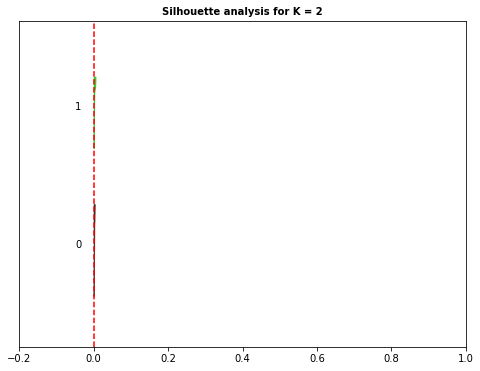

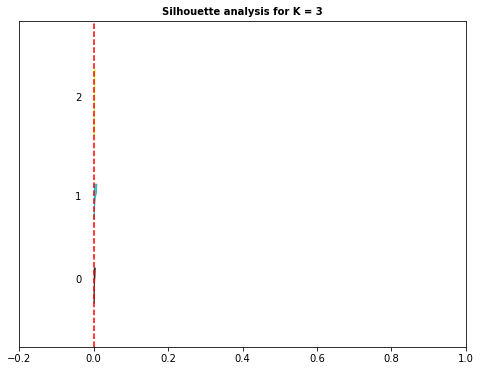

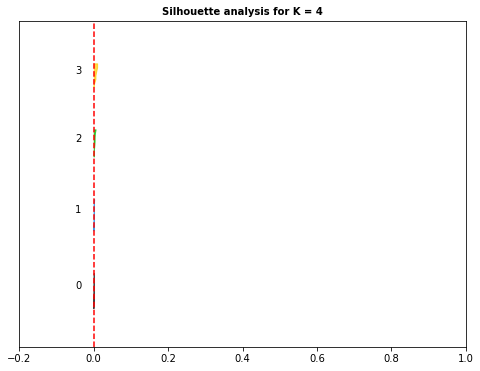

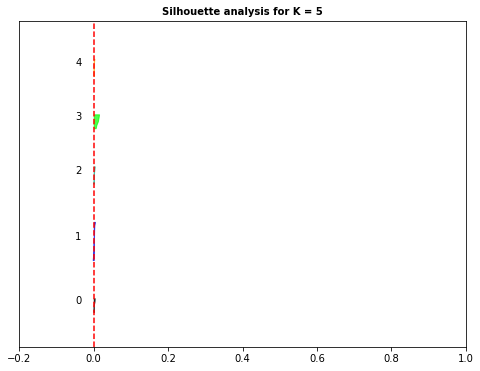

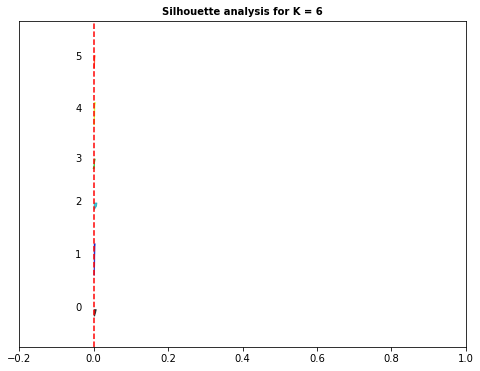

In [13]:
silhouette(kmeans_results, final_df, plot=True)

In [14]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

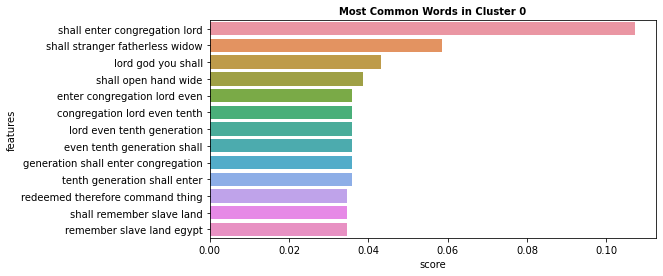

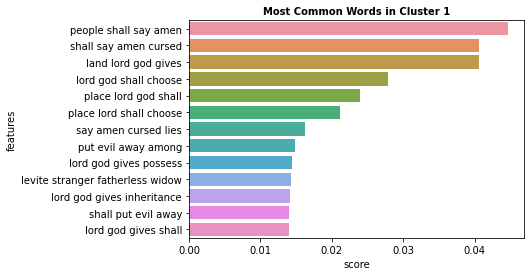

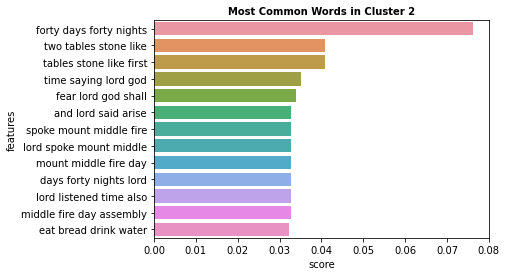

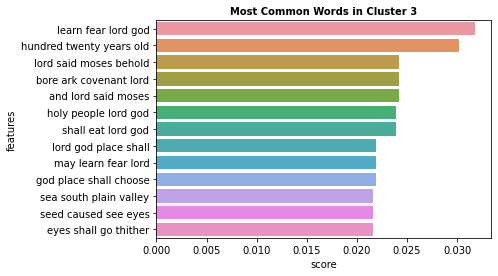

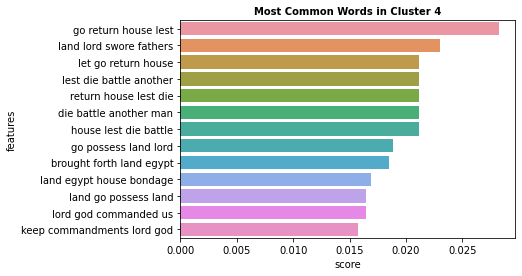

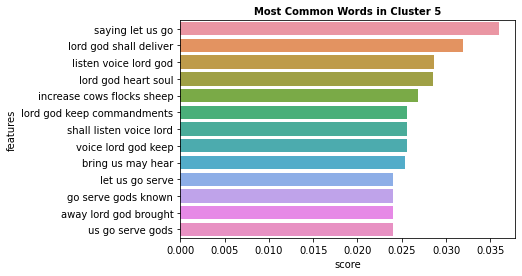

In [15]:
best_result = 6
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [16]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

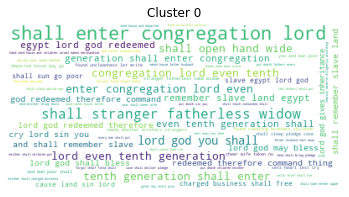

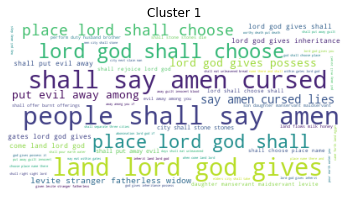

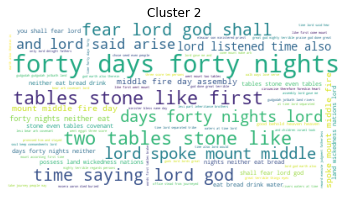

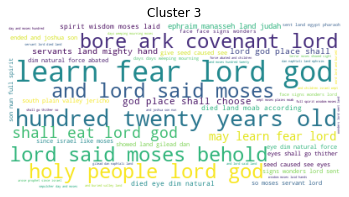

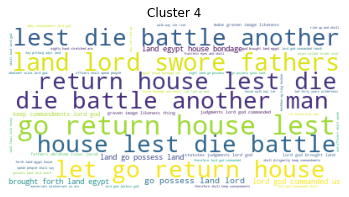

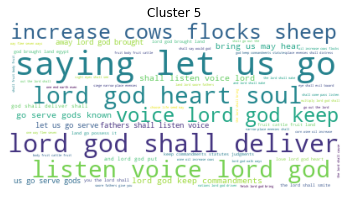

In [17]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [18]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Deuteronomio_1,"'words', 'moses', 'spoke', 'israel', 'side', '...",4
101,Deuteronomio_2,"'turned', ',', 'took', 'journey', 'wilderness'...",1
102,Deuteronomio_3,"'turned', ',', 'went', 'way', 'bashan', ':', '...",2
103,Deuteronomio_4,"'therefore', 'listen', ',', 'israel', ',', 'st...",4
104,Deuteronomio_5,"'moses', 'called', 'israel', ',', 'said', ',',...",4


In [19]:
print(df)

               Autor                                              Livro  label
100   Deuteronomio_1  'words', 'moses', 'spoke', 'israel', 'side', '...      4
101   Deuteronomio_2  'turned', ',', 'took', 'journey', 'wilderness'...      1
102   Deuteronomio_3  'turned', ',', 'went', 'way', 'bashan', ':', '...      2
103   Deuteronomio_4  'therefore', 'listen', ',', 'israel', ',', 'st...      4
104   Deuteronomio_5  'moses', 'called', 'israel', ',', 'said', ',',...      4
105   Deuteronomio_6  'commandments', ',', 'statutes', ',', 'judgmen...      4
106   Deuteronomio_7  'lord', 'god', 'shall', 'bring', 'land', 'go',...      5
107   Deuteronomio_8  'commandments', 'command', 'day', 'shall', 'ob...      4
108   Deuteronomio_9  'hear', ',', 'israel', ':', 'pass', 'jordan', ...      2
109  Deuteronomio_10  'time', 'lord', 'said', ',', 'hew', 'two', 'ta...      2
110  Deuteronomio_11  'therefore', 'shall', 'love', 'lord', 'god', '...      4
111  Deuteronomio_12  'statutes', 'judgments', ',', 

# Análise dos resultados 


Classe 0 agrupa os capitulos que tratam dos castigos contra os idolatras, os falsos profetas e a majestade. 

Classe 1 agrupa os capitulos que tratam do discurso de Moisés na planicie do jordão e as infidelidades do povo e Josue como sucessor de Moisés. 

Classe 2 agrupa os capitulos que tratam das tres festas de Israel, o ano da remissão e acerca do divorcio. 

Classe 3 agrupa os capitulos que tratam de trazer a memoria os beneficios do Senhor, as bençãos e as maldições lancadas pelos montes, exortação a obediencia e a morte de Moisés. 

Classe 4 agrupa os capitulos que tratam do castigo da idolatria, os lugares de refugio para os homicidas sem culpas e a pena de acoites.  

Classe 5 agrupa os capitulos que tratam de ogue rei de basã e um memorial para gravar nele a lei. 

Classe 0 (Deuteronomio 13, 33)

Classe 1 (Deuteronomio 1, 2, 4, 5, 6, 7, 9, 10, 31)

Classe 2 (Deuteronomio 12, 14, 15, 16, 18, 24, 26) 

Classe 3 (Deuteronomio 8, 11, 23, 28, 29, 30, 32, 34)

Classe 4 (Deuteronomio 17, 19, 21, 22, 25)

Classe 5 (Deuteronomio 3, 20, 27) 

Agrupamento feito com 6 grupos e trigrams. 

############################################################################################################################

Classe 0 agrupa os capitulos que tratam do ano remissão e dos que são excluidos da assembleia santa e do divorcio e roubadores. 

Classe 1 agrupa os capitulos que tratam das festas de Israel, dos direitos dos sacerdotes das penas e das maldições que cairão nos desobedientes e que devem amar o proximo. 

Classe 2 agrupa os capitulos que tratam das infidelidades de Israel e as novas tabuas da lei e a historia de Ogue rei de Basã

Classe 3 agrupa os capitulos que tratam eleição de Josue no lugar de Moisés e a morte de Moisés e os animais imundos.

Classe 4 agrupa os capitulos que tratam do discurso inicial de Moises na campinas e exortação a obediencia e alusão ao novo concerto. 

Classe 5 agrupa os capitulos que tratam dos castigos que serem derramdos sobre os idolatras e as bençãoes derramadas sobre os obedientes. 

Classe 0 (Deuteronomio 15, 23, 24)

Classe 1 (Deuteronomio 12, 16, 17, 18, 19, 21, 22, 25, 26, 27)

Classe 2 (Deuteronomio 3, 9, 10)

Classe 3 (Deuteronomio 14, 31, 32, 34)

Classe 4 (Deuteronomio 1, 4, 5, 6, 8, 11, 20, 29)

Classe 5 (Deuteronomio 7, 13, 28)

Agrupamento feito com 6 grupos e quadrigrams.

